## Import library

In [ ]:
import pandas as pd
import numpy as np
import gdown
import shutil
import re
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

##Import dataset

In [ ]:
# Import file skill pekerja
url = "https://drive.google.com/file/d/1CC-0yZOLIJLlbcZasGxOd36SP6sXWGSY/view?usp=drive_link"
output = "skill_pekerja.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

# Import file lowongan_kerja
url = "https://drive.google.com/file/d/1QjvvsPzbu5qLEJhuk0ZmAy8jBT4wD6QT/view?usp=drive_link"
output = "lowongan_kerja.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1CC-0yZOLIJLlbcZasGxOd36SP6sXWGSY
To: /content/skill_pekerja.csv
100%|██████████| 869k/869k [00:00<00:00, 38.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1QjvvsPzbu5qLEJhuk0ZmAy8jBT4wD6QT
From (redirected): https://drive.google.com/uc?id=1QjvvsPzbu5qLEJhuk0ZmAy8jBT4wD6QT&confirm=t&uuid=9e142fff-2b15-4de5-8bbd-093be18551b5
To: /content/lowongan_kerja.csv
100%|██████████| 135M/135M [00:02<00:00, 49.2MB/s]


'lowongan_kerja.csv'

##Read dataset

In [ ]:
skill_pekerja = pd.read_csv("skill_pekerja.csv")
skill_pekerja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56591 entries, 0 to 56590
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_pekerjaan         56591 non-null  int64 
 1   singkatan_kemampuan  56591 non-null  object
dtypes: int64(1), object(1)
memory usage: 884.4+ KB


In [ ]:
lowongan_kerja = pd.read_csv("lowongan_kerja.csv")
lowongan_kerja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  33246 non-null  int64  
 1   id_perusahaan                 32592 non-null  float64
 2   judul                         33246 non-null  object 
 3   deskripsi                     33245 non-null  object 
 4   gaji_maksimal                 11111 non-null  float64
 5   gaji_tengah                   2241 non-null   float64
 6   gaji_minimal                  11111 non-null  float64
 7   periode_pembayaran            13352 non-null  object 
 8   jenis_pekerjaan_terformat     33246 non-null  object 
 9   lokasi                        33246 non-null  object 
 10  lamaran                       16238 non-null  float64
 11  diperbolehkan_jarak_jauh      4802 non-null   float64
 12  tampilan                      25886 non-null  float64
 13  u

##Merge dataset

In [ ]:
dataset = pd.merge(skill_pekerja, lowongan_kerja, on='id_pekerjaan', how='inner')

In [ ]:
dataset = dataset[[
 'id_pekerjaan',
 'id_perusahaan',
 'singkatan_kemampuan',
 'judul',
 'jenis_pekerjaan_terformat',
 'deskripsi',
 'deskripsi_keterampilan',
 'lokasi',
 'tipe_pendaftaran',
 'disponsori',]]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55659 entries, 0 to 55658
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_pekerjaan               55659 non-null  int64  
 1   id_perusahaan              54829 non-null  float64
 2   singkatan_kemampuan        55659 non-null  object 
 3   judul                      55659 non-null  object 
 4   jenis_pekerjaan_terformat  55659 non-null  object 
 5   deskripsi                  55657 non-null  object 
 6   deskripsi_keterampilan     502 non-null    object 
 7   lokasi                     55659 non-null  object 
 8   tipe_pendaftaran           55659 non-null  object 
 9   disponsori                 55659 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 4.2+ MB


##Check missing value

In [ ]:
# Menggunakan metode .isnull().sum() untuk menghitung jumlah nilai yang hilang di setiap kolom
missing_values_count = dataset.isnull().sum()
print(missing_values_count)

id_pekerjaan                     0
id_perusahaan                  830
singkatan_kemampuan              0
judul                            0
jenis_pekerjaan_terformat        0
deskripsi                        2
deskripsi_keterampilan       55157
lokasi                           0
tipe_pendaftaran                 0
disponsori                       0
dtype: int64


In [ ]:
# Menghapus baris hanya jika ada nilai yang hilang di kolom 'id_perusahaan', 'deskripsi', atau 'deskripsi_keterampilan'
dataset = dataset.dropna(subset=['id_perusahaan', 'deskripsi'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54827 entries, 0 to 55658
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_pekerjaan               54827 non-null  int64  
 1   id_perusahaan              54827 non-null  float64
 2   singkatan_kemampuan        54827 non-null  object 
 3   judul                      54827 non-null  object 
 4   jenis_pekerjaan_terformat  54827 non-null  object 
 5   deskripsi                  54827 non-null  object 
 6   deskripsi_keterampilan     502 non-null    object 
 7   lokasi                     54827 non-null  object 
 8   tipe_pendaftaran           54827 non-null  object 
 9   disponsori                 54827 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 4.6+ MB


##Check duplicate

In [ ]:
dataset['id_pekerjaan'].duplicated().sum()

23259

In [ ]:
dataset=dataset.drop_duplicates(subset=['id_pekerjaan'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31568 entries, 0 to 55658
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_pekerjaan               31568 non-null  int64  
 1   id_perusahaan              31568 non-null  float64
 2   singkatan_kemampuan        31568 non-null  object 
 3   judul                      31568 non-null  object 
 4   jenis_pekerjaan_terformat  31568 non-null  object 
 5   deskripsi                  31568 non-null  object 
 6   deskripsi_keterampilan     337 non-null    object 
 7   lokasi                     31568 non-null  object 
 8   tipe_pendaftaran           31568 non-null  object 
 9   disponsori                 31568 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


##Change data type

In [ ]:
dataset['id_perusahaan'] = dataset['id_perusahaan'].astype(int)

<ipython-input-14-4ce903774a7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['id_perusahaan'] = dataset['id_perusahaan'].astype(int)


##Change coulumns name

In [ ]:
dataset = dataset.rename(columns={'singkatan_kemampuan': 'skill'})
dataset = dataset.rename(columns={'jenis_pekerjaan_terformat': 'jenis_pekerjaan'})

##Change coloumn

In [ ]:
replacement_dict = {
    'PRCH': 'Purchasing',
    'SUPL': 'Supply Chain',
    'PR': 'Public Relations',
    'SCI': 'Science',
    'STRA': 'Strategy/Planning',
    'WRT': 'Writing/Editing',
    'QA': 'Quality Assurance',
    'DIST': 'Distribution',
    'PROD': 'Production',
    'PRJM': 'Project Management',
    'ADVR': 'Advertising',
    'RSCH': 'Research',
    'HR': 'Human Resources',
    'LGL': 'Legal',
    'PRDM': 'Product Management',
    'MRKT': 'Marketing',
    'EDU': 'Education',
    'TRNG': 'Training',
    'ANLS': 'Analyst',
    'FIN': 'Finance',
    'SALE': 'Sales',
    'BD': 'Business Development',
    'MGMT': 'Management',
    'MNFC': 'Manufacturing',
    'GENB': 'General Business',
    'CUST': 'Customer Service',
    'ENG': 'Engineering',
    'OTHR': 'Other',
    'CNSL': 'Consulting',
    'ACCT': 'Accounting/Auditing',
    'HCPR': 'Health Care Provider',
    'DSGN': 'Design',
    'ART': 'Art/Creative',
    'IT': 'Information Technology',
    'ADM': 'Administrative'
}

dataset['skill'] = dataset['skill'].replace(replacement_dict)

In [ ]:
dataset['disponsori'] = dataset['disponsori'].replace({1: 'sponsored', 0: 'not sponsored'})

##Text Preprocessing

### Kolom judul

In [ ]:
# Menampilkan seluruh isi dari kolom 'judul'
dataset["judul"]

0                             Real Estate Staff Accountant
4                Maintenance Technician (2:00pm - 10:30pm)
6                                              Optometrist
7            (CDL) Commercial Truck Driver- Immediate Hire
10                              Senior Electrical Engineer
                               ...                        
55651              Studio Coach Support - North Canton, OH
55652    75% Remote - Risk & Controls Manager - Multina...
55654    Travel Registered Nurse - Medsurg/Tele job ava...
55655    Additional Design, Strategy, Writing, Project ...
55658          Unit Secretary- Medical Surgical Unit -Days
Name: judul, Length: 31568, dtype: object

In [ ]:
!pip install flashtext

  Preparing metadata (setup.py) ... done
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=ad537b26ee423df382f2b0d4da0b7748f05b7677e7ac05ee2a9ec51ceca41dae
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext


In [ ]:
from flashtext import KeywordProcessor
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define constants and initialize necessary objects
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
VERB_CODES = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

# Initialize KeywordProcessor for abbreviation replacement
keyword_processor = KeywordProcessor()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Fungsi untuk mengganti '/' dan '-' dengan spasi
def replace_slash_and_dash_with_space(text):
    # Memeriksa apakah nilai tersebut adalah string
    if isinstance(text, str):
        return text.replace('/', ' ').replace('-', ' ').replace('.', ' ').replace('_', ' ')
    else:
        return ''

# # Memeriksa dan menangani nilai null atau NaN dalam kolom 'judul'
# dataset1['judul'] = dataset1['judul'].fillna('').apply(replace_slash_and_dash_with_space)
# Memeriksa dan menangani nilai null atau NaN dalam kolom 'judul'
dataset['judul'] = dataset['judul'].apply(replace_slash_and_dash_with_space)


In [ ]:
# Add keywords to KeywordProcessor
abbreviation_dict = {
    "n't": "not",
    "'m": "am",
    "'s": "is",
    "'re": "are",
    "'ll": "will",
    "'ve": "have",
    "'d": "would",
    "sr": "senior",
    "med": "medical",
    "surg": "surgical",
    "rn": "registered nurses",
    "ui": "user interface",
    "misc": "miscellaneous",
    "mfg": "manufacturing",
    "dvl": "development",
    "r n": "registered nurses",
    "slp": "speech language pathology",
    "cfy": "clinical fellowship year"
}

for abbr, full_form in abbreviation_dict.items():
    keyword_processor.add_keyword(abbr, full_form)

def preprocess_sentences(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize words
    words = nltk.word_tokenize(text)
    # POS tagging
    tags = nltk.pos_tag(words)

    temp_sent = []
    for i, word in enumerate(words):
        # Lemmatize based on POS tagging
        if tags[i][1] in VERB_CODES:
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)

        # Remove stopwords and ensure word is alphanumeric
        if lemmatized not in stop_words and lemmatized.isalpha():
            temp_sent.append(lemmatized)

    # Combine the remaining words into a single sentence
    finalsent = ' '.join(temp_sent)

    # Replace abbreviations with full forms using KeywordProcessor
    finalsent = keyword_processor.replace_keywords(finalsent)

    return finalsent

# Apply the preprocessing function to the 'judul' column
dataset["judul"] = dataset["judul"].apply(preprocess_sentences)
final_data = dataset[["judul"]]


In [ ]:
abbreviation_dict = {
    "cdl": "commercial drivers license",
    "sr": "senior",
    "av": "audio visual",
    "app": "application",
    "ii": "second",
    "tax": "taxation",
    "e": "east",
    "nv": "nevada",
    "rn": "registered nurse",
    "lpn": "licensed practical nurse",
    "ny": "new york",
    "nj": "new jersey",
    "wms": "warehouse management system",
    "pmo": "project management office",
    "pay": "payment",
    "sci": "science",
    "toa": "terms of agreement",
    "exp": "experience",
    "req": "requirements",
    "new": "new",
    "ibm": "international business machines",
    "hr": "human resources",
    "n": "north",
    "al": "alabama",
    "ft": "full time",
    "pro": "professional",
    "asm": "assembly",
    "csr": "customer service representative",
    "acc": "account",
    "ipc": "interprocess communication",
    "spa": "society for the prevention of cruelty to animals",
    "na": "north america",
    "smb": "small and medium sized business",
    "pcu": "progressive care unit",
    "ai": "artificial intelligence",
    "cma": "certified management accountant",
    "iii": "third",
    "sc": "south carolina",
    "dc": "district of columbia",
    "cao": "chief accounting officer",
    "job": "job",
    "ga": "georgia",
    "ccu": "coronary care unit",
    "med": "medical",
    "asp": "application service provider",
    "plm": "product lifecycle management",
    "per": "permanent",
    "wk": "week",
    "ok": "oklahoma",
    "nc": "north carolina",
    "pt": "part time",
    "icu": "intensive care unit",
    "az": "arizona",
    "fl": "florida",
    "day": "day",
    "bay": "bay",
    "lab": "laboratory",
    "u": "university",
    "dod": "department of defense",
    "cna": "certified nursing assistant",
    "ehs": "environmental health and safety",
    "bi": "business intelligence",
    "scm": "supply chain management",
    "ux": "user experience",
    "tx": "texas",
    "oh": "ohio",
    "cv": "curriculum vitae",
    "ml": "machine learning",
    "r": "registered",
    "fp": "financial planning",
    "pe": "professional engineer",
    "ev": "electric vehicle",
    "sap": "systems applications and products",
    "cnc": "computer numerical control",
    "pr": "public relations",
    "law": "law",
    "rpa": "robotic process automation",
    "ceo": "chief executive officer",
    "pc": "personal computer",
    "air": "air",
    "hcm": "human capital management",
    "ca": "california",
    "qa": "quality assurance",
    "net": "network",
    "k": "thousand",
    "jr": "junior",
    "mba": "master of business administration",
    "aws": "amazon web services",
    "sql": "structured query language",
    "sme": "subject matter expert",
    "erp": "enterprise resource planning",
    "ct": "connecticut",
    "usa": "united states of america",
    "va": "virginia",
    "seo": "search engine optimization",
    "crm": "customer relationship management",
    "pm": "project manager",
    "mri": "magnetic resonance imaging",
    "slp": "speech language pathologist",
    "ops": "operations",
    "cio": "chief information officer",
    "cto": "chief technology officer",
    "cfo": "chief financial officer",
    "cdl": "commercial drivers license",
    "app": "application",
    "tax": "tax",
    "las": "las vegas",
    "lpn": "licensed practical nurse",
    "wms": "warehouse management system",
    "pmo": "project management office",
    "pay": "pay",
    "sci": "science",
    "toa": "terms of agreement",
    "exp": "experience",
    "req": "requirement",
    "new": "new",
    "ibm": "international business machines",
    "cpu": "central processing unit",
    "pro": "professional",
    "asm": "assembly",
    "csr": "customer service representative",
    "acc": "account",
    "ipc": "interprocess communication",
    "lrd": "land resources development",
    "spa": "society for the prevention of cruelty to animals",
    "smb": "small and medium-sized business",
    "pcu": "progressive care unit",
    "cma": "certified management accountant",
    "iii": "third",
    "cao": "chief accounting officer",
    "job": "job",
    "ccu": "coronary care unit",
    "med": "medical",
    "asp": "application service provider",
    "plm": "product lifecycle management",
    "per": "personal",
    "icu": "intensive care unit",
    "day": "day",
    "bay": "bay",
    "lab": "laboratory",
    "dod": "department of defense",
    "cna": "certified nursing assistant",
    "rbt": "robot",
    "ehs": "environmental health and safety",
    "scm": "supply chain management",
    "non": "non",
    "rat": "rating",
    "wed": "wednesday",
    "etm": "engineering team manager",
    "pcb": "printed circuit board",
    "sap": "systems applications and products",
    "hfc": "high frequency communication",
    "cnc": "computer numerical control",
    "law": "law",
    "rpa": "robotic process automation",
    "ceo": "chief executive officer",
    "air": "air",
    "hcm": "human capital management",
    "dev": "development",
    "sea": "search engine advertising",
    "npd": "new product development",
    "sql": "structured query language",
    "san": "storage area network",
    "omp": "open multiprocessing",
    "net": "network",
    "okr": "objectives and key results",
    "mtc": "maintenance",
    "din": "deutsche industrienorm",
    "fin": "finance",
    "avp": "assistant vice president",
    "aix": "advanced interactive executive",
    "rep": "representative",
    "art": "article",
    "mba": "master of business administration",
    "ana": "anaesthesia",
    "abl": "ability",
    "aws": "amazon web services",
    "ibp": "integrated business planning",
    "dlp": "digital light processing",
    "web": "world wide web",
    "gas": "gas",
    "aem": "application engineering manager",
    "drg": "diagnosis related group",
    "key": "key",
    "cyf": "cyber youth futures",
    "iam": "identity and access management",
    "dha": "docosahexaenoic acid",
    "mid": "mid",
    "mgt": "management",
    "dpl": "deployment",
    "rpg": "role playing game",
    "aep": "annual enrollment period",
    "coo": "chief operating officer",
    "usa": "united states of america",
    "seo": "search engine optimization",
    "big": "big",
    "crm": "customer relationship management",
    "end": "end",
    "sme": "subject matter expert",
    "sun": "sun",
    "erp": "enterprise resource planning",
    "ent": "enterprise",
    "edi": "electronic data interchange",
    "gcp": "google cloud platform",
    "etl": "extract, transform, load",
    "etf": "exchange-traded fund",
    "cpc": "cost per click",
    "cca": "certified cost accountant",
    "box": "box",
    "ndc": "national drug code",
    "jde": "jd edwards",
    "mdm": "master data management",
    "emc": "electromagnetic compatibility",
    "ukg": "ultimate kronos group",
    "ltl": "less than truckload",
    "fix": "fix",
    "tpm": "total productive maintenance",
    "wpf": "windows presentation foundation",
    "pmp": "project management professional",
    "msp": "managed service provider",
    "tap": "tap",
    "cad": "computer-aided design",
    "prt": "partial",
    "cmc": "certified management consultant",
    "afc": "advanced financial consulting",
    "log": "logistics",
    "nyc": "new york city",
    "svp": "senior vice president",
    "sou": "southern",
    "osp": "outside plant",
    "ucs": "universal computer system",
    "ecm": "enterprise content management",
    "top": "top",
    "csv": "comma-separated values",
    "fte": "full-time equivalent",
    "abb": "abb",
    "maa": "maa",
    "php": "hypertext preprocessor",
    "vue": "vue js",
    "pac": "political action committee",
    "noc": "network operations center",
    "nlp": "natural language processing",
    "dht": "dihydrotestosterone",
    "amp": "ampere",
    "dba": "database administrator",
    "mfg": "manufacturing",
    "msw": "master of social work",
    "dot": "department of transportation",
    "gyn": "gynecology",
    "biw": "body in white",
    "ehr": "electronic health record",
    "iut": "institution universitaire de technologie",
    "mep": "mechanical, electrical, and plumbing",
    "oem": "original equipment manufacturer",
    "fwa": "fraud waste and abuse",
    "coe": "center of excellence",
    "tow": "transport of wares",
    "car": "car",
    "ops": "operations",
    "cvt": "continuously variable transmission",
    "lvn": "licensed vocational nurse",
    "dou": "dou",
    "llc": "limited liability company",
    "egt": "egt",
    "uva": "university of virginia",
    "emf": "electromagnetic field",
    "mri": "magnetic resonance imaging",
    "dsp": "digital signal processing",
    "inc": "incorporated",
    "ami": "acute myocardial infarction",
    "vii": "vii",
    "sjh": "st john hospital",
    "xml": "extensible markup language",
    "pki": "public key infrastructure",
    "prn": "pro re nata",
    "slp": "speech language pathologist",
    "grc": "governance risk and compliance",
    "gmp": "good manufacturing practice",
    "egs": "enhanced geothermal systems",
    "smg": "small and medium-sized enterprises",
    "lpc": "licensed professional counselor",
    "hob": "head of bed",
    "com": "communication",
    "tlc": "total life cycle",
    "pre": "pre",
    "reg": "regulation",
    "min": "minimum",
    "usc": "united states code",
    "mgr": "manager",
    "oil": "oil",
    "dmv": "department of motor vehicles",
    "aml": "anti money laundering",
    "sch": "school",
    "ihm": "integrated health management",
    "dax": "dax",
    "slg": "slg",
    "adv": "advanced",
    "ahs": "american horror story",
    "raw": "raw",
    "fis": "federation of international skiing",
    "irm": "information resource management",
    "aui": "advanced user interface",
    "use": "use",
    "sic": "standard industrial classification",
    "set": "set",
    "mst": "mountain standard time",
    "csp": "certified safety professional",
    "cra": "clinical research associate",
    "men": "men",
    "evv": "electronic visit verification",
    "aps": "aps",
    "mrd": "market research and development",
    "faa": "federal aviation administration",
    "kyc": "know your customer",
    "ugg": "ugg",
    "std": "standard",
    "bpo": "business process outsourcing",
    "ecc": "error correction code",
    "paw": "paw",
    "map": "map",
    "lba": "lba",
    "cop": "cop",
    "gir": "gir",
    "dme": "durable medical equipment",
    "soc": "system on chip",
    "aum": "assets under management",
    "erm": "enterprise risk management",
    "pet": "positron emission tomography",
    "dog": "dog",
    "int": "integer",
    "doc": "document",
    "tcu": "texas christian university",
    "smu": "southern methodist university",
    "lac": "lac",
    "ear": "ear",
    "voc": "voc",
    "ave": "avenue",
    "cut": "cut",
    "vec": "vector",
    "vcg": "vcg",
    "pip": "personal injury protection",
    "hts": "hts",
    "act": "act",
    "rtl": "register transfer level",
    "esg": "environmental social and governance",
    "six": "six",
    "isv": "independent software vendor",
    "dns": "domain name system",
    "bie": "bie",
    "ict": "information and communications technology",
    "lcs": "lcs",
    "con": "con",
    "agg": "aggregate",
    "koa": "koa",
    "alm": "alm",
    "pvs": "pvs",
    "tom": "tom",
    "cpg": "consumer packaged goods",
    "jsn": "jsn",
    "tri": "tri",
    "pit": "pit",
    "bmw": "bmw",
    "ira": "individual retirement account",
    "bus": "bus",
    "aid": "aid",
    "wax": "wax",
    "bcs": "bcs",
    "cba": "cba",
    "los": "los",
    "pst": "pacific standard time",
    "spl": "sound pressure level",
    "sit": "sit",
    "rwe": "rwe",
    "hiv": "human immunodeficiency virus",
    "lll": "lll",
    "sem": "sem",
    "svc": "service",
    "eoc": "eoc",
    "usd": "united states dollar",
    "ala": "ala",
    "gfi": "gfi",
    "lot": "lot",
    "bar": "bar",
    "agm": "annual general meeting",
    "edu": "education",
    "hcp": "hcp",
    "isc": "international standard classification",
    "mon": "mon",
    "tip": "tip",
    "fel": "fel",
    "tig": "tig",
    "gsk": "gsk",
    "bsn": "bsn",
    "eit": "engineer in training",
    "bsd": "bsd",
    "bmc": "bmc",
    "dir": "directory",
    "idd": "international direct dial",
    "rna": "ribonucleic acid",
    "epa": "environmental protection agency",
    "hha": "home health aide",
    "mix": "mix",
    "bio": "biography",
    "sug": "sug",
    "ndt": "non-destructive testing",
    "npi": "national provider identifier",
    "lsw": "licensed social worker",
    "rdc": "regional distribution center",
    "ivy": "ivy",
    "mgm": "mgm",
    "evp": "executive vice president",
    "bqt": "banquet",
    "uas": "unmanned aerial system",
    "obu": "office of business units",
    "aod": "alcohol and other drugs",
    "ctc": "ctc",
    "phv": "potential hydrogen value",
    "bsa": "boy scouts of america",
    "den": "den",
    "bim": "building information modeling",
    "tic": "tic",
    "inn": "inn",
    "flu": "flu",
    "efw": "energy from waste",
    "war": "war",
    "pia": "pia",
    "otf": "otf",
    "sdk": "software development kit",
    "pca": "personal care assistant",
    "cfo": "chief financial officer",
    "mwn": "mwn",
    "fsr": "fsr",
    "hsp": "hospital",
    "zos": "zos",
    "hoa": "homeowners association",
    "msh": "msh",
    "vsp": "vsp",
    "bvl": "bvl",
    "fpa": "financial planning association",
    "sas": "sas",
    "mcm": "mcm",
    "fri": "fri",
    "plc": "public limited company",
    "rlt": "rlt",
    "rmf": "rmf",
    "rvt": "rvt",
    "emt": "emergency medical technician",
    "otp": "otp",
    "mmj": "medical marijuana",
    "mig": "mig",
    "ttp": "ttp",
    "onc": "oncology",
    "ach": "ach",
    "cpa": "certified public accountant",
    "dei": "dei",
    "lee": "lee",
    "rvp": "regional vice president",
    "hid": "hid",
    "gnc": "gnc",
    "mbh": "mbh",
    "deg": "deg",
    "hbm": "hbm",
    "cpo": "chief product officer",
    "scp": "scp",
    "isd": "isd",
    "aog": "aog",
    "ltc": "long term care",
    "isp": "internet service provider",
    "cmp": "cmp",
    "pdi": "pre-delivery inspection",
    "run": "run",
    "rfc": "request for comments",
    "fgp": "fgp",
    "ivf": "in vitro fertilization",
    "red": "red",
    "mfm": "mfm",
    "way": "way",
    "mma": "mixed martial arts",
    "lax": "lax",
    "idn": "idn",
    "iir": "iir",
    "ewm": "ewm",
    "vet": "veterinarian",
    "amo": "amo",
    "uph": "uph",
    "cod": "cod",
    "pbx": "private branch exchange",
    "usg": "usg",
    "rad": "radiation",
    "pct": "percentage",
    "nro": "nro",
    "ato": "ato",
    "evs": "evs",
    "lan": "local area network",
    "ttl": "ttl",
    "csa": "csa",
    "die": "die",
    "siu": "southern illinois university",
    "ram": "random access memory",
    "dam": "dam",
    "gmc": "gmc",
    "dft": "dft",
    "rio": "rio",
    "atl": "atlanta",
    "stl": "st louis",
    "cgi": "cgi",
    "fox": "fox",
    "cth": "cth",
    "usf": "university of south florida",
    "fws": "fws",
    "rcs": "rcs",
    "cup": "cup",
    "mim": "mim",
    "ebs": "ebs",
    "amb": "ambulance",
    "cmo": "chief marketing officer",
    "pta": "physical therapist assistant",
    "ewp": "ewp",
    "mac": "mac",
    "ast": "ast",
    "cta": "cta",
    "cip": "cip",
    "fry": "fry",
    "ray": "ray",
    "pfs": "pfs",
    "phy": "physical",
    "haa": "haa",
    "cxl": "cxl",
    "ibd": "ibd",
    "twp": "twp",
    "cro": "cro",
    "ism": "ism",
    "reo": "reo",
    "gig": "gig",
    "uvm": "uvm",
    "dre": "dre",
    "ler": "ler",
    "kid": "kid",
    "gap": "gap",
    "hwy": "highway",
    "adh": "adh",
    "rcc": "rcc",
    "rrt": "registered respiratory therapist",
    "cqv": "cqv",
    "sox": "sox",
    "mro": "mro",
    "dvm": "doctor of veterinary medicine",
    "cal": "cal",
    "dhh": "dhh",
    "van": "van",
    "rtn": "rtn",
    "hhh": "hhh",
    "low": "low",
    "sec": "sec",
    "rfp": "request for proposal",
    "ddq": "ddq",
    "hot": "hot",
    "som": "som",
    "arm": "arm",
    "phd": "doctor of philosophy",
    "adp": "adp",
    "isu": "isu",
    "cts": "cts",
    "esp": "esp",
    "arc": "arc",
    "atx": "atx",
    "tmw": "tmw",
    "sfx": "special effects",
    "ipv": "ipv",
    "bal": "bal",
    "pem": "pem",
    "bod": "bod",
    "otr": "over the road",
    "cae": "cae",
    "sub": "sub",
    "utt": "utt",
    "csd": "csd",
    "cno": "chief nursing officer",
    "fim": "fim",
    "alt": "alternative",
    "cwi": "cwi",
    "one": "one",
    "sam": "sam",
    "cdd": "cdd",
    "unc": "unc",
    "rex": "rex",
    "ybh": "ybh",
    "cpq": "configure price quote",
    "uhg": "uhg",
    "uhc": "uhc",
    "oak": "oak",
    "aug": "august",
    "alc": "alc",
    "snr": "snr",
    "hub": "hub",
    "tru": "tru",
    "spd": "spd",
    "api": "application programming interface",
    "ivr": "interactive voice response",
    "ope": "ope",
    "vdc": "vdc",
    "ati": "ati",
    "ont": "ont",
    "nbc": "national broadcasting company",
    "prf": "prf",
    "doe": "department of energy",
    "ied": "ied",
    "wvu": "west virginia university",
    "fda": "food and drug administration",
    "fam": "fam",
    "rcm": "rcm",
    "dga": "dga",
    "ist": "ist",
    "sew": "sew",
    "del": "del",
    "csw": "csw",
    "cat": "cat",
    "ale": "ale",
    "zoo": "zoo",
    "utc": "coordinated universal time",
    "age": "age",
    "erc": "erc",
    "scw": "scw",
    "ifm": "ifm",
    "llm": "master of laws",
    "lng": "lng",
    "yes": "yes",
    "snf": "skilled nursing facility",
    "dry": "dry",
    "mlt": "medical laboratory technician",
    "srn": "srn",
    "mso": "mso",
    "srs": "srs",
    "ipu": "ipu",
    "hig": "hig",
    "isr": "isr",
    "sep": "sep",
    "ocm": "ocm",
    "hse": "hse",
    "dtc": "dtc",
    "eye": "eye",
    "esc": "esc",
    "oim": "oim",
    "qms": "qms",
    "mtm": "make to manufacture",
    "rtc": "rtc",
    "epc": "engineering procurement and construction",
    "ekg": "electrocardiogram",
    "pop": "point of presence",
    "apo": "apo",
    "lte": "long term evolution",
    "gme": "graduate medical education",
    "ctr": "center",
    "jag": "jag",
    "feh": "feh",
    "fcc": "federal communications commission",
    "msl": "mean sea level",
    "etx": "etx",
    "wfh": "work from home",
    "oae": "oae",
    "lua": "lua",
    "sat": "sat",
    "esr": "esr",
    "ixp": "internet exchange point",
    "kcc": "kcc",
    "eow": "eow",
    "cfa": "chartered financial analyst",
    "des": "des",
    "tag": "tag",
    "fsg": "fsg",
    "vdi": "virtual desktop infrastructure",
    "rmc": "remote monitoring and control",
    "ise": "industrial security engineering",
    "old": "old",
    "jcb": "jcb",
    "bfs": "bfs",
    "sei": "sei",
    "sdi": "sdi",
    "cst": "central standard time",
    "apm": "apm",
    "iiq": "iiq",
    "asw": "asw",
    "cto": "chief technology officer",
    "due": "due",
    "cpd": "continuing professional development",
    "glp": "good laboratory practice",
    "soy": "soy",
    "ems": "emergency medical services",
    "gts": "gts",
    "mdd": "mdd",
    "fps": "fps",
    "hgv": "heavy goods vehicle",
    "psv": "public service vehicle",
    "mot": "ministry of transport",
    "hil": "hil",
    "bso": "bso",
    "spe": "society of petroleum engineers",
    "eng": "engineering",
    "adc": "adc",
    "ctm": "ctm",
    "eco": "eco",
    "ncb": "ncb",
    "ink": "ink",
    "psc": "psc",
    "wan": "wide area network",
    "sba": "small business administration",
    "ada": "americans with disabilities act",
    "gen": "gen",
    "bsw": "bsw",
    "rtr": "rtr",
    "dcx": "dcx",
    "cei": "cei",
    "nmu": "nmu",
    "ice": "ice",
    "aqa": "aqa",
    "otc": "over the counter",
    "amd": "advanced micro devices",
    "ski": "ski",
    "see": "see",
    "sky": "sky",
    "pli": "pli",
    "rlc": "rlc",
    "wet": "wet",
    "aed": "automated external defibrillator",
    "lpt": "lpt",
    "pgd": "pgd",
    "tec": "tec",
    "iat": "iat",
    "ead": "ead",
    "crc": "crc",
    "afb": "air force base",
    "ten": "ten",
    "dfw": "dallas fort worth",
    "est": "est",
    "cmt": "cmt",
    "rcg": "rcg",
    "fst": "fst",
    "iac": "iac",
    "puc": "puc",
    "mow": "mow",
    "bmb": "bmb",
    "bel": "bel",
    "fyr": "fyr",
    "esl": "english as a second language",
    "hpe": "hewlett packard enterprise",
    "gtm": "gtm",
    "rdh": "registered dental hygienist",
    "sdr": "software defined radio",
    "tsr": "tsr",
    "eda": "eda",
    "ooh": "ooh",
    "cnn": "cable news network",
    "wen": "wen",
    "nih": "national institutes of health",
    "wdn": "wdn",
    "jan": "jan",
    "fsd": "fsd",
    "add": "attention deficit disorder",
    "man": "man",
    "cfd": "cfd",
    "lta": "lta",
    "mal": "mal",
    "nls": "nls",
    "mab": "mab",
    "ott": "ott",
    "pbm": "pbm",
    "sie": "sie",
    "sre": "sre",
    "qoe": "quality of experience",
    "dec": "dec",
    "snp": "snp",
    "loc": "loc",
    "iaa": "iaa",
    "asc": "asc",
    "bun": "bun",
    "ghi": "ghi",
    "tpo": "tpo",
    "vtl": "vtl",
    "omt": "omt",
    "cdu": "cdu",
    "eam": "eam",
    "mkt": "market",
    "epm": "enterprise project management",
    "pas": "pas",
    "lpi": "lpi",
    "ltd": "limited",
    "kcf": "kcf",
    "fnp": "family nurse practitioner",
    "kam": "key account manager",
    "fha": "federal housing administration",
    "pcm": "pcm",
    "cce": "cce",
    "gdo": "gdo",
    "ivd": "ivd",
    "nbd": "nbd",
    "mtt": "mtt",
    "mdg": "mdg",
    "tik": "tik",
    "tok": "tok",
    "ssu": "ssu",
    "xdt": "xdt",
    "sur": "sur",
    "hdr": "hdr",
    "sld": "sld",
    "hup": "hup",
    "ojt": "ojt",
    "foh": "foh",
    "rdp": "rdp",
    "shs": "shs",
    "für": "für",
    "opt": "opt",
    "hal": "hal",
    "hpc": "high performance computing",
    "lit": "lit",
    "jor": "jor",
    "hut": "hut",
    "fmi": "fmi",
    "ols": "ols",
    "dtv": "dtv",
    "ble": "ble",
    "dna": "deoxyribonucleic acid",
    "uat": "user acceptance testing",
    "nyk": "new york knicks",
    "nyr": "new york rangers",
    "cdo": "chief data officer",
    "nhg": "nhg",
    "sir": "sir",
    "ect": "ect",
    "ftl": "ftl",
    "rim": "rim",
    "cim": "cim",
    "abm": "abm",
    "vac": "vac",
    "mpd": "mpd",
    "kma": "kma",
    "sso": "single sign on",
    "bed": "bed",
    "fhc": "fhc",
    "iot": "internet of things",
    "mgh": "mgh",
    "nma": "nma",
    "lha": "lha",
    "bbw": "bbw",
    "pin": "personal identification number",
    "aba": "applied behavior analysis",
    "mrp": "mrp",
    "jar": "jar",
    "rmg": "rmg",
    "rmt": "rmt",
    "bby": "bby",
    "qma": "qma",
    "nyi": "new york islanders",
    "njd": "new jersey devils",
    "asd": "autism spectrum disorder",
    "huc": "huc",
    "vba": "visual basic for applications",
    "adm": "adm",
    "eve": "eve",
    "soa": "service oriented architecture",
    "ass": "ass",
    "cso": "chief security officer",
    "div": "division",
    "two": "two",
    "vir": "vir",
    "bdr": "business development representative",
    "hri": "human resources information",
    "asl": "american sign language",
    "ses": "senior executive service",
    "stp": "stp",
    "nyu": "new york university",
    "pvh": "pvh",
    "eat": "eat",
    "cvc": "cvc",
    "edh": "edh",
    "wme": "wme",
    "afo": "afo",
    "eeg": "electroencephalogram",
    "eau": "eau",
    "tmc": "tmc",
    "bos": "bos",
    "neo": "neo",
    "pnw": "pacific northwest",
    "ocs": "ocs",
    "lnw": "lnw",
    "cex": "cex",
    "flt": "flight",
    "grs": "grs",
    "lsf": "lsf",
    "bid": "bid",
    "fev": "fev",
    "orr": "orr",
    "wim": "wim",
    "slh": "slh",
    "nwh": "nwh",
    "cvg": "cvg",
    "pgp": "pgp",
    "bwh": "bwh",
    "bdd": "bdd",
    "fab": "fab",
    "ahd": "ahd",
    "bmt": "bmt",
    "chs": "chs",
    "bag": "bag",
    "aau": "aau",
    "rvi": "rvi",
    "ixl": "ixl",
    "aon": "aon",
    "pce": "pce",
    "fun": "fun",
    "mdh": "mdh",
    "sdm": "sdm",
    "sys": "sys",
    "mgd": "mgd",
    "xrf": "xrf",
    "odi": "odi",
    "hai": "hai",
    "cpe": "cpe",
    "mat": "mat",
    "ocu": "ocu",
    "ark": "ark",
    "hhr": "hhr",
    "drp": "drp",
    "ham": "ham",
    "rob": "rob",
    "mem": "mem",
    "ihc": "ihc",
    "mbg": "mbg",
    "mco": "mco",
    "rso": "rso",
    "phi": "phi",
    "pcf": "pcf",
    "jjc": "jjc",
    "mrf": "mrf",
    "fit": "fit",
    "tan": "tan",
    "vwr": "vwr",
    "psp": "psp",
    "lvl": "lvl",
    "cbp": "cbp",
    "lnm": "lnm",
    "bft": "bft",
    "get": "get",
    "sup": "sup",
    "mft": "mft",
    "fee": "fee",
    "boy": "boy",
    "mmm": "mmm",
    "ldc": "ldc",
    "ppl": "ppl",
    "cwc": "cwc",
    "kia": "kia",
    "evw": "evw",
    "gna": "gna",
    "dvl": "dvl",
    "bwl": "bwl",
    "hsc": "hsc",
    "esh": "esh",
    "ate": "ate",
    "pee": "pee",
    "dee": "dee",
    "atm": "atm",
    "atb": "atb",
    "oda": "oda",
    "oci": "oci",
    "cfy": "cfy",
    "occ": "occ",
    "tsd": "tsd",
    "aut": "aut",
    "tel": "tel",
    "crt": "crt",
    "edr": "edr",
    "bpm": "bpm",
    "odm": "odm",
    "evm": "evm",
    "fty": "fty",
    "hys": "hys",
    "gma": "gma",
    "pdt": "pdt",
    "sdv": "sdv",
    "atv": "atv",
    "mom": "mom",
    "tda": "tda",
    "dob": "dob",
    "qca": "qca",
    "prm": "prm",
    "sad": "sad",
    "kbi": "kbi",
    "qmc": "qmc",
    "elk": "elk",
    "def": "def",
    "kai": "kai",
    "orm": "orm",
    "ppm": "ppm",
    "grm": "grm",
    "icm": "icm",
    "dcf": "dcf",
    "ifs": "ifs",
    "cmv": "cmv",
    'sr': 'senior',
    'av': 'audio visual',
    'ii': 'second',
    'nv': 'nevada',
    'rn': 'registered nurse',
    'ny': 'new york',
    'nj': 'new jersey',
    'hr': 'human resources',
    'al': 'alabama',
    'ft': 'full time',
    'na': 'not applicable',
    'ai': 'artificial intelligence',
    'sc': 'south carolina',
    'dc': 'district of columbia',
    'ga': 'georgia',
    'yu': 'young',
    'wk': 'week',
    'ok': 'oklahoma',
    'nc': 'north carolina',
    'pt': 'part time',
    'az': 'arizona',
    'fl': 'florida',
    'bi': 'business intelligence',
    'ux': 'user experience',
    'tx': 'texas',
    'oh': 'ohio',
    'cv': 'curriculum vitae',
    'ml': 'machine learning',
    'io': 'input/output',
    'fp': 'financial planning',
    'pe': 'physical education',
    'ev': 'event',
    'pr': 'public relations',
    'pc': 'personal computer',
    'st': 'saint',
    'ci': 'customer interaction',
    'cd': 'compact disc',
    'pp': 'power point',
    'mm': 'millimeter',
    'gi': 'gastrointestinal',
    'pl': 'place',
    'ca': 'california',
    'pb': 'public',
    'gc': 'general contractor',
    'qa': 'quality assurance',
    'da': 'district attorney',
    'uc': 'university of california',
    'vp': 'vice president',
    'pa': 'pennsylvania',
    'jr': 'junior',
    'ot': 'occupational therapy',
    'wa': 'washington',
    'va': 'virginia',
    'os': 'operating system',
    'bs': 'bachelor of science',
    'po': 'purchase order',
    'ut': 'utah',
    'ui': 'user interface',
    'iv': 'intravenous',
    'pi': 'principal investigator',
    'tm': 'trademark',
    'md': 'doctor of medicine',
    'rf': 'radio frequency',
    'co': 'company',
    'wm': 'walmart',
    'ak': 'alaska',
    'vb': 'visual basic',
    'pd': 'product development',
    'mi': 'michigan',
    'ac': 'accounting',
    'la': 'louisiana',
    'pm': 'project manager',
    'ar': 'arkansas',
    'ob': 'obstetrics',
    'eb': 'enterprise business',
    'ct': 'connecticut',
    'nd': 'north dakota',
    'oc': 'orange county',
    'ce': 'continuing education',
    'ky': 'kentucky',
    'il': 'illinois',
    'ia': 'iowa',
    'sa': 'south africa',
    'hs': 'high school',
    'gm': 'general manager',
    'er': 'emergency room',
    'ed': 'education',
    'op': 'operation',
    'nu': 'nurse',
    'ln': 'line',
    'dx': 'diagnosis',
    'np': 'nurse practitioner',
    'de': 'delaware',
    'go': 'government',
    'sd': 'south dakota',
    'fr': 'france',
    'yr': 'year',
    'ad': 'advertisement',
    'wi': 'wisconsin',
    'ap': 'accounts payable',
    'gl': 'general ledger',
    'mt': 'montana',
    'tn': 'tennessee',
    'qm': 'quality management',
    'dp': 'display',
    'qc': 'quality control',
    'bc': 'british columbia',
    'eh': 'environmental health',
    'sw': 'social work',
    'db': 'database',
    'vt': 'vermont',
    'nw': 'northwest',
    'fm': 'frequency modulation',
    'hc': 'health care',
    'sl': 'south lake',
    'li': 'long island',
    'se': 'search engine',
    'sv': 'service',
    'bd': 'board',
    'jd': 'juris doctor',
    'mc': 'master of ceremonies',
    'mn': 'minnesota',
    'cl': 'current location',
    'ge': 'general electric',
    'ho': 'housing office',
    'fi': 'financial institution',
    'ax': 'axis',
    'nm': 'new mexico',
    'gt': 'grand total',
    'ic': 'integrated circuit',
    'mv': 'motor vehicle',
    'jw': 'jehovah witness',
    'lp': 'long play',
    'fo': 'field office',
    'ne': 'northeast',
    'fv': 'field value',
    'ni': 'national insurance',
    'dt': 'day trading',
    'tu': 'technical university',
    'ri': 'rhode island',
    'nh': 'new hampshire',
    'cb': 'citizens bank',
    'mo': 'missouri',
    'el': 'electrical',
    'dr': 'doctor',
    'cs': 'computer science',
    'cx': 'customer experience',
    'mp': 'member of parliament',
    'em': 'electronic mail',
    'cp': 'central processing',
    'wy': 'wyoming',
    'tc': 'telecommunications',
    'kt': 'kentucky',
    'ah': 'animal health',
    'tb': 'tuberculosis',
    '纽约': 'new york',
    'gb': 'great britain',
    'lv': 'las vegas',
    'un': 'university',
    'rd': 'road',
    'en': 'english',
    'hi': 'hawaii',
    'cc': 'carbon copy',
    'bh': 'bahrain',
    'uk': 'united kingdom',
    'gv': 'general value',
    'ph': 'philippines',
    'gp': 'general practitioner',
    'tv': 'television',
    'id': 'identification',
    'ms': 'mississippi',
    'le': 'lead',
    'rt': 'real time',
    'ea': 'electronic arts',
    'rx': 'prescription',
    'ko': 'knockout',
    'fg': 'field goal',
    'ba': 'bachelor of arts',
    '副理': 'deputy manager',
    'ag': 'agriculture',
    'gr': 'grain',
    'jo': 'junior officer',
    'gd': 'good',
    'ip': 'internet protocol',
    'ab': 'ab',
    'hf': 'high frequency',
    'vc': 'venture capital',
    'eo': 'executive officer',
    'mb': 'megabyte',
    'ir': 'infrared',
    'lc': 'local controller',
    'lo': 'location',
    'hq': 'headquarters',
    'im': 'instant message',
    'wv': 'west virginia',
    'rv': 'recreational vehicle',
    'od': 'overdose',
    'tl': 'timeline',
    'vi': 'vi',
    'uw': 'university of washington',
    'gn': 'general',
    'fk': 'fork',
    'jc': 'joint commission',
    'sg': 'standard gauge',
    'ff': 'fair field',
    'oi': 'open interest',
    'nf': 'newfoundland',
    'mf': 'master of fine arts',
    'ae': 'associate engineer',
    'et': 'estimated time',
    'xr': 'cross',
    'ex': 'example',
    'dd': 'due diligence',
    'ov': 'over',
    'ks': 'kansas',
    'wp': 'wordpress',
    'ng': 'ng',
    'iw': 'iw',
    'fc': 'football club',
    'mk': 'mk',
    'lm': 'lm',
    'fx': 'foreign exchange',
    'bm': 'business manager',
    'uh': 'university hospital',
    'ww': 'world war',
    'nz': 'new zealand',
    'oa': 'oa',
    'ta': 'teaching assistant',
    'pk': 'pk',
    'au': 'australia',
    'du': 'du',
    'es': 'es',
    'bt': 'bt',
    'bb': 'bb',
    'wc': 'water closet'

}

keyword_processor = KeywordProcessor()
for abbr, full_form in abbreviation_dict.items():
    keyword_processor.add_keyword(abbr, full_form)

def normalize_text(text, keyword_processor):
    text = keyword_processor.replace_keywords(text)
    return text

dataset["judul"] = dataset["judul"].apply(lambda x: normalize_text(x, keyword_processor))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31568 entries, 0 to 55658
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_pekerjaan            31568 non-null  int64 
 1   id_perusahaan           31568 non-null  int64 
 2   skill                   31568 non-null  object
 3   judul                   31568 non-null  object
 4   jenis_pekerjaan         31568 non-null  object
 5   deskripsi               31568 non-null  object
 6   deskripsi_keterampilan  337 non-null    object
 7   lokasi                  31568 non-null  object
 8   tipe_pendaftaran        31568 non-null  object
 9   disponsori              31568 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.6+ MB


### Kolom lokasi

In [ ]:
dataset["lokasi"].value_counts()

lokasi
United States                     2094
New York, NY                       778
Chicago, IL                        519
Houston, TX                        415
Atlanta, GA                        370
                                  ... 
Magna, UT                            1
Western, NY                          1
Harrington, DE                       1
Waller, TX                           1
Cleveland, Ohio, United States       1
Name: count, Length: 4497, dtype: int64

In [ ]:
dataset[dataset["lokasi"].str.contains("New",case=False)]["lokasi"].value_counts()

lokasi
New York, NY                       778
New York City Metropolitan Area    255
New York, United States            156
New Jersey, United States           50
Newark, NJ                          39
                                  ... 
New Lebanon, OH                      1
Newport, VT                          1
Newark, OH                           1
New Century, KS                      1
New Albany, IN                       1
Name: count, Length: 86, dtype: int64

In [ ]:
def ubah_lokasi(lokasi):
    if lokasi == "New York, NY":
        return "New York, NY, United States"
    elif lokasi == "New York, United States":
        return "New York, NY, United States"
    elif lokasi == "New York, New York, United States":
        return "New York, NY, United States"
    elif lokasi == "Albany, New York Metropolitan Area":
        return "Albany, NY, United States"
    elif lokasi == "Rochester, New York Metropolitan Area":
        return "Rochester, NY, United States"
    elif lokasi == "Whitestone, New York, United States":
        return "Whitestone, NY, United States"
    elif lokasi == "Queens, New York, United States":
        return "Queens, NY, United States"
    elif lokasi == "New York City Metropolitan Area":
        return "New York, NY, United States"
    else:
        return lokasi

dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
dataset[dataset["lokasi"].str.contains("us",case=False)]["lokasi"].value_counts()

lokasi
Houston, TX                        415
Austin, TX                         337
Columbus, OH                       140
Austin, Texas Metropolitan Area     77
Greater Houston                     45
                                  ... 
Cornelius, NC                        1
East Greenbush, NY                   1
Russellville, AR                     1
Port Austin, MI                      1
Russells Point, OH                   1
Name: count, Length: 76, dtype: int64

In [ ]:
def ubah_lokasi(lokasi):
    if lokasi == "Columbus, IN":
        return "Columbus, IN, United States"
    elif lokasi == "Romulus, MI":
        return "Romulus, MI, United States"
    elif lokasi == "Augusta, ME":
        return "Augusta, ME, United States"
    elif lokasi == "Tustin, CA":
        return "Tustin, CA, United States"
    elif lokasi == "Spring House, PA":
        return "Spring House, PA, United States"
    elif lokasi == "Austell, GA":
        return "Austell, GA, United States"
    elif lokasi == "Saugus, MA":
        return "Saugus, MA, United States"
    elif lokasi == "Titusville, FL":
        return "Titusville, FL, United States"
    elif lokasi == "House, NM":
        return "House, NM, United States"
    elif lokasi == "Muskogee, OK":
        return "Muskogee, OK, United States"
    elif lokasi == "Columbus, MS":
        return "Columbus, MS, United States"
    elif lokasi == "Russellton, PA":
        return "Russellton, PA, United States"
    elif lokasi == "Venus, FL":
        return "Venus, FL, United States"
    elif lokasi == "Greater Syracuse-Auburn Area":
        return "Syracuse-Auburn, NY, United States"
    elif lokasi == "Festus, MO":
        return "Festus, MO, United States"
    elif lokasi == "Springfield, Massachusetts Metropolitan Area":
        return "Springfield, MA, United States"
    elif lokasi == "Sandusky, OH":
        return "Sandusky, OH, United States"
    elif lokasi == "Ruskin, FL":
        return "Ruskin, FL, United States"
    elif lokasi == "Azusa, CA":
        return "Azusa, CA, United States"
    elif lokasi == "Muscatine, IA":
        return "Muscatine, IA, United States"
    elif lokasi == "Thousand Palms, CA":
        return "Thousand Palms, CA, United States"
    elif lokasi == "Opelousas, LA":
        return "Opelousas, LA, United States"
    elif lokasi == "Locust Valley, NY":
        return "Locust Valley, NY, United States"
    elif lokasi == "Houston, Texas, United States":
        return "Houston, TX, United States"
    elif lokasi == "Sausalito, CA":
        return "Sausalito, CA, United States"
    elif lokasi == "Austin, MN":
        return "Austin, MN, United States"
    elif lokasi == "Russellville, KY":
        return "Russellville, KY, United States"
    elif lokasi == "Rusk, TX":
        return "Rusk, TX, United States"
    elif lokasi == "Cape May Court House, NJ":
        return "Cape May Court House, NJ, United States"
    elif lokasi == "Trussville, AL":
        return "Trussville, AL, United States"
    elif lokasi == "Volusia County, FL":
        return "Volusia County, FL, United States"
    elif lokasi == "Greater Corpus Christi Area":
        return "Corpus Christi, TX, United States"
    elif lokasi == "Greater Tuscaloosa Area":
        return "Tuscaloosa, AL, United States"
    elif lokasi == "Port Austin, MI":
        return "Port Austin, MI, United States"
    elif lokasi == "Damascus, MD":
        return "Damascus, MD, United States"
    elif lokasi == "Broussard, LA":
        return "Broussard, LA, United States"
    elif lokasi == "Cornelius, NC":
        return "Cornelius, NC, United States"
    elif lokasi == "Manlius, NY":
        return "Manlius, NY, United States"
    elif lokasi == "Locust Grove, GA":
        return "Locust Grove, GA, United States"
    elif lokasi == "Rochester-Austin, Minnesota Area":
        return "Rochester-Austin, MN, United States"
    elif lokasi == "Russellville, AR":
        return "Russellville, AR, United States"
    elif lokasi == "East Greenbush, NY":
        return "East Greenbush, NY, United States"
    elif lokasi == "Sussex, NJ":
        return "Sussex, NJ, United States"
    elif lokasi == "Thousand Oaks, California, United States":
        return "Thousand Oaks, CA, United States"
    elif lokasi == "Sussex, WI":
        return "Sussex, WI, United States"
    elif lokasi == "Sandusky, MI":
        return "Sandusky, MI, United States"
    elif lokasi == "Muscle Shoals, AL":
        return "Muscle Shoals, AL, United States"
    elif lokasi == "Austin Township, MN":
        return "Austin Township, MN, United States"
    elif lokasi == "Russells Point, OH":
        return "Russells Point, OH, United States"
    elif lokasi == "White House, TN":
        return "White House, TN, United States"
    elif lokasi == "Columbus metropolitan area, OH":
        return "Columbus, OH, United States"
    elif lokasi == "Justin, TX":
        return "Justin, TX, United States"
    elif lokasi == "Columbus, Ohio, United States":
        return "Columbus, OH, United States"
    elif lokasi == "Columbus, NE":
        return "Columbus, NE, United States"
    elif lokasi == "Mustang, OK":
        return "Mustang, OK, United States"
    elif lokasi == "Greater Palm Bay-Melbourne-Titusville Area":
        return "Palm Bay-Melbourne-Titusville, FL, United States"
    elif lokasi == "Fergus Falls, MN":
        return "Fergus Falls, MN, United States"
    else:
        return lokasi

dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi = {
        "Columbus, IN": "Columbus, IN, United States",
        "Romulus, MI": "Romulus, MI, United States",
        "Augusta, ME": "Augusta, ME, United States",
        "Tustin, CA": "Tustin, CA, United States",
        "Spring House, PA": "Spring House, PA, United States",
        "Austell, GA": "Austell, GA, United States",
        "Saugus, MA": "Saugus, MA, United States",
        "Titusville, FL": "Titusville, FL, United States",
        "House, NM": "House, NM, United States",
        "Muskogee, OK": "Muskogee, OK, United States",
        "Columbus, MS": "Columbus, MS, United States",
        "Russellton, PA": "Russellton, PA, United States",
        "Venus, FL": "Venus, FL, United States",
        "Greater Syracuse-Auburn Area": "Greater Syracuse-Auburn Area, NY, United States",
        "Festus, MO": "Festus, MO, United States",
        "Springfield, Massachusetts Metropolitan Area": "Springfield, MA, United States",
        "Sandusky, OH": "Sandusky, OH, United States",
        "Ruskin, FL": "Ruskin, FL, United States",
        "Azusa, CA": "Azusa, CA, United States",
        "Muscatine, IA": "Muscatine, IA, United States",
        "Thousand Palms, CA": "Thousand Palms, CA, United States",
        "Opelousas, LA": "Opelousas, LA, United States",
        "Locust Valley, NY": "Locust Valley, NY, United States",
        "Houston, Texas, United States": "Houston, TX, United States",
        "Sausalito, CA": "Sausalito, CA, United States",
        "Austin, MN": "Austin, MN, United States",
        "Russellville, KY": "Russellville, KY, United States",
        "Rusk, TX": "Rusk, TX, United States",
        "Cape May Court House, NJ": "Cape May Court House, NJ, United States",
        "Trussville, AL": "Trussville, AL, United States",
        "Volusia County, FL": "Volusia County, FL, United States",
        "Greater Corpus Christi Area": "Greater Corpus Christi Area, TX, United States",
        "Greater Tuscaloosa Area": "Greater Tuscaloosa Area, AL, United States",
        "Port Austin, MI": "Port Austin, MI, United States",
        "Damascus, MD": "Damascus, MD, United States",
        "Broussard, LA": "Broussard, LA, United States",
        "Cornelius, NC": "Cornelius, NC, United States",
        "Manlius, NY": "Manlius, NY, United States",
        "Locust Grove, GA": "Locust Grove, GA, United States",
        "Rochester-Austin, Minnesota Area": "Rochester-Austin, MN, United States",
        "Russellville, AR": "Russellville, AR, United States",
        "East Greenbush, NY": "East Greenbush, NY, United States",
        "Sussex, NJ": "Sussex, NJ, United States",
        "Thousand Oaks, California, United States": "Thousand Oaks, CA, United States",
        "Sussex, WI": "Sussex, WI, United States",
        "Sandusky, MI": "Sandusky, MI, United States",
        "Muscle Shoals, AL": "Muscle Shoals, AL, United States",
        "Austin Township, MN": "Austin Township, MN, United States",
        "Russells Point, OH": "Russells Point, OH, United States",
        "White House, TN": "White House, TN, United States",
        "Columbus metropolitan area, OH": "Columbus, OH, United States",
        "Justin, TX": "Justin, TX, United States",
        "Columbus, Ohio, United States": "Columbus, OH, United States",
        "Columbus, NE": "Columbus, NE, United States",
        "Mustang, OK": "Mustang, OK, United States",
        "Greater Palm Bay-Melbourne-Titusville Area": "Greater Palm Bay-Melbourne-Titusville Area, FL, United States",
        "Fergus Falls, MN": "Fergus Falls, MN, United States",
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi = {
        "Norfolk, VA": "Norfolk, VA, United States",
        "Newark, DE": "Newark, DE, United States",
        "Columbia, MD": "Columbia, MD, United States",
        "Santa Barbara, CA": "Santa Barbara, CA, United States",
        "Columbia, MO": "Columbia, MO, United States",
        "Greater St. Louis": "St. Louis, MO, United States",
        "Hillsboro, OR": "Hillsboro, OR, United States",
        "Everett, WA": "Everett, WA, United States",
        "Gaithersburg, MD": "Gaithersburg, MD, United States",
        "Golden, CO": "Golden, CO, United States",
        "York, PA": "York, PA, United States",
        "Akron, OH": "Akron, OH, United States",
        "Pleasanton, CA": "Pleasanton, CA, United States",
        "Wilmington, NC": "Wilmington, NC, United States",
        "South San Francisco, CA": "South San Francisco, CA, United States",
        "Downers Grove, IL": "Downers Grove, IL, United States",
        "Orange, CA": "Orange, CA, United States",
        "Frederick, MD": "Frederick, MD, United States",
        "Virginia Beach, VA": "Virginia Beach, VA, United States",
        "Malvern, PA": "Malvern, PA, United States",
        "Ocala, FL": "Ocala, FL, United States",
        "Englewood, CO": "Englewood, CO, United States",
        "Lakeland, FL": "Lakeland, FL, United States",
        "Edison, NJ": "Edison, NJ, United States",
        "Aurora, CO": "Aurora, CO, United States",
        "Newport Beach, CA": "Newport Beach, CA, United States",
        "Greater Phoenix Area": "Phoenix, AZ, United States",
        "Charlotte Metro": "Charlotte, NC, United States",
        "Newport News, VA": "Newport News, VA, United States",
        "Bakersfield, CA": "Bakersfield, CA, United States",
        "Chapel Hill, NC": "Chapel Hill, NC, United States",
        "Lincoln, NE": "Lincoln, NE, United States",
        "Greenwood Village, CO": "Greenwood Village, CO, United States",
        "Culver City, CA": "Culver City, CA, United States",
        "Oak Ridge, TN": "Oak Ridge, TN, United States",
        "Glendale, CA": "Glendale, CA, United States",
        "King of Prussia, PA": "King of Prussia, PA, United States",
        "Pensacola, FL": "Pensacola, FL, United States",
        "Redwood City, CA": "Redwood City, CA, United States",
        "The Woodlands, TX": "The Woodlands, TX, United States",
        "Greenwich, CT": "Greenwich, CT, United States",
        "Kirkland, WA": "Kirkland, WA, United States",
        "Concord, CA": "Concord, CA, United States",
        "Vienna, VA": "Vienna, VA, United States",
        "Columbus, GA": "Columbus, GA, United States",
        "Bloomington, IN": "Bloomington, IN, United States",
        "Brea, CA": "Brea, CA, United States",
        "White Plains, NY": "White Plains, NY, United States",
        "Trenton, NJ": "Trenton, NJ, United States",
        "Lehi, UT": "Lehi, UT, United States",
        "Queens, NY": "Queens, NY, United States",
        "San Bernardino, CA": "San Bernardino, CA, United States",
        "Round Rock, TX": "Round Rock, TX, United States",
        "Rockford, IL": "Rockford, IL, United States",
        "Franklin, TN": "Franklin, TN, United States",
        "Brentwood, TN": "Brentwood, TN, United States",
        "Alexandria, LA": "Alexandria, LA, United States",
        "Mechanicsburg, PA": "Mechanicsburg, PA, United States",
        "Paramus, NJ": "Paramus, NJ, United States",
        "Evansville, IN": "Evansville, IN, United States",
        "Fargo, ND": "Fargo, ND, United States",
        "Fort Collins, CO": "Fort Collins, CO, United States",
        "Bolingbrook, IL": "Bolingbrook, IL, United States",
        "Basking Ridge, NJ": "Basking Ridge, NJ, United States",
        "West Columbia, SC": "West Columbia, SC, United States",
        "Livonia, MI": "Livonia, MI, United States",
        "Roanoke, VA": "Roanoke, VA, United States",
        "Naples, FL": "Naples, FL, United States",
        "Hoboken, NJ": "Hoboken, NJ, United States",
        "Springfield, IL": "Springfield, IL, United States",
        "Aliso Viejo, CA": "Aliso Viejo, CA, United States",
        "Mobile, AL": "Mobile, AL, United States",
        "Beverly Hills, CA": "Beverly Hills, CA, United States",
        "Denton, TX": "Denton, TX, United States",
        "Falls Church, VA": "Falls Church, VA, United States",
        "Corpus Christi, TX": "Corpus Christi, TX, United States",
        "Ashburn, VA": "Ashburn, VA, United States",
        "Sioux Falls, SD": "Sioux Falls, SD, United States",
        "Morgantown, WV": "Morgantown, WV, United States",
        "Walnut Creek, CA": "Walnut Creek, CA, United States",
        "Lafayette, IN": "Lafayette, IN, United States",
        "Melville, NY": "Melville, NY, United States",
        "San Mateo, CA": "San Mateo, CA, United States",
        "Kissimmee, FL": "Kissimmee, FL, United States",
        "Duarte, CA": "Duarte, CA, United States",
        "Schaumburg, IL": "Schaumburg, IL, United States",
        "Tukwila, WA": "Tukwila, WA, United States",
        "Augusta, GA": "Augusta, GA, United States",
        "Reading, PA": "Reading, PA, United States",
        "Menlo Park, CA": "Menlo Park, CA, United States",
        "Elgin, IL": "Elgin, IL, United States",
        "Thousand Oaks, CA": "Thousand Oaks, CA, United States",
        "Ontario, CA": "Ontario, CA, United States",
        "Owings Mills, MD": "Owings Mills, MD, United States",
        "Olathe, KS": "Olathe, KS, United States",
        "Littleton, CO": "Littleton, CO, United States",
        "Milpitas, CA": "Milpitas, CA, United States",
        "Oak Brook, IL": "Oak Brook, IL, United States",
        "Camden, NJ": "Camden, NJ, United States",
        "Eden Prairie, MN": "Eden Prairie, MN, United States",
        "Dearborn, MI": "Dearborn, MI, United States",
        "Daytona Beach, FL": "Daytona Beach, FL, United States",
        "Jefferson City, MO": "Jefferson City, MO, United States",
        "Ann Arbor, MI": "Ann Arbor, MI, United States",
        "San Carlos, CA": "San Carlos, CA, United States",
        "Pasadena, TX": "Pasadena, TX, United States",
        "Greater Indianapolis": "Indianapolis, IN, United States",
        "Fort Mill, SC": "Fort Mill, SC, United States",
        "Clearwater, FL": "Clearwater, FL, United States",
        "Allentown, PA": "Allentown, PA, United States",
        "College Station, TX": "College Station, TX, United States",
        "Shreveport, LA": "Shreveport, LA, United States",
        "Chesapeake, VA": "Chesapeake, VA, United States",
        "Towson, MD": "Towson, MD, United States",
        "New Haven, CT": "New Haven, CT, United States",
        "Bradenton, FL": "Bradenton, FL, United States",
        "Montgomery, AL": "Montgomery, AL, United States",
        "Chesterfield, MO": "Chesterfield, MO, United States",
        "Deer Park, TX": "Deer Park, TX, United States",
        "Eugene, OR": "Eugene, OR, United States",
        "Grand Junction, CO": "Grand Junction, CO, United States",
        "Sandy, UT": "Sandy, UT, United States",
        "Portland, ME": "Portland, ME, United States",
        "Roseville, CA": "Roseville, CA, United States",
        "Olympia, WA": "Olympia, WA, United States",
        "Westminster, CO": "Westminster, CO, United States",
        "Temple, TX": "Temple, TX, United States",
        "Lewisville, TX": "Lewisville, TX, United States",
        "La Mesa, CA": "La Mesa, CA, United States",
        "Omaha Metropolitan Area": "Omaha, NE, United States",
        "Pickerington, OH": "Pickerington, OH, United States",
        "Burlington, MA": "Burlington, MA, United States",
        "Marietta, GA": "Marietta, GA, United States",
        "Carol Stream, IL": "Carol Stream, IL, United States",
        "Stanford, CA": "Stanford, CA, United States",
        "Las Vegas Metropolitan Area": "Las Vegas, NV, United States",
        "Detroit Metropolitan Area": "Detroit, MI, United States",
        "City of Industry, CA": "City of Industry, CA, United States",
        "Provo, UT": "Provo, UT, United States",
        "Amarillo, TX": "Amarillo, TX, United States",
        "Mesquite, TX": "Mesquite, TX, United States",
        "Bentonville, AR": "Bentonville, AR, United States",
        "Plymouth, MN": "Plymouth, MN, United States",
        "Lynchburg, VA": "Lynchburg, VA, United States",
        "Brandon, FL": "Brandon, FL, United States",
        "Hickory, NC": "Hickory, NC, United States",
        "Livermore, CA": "Livermore, CA, United States",
        "Edmond, OK": "Edmond, OK, United States",
        "Jackson, TN": "Jackson, TN, United States",
        "Woburn, MA": "Woburn, MA, United States",
        "Roswell, GA": "Roswell, GA, United States",
        "North Charleston, SC": "North Charleston, SC, United States",
        "Ogden, UT": "Ogden, UT, United States",
        "Glendale, AZ": "Glendale, AZ, United States",
        "New Brunswick, NJ": "New Brunswick, NJ, United States",
        "Plantation, FL": "Plantation, FL, United States",
        "West Des Moines, IA": "West Des Moines, IA, United States",
        "Kenosha, WI": "Kenosha, WI, United States",
        "Morrisville, NC": "Morrisville, NC, United States",
        "Minnetonka, MN": "Minnetonka, MN, United States",
        "Garland, TX": "Garland, TX, United States",
        "Holland, MI": "Holland, MI, United States",
        "Spartanburg, SC": "Spartanburg, SC, United States",
        "Secaucus, NJ": "Secaucus, NJ, United States",
        "Greater Orlando": "Orlando, FL, United States",
        "Park City, UT": "Park City, UT, United States",
        "Duluth, MN": "Duluth, MN, United States",
        "Davenport, IA": "Davenport, IA, United States",
        "Novi, MI": "Novi, MI, United States",
        "Dover, DE": "Dover, DE, United States",
        "New London, CT": "New London, CT, United States",
        "Berkeley Heights, NJ": "Berkeley Heights, NJ, United States",
        "Mahwah, NJ": "Mahwah, NJ, United States"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi = {
        "Columbus, IN": "Columbus, IN, United States",
        "Romulus, MI": "Romulus, MI, United States",
        "Augusta, ME": "Augusta, ME, United States",
        "Tustin, CA": "Tustin, CA, United States",
        "Spring House, PA": "Spring House, PA, United States",
        "Austell, GA": "Austell, GA, United States",
        "Saugus, MA": "Saugus, MA, United States",
        "Titusville, FL": "Titusville, FL, United States",
        "House, NM": "House, NM, United States",
        "Muskogee, OK": "Muskogee, OK, United States",
        "Columbus, MS": "Columbus, MS, United States",
        "Russellton, PA": "Russellton, PA, United States",
        "Venus, FL": "Venus, FL, United States",
        "Greater Syracuse-Auburn Area": "Greater Syracuse-Auburn Area, NY, United States",
        "Festus, MO": "Festus, MO, United States",
        "Springfield, Massachusetts Metropolitan Area": "Springfield, MA, United States",
        "Sandusky, OH": "Sandusky, OH, United States",
        "Ruskin, FL": "Ruskin, FL, United States",
        "Azusa, CA": "Azusa, CA, United States",
        "Muscatine, IA": "Muscatine, IA, United States",
        "Thousand Palms, CA": "Thousand Palms, CA, United States",
        "Opelousas, LA": "Opelousas, LA, United States",
        "Locust Valley, NY": "Locust Valley, NY, United States",
        "Houston, Texas, United States": "Houston, TX, United States",
        "Sausalito, CA": "Sausalito, CA, United States",
        "Austin, MN": "Austin, MN, United States",
        "Russellville, KY": "Russellville, KY, United States",
        "Rusk, TX": "Rusk, TX, United States",
        "Cape May Court House, NJ": "Cape May Court House, NJ, United States",
        "Trussville, AL": "Trussville, AL, United States",
        "Volusia County, FL": "Volusia County, FL, United States",
        "Greater Corpus Christi Area": "Greater Corpus Christi Area, TX, United States",
        "Greater Tuscaloosa Area": "Greater Tuscaloosa Area, AL, United States",
        "Port Austin, MI": "Port Austin, MI, United States",
        "Damascus, MD": "Damascus, MD, United States",
        "Broussard, LA": "Broussard, LA, United States",
        "Cornelius, NC": "Cornelius, NC, United States",
        "Manlius, NY": "Manlius, NY, United States",
        "Locust Grove, GA": "Locust Grove, GA, United States",
        "Rochester-Austin, Minnesota Area": "Rochester-Austin, MN, United States",
        "Russellville, AR": "Russellville, AR, United States",
        "East Greenbush, NY": "East Greenbush, NY, United States",
        "Sussex, NJ": "Sussex, NJ, United States",
        "Thousand Oaks, California, United States": "Thousand Oaks, CA, United States",
        "Sussex, WI": "Sussex, WI, United States",
        "Sandusky, MI": "Sandusky, MI, United States",
        "Muscle Shoals, AL": "Muscle Shoals, AL, United States",
        "Austin Township, MN": "Austin Township, MN, United States",
        "Russells Point, OH": "Russells Point, OH, United States",
        "White House, TN": "White House, TN, United States",
        "Columbus metropolitan area, OH": "Columbus, OH, United States",
        "Justin, TX": "Justin, TX, United States",
        "Columbus, Ohio, United States": "Columbus, OH, United States",
        "Columbus, NE": "Columbus, NE, United States",
        "Mustang, OK": "Mustang, OK, United States",
        "Greater Palm Bay-Melbourne-Titusville Area": "Greater Palm Bay-Melbourne-Titusville Area, FL, United States",
        "Fergus Falls, MN": "Fergus Falls, MN, United States",
        "Chicago, IL": "Chicago, IL, United States",
        "Houston, TX": "Houston, TX, United States",
        "Dallas, TX": "Dallas, TX, United States",
        "Atlanta, GA": "Atlanta, GA, United States",
        "Los Angeles, CA": "Los Angeles, CA, United States",
        "Austin, TX": "Austin, TX, United States",
        "Boston, MA": "Boston, MA, United States",
        "San Francisco, CA": "San Francisco, CA, United States",
        "Phoenix, AZ": "Phoenix, AZ, United States",
        "Washington, DC": "Washington, DC, United States",
        "Seattle, WA": "Seattle, WA, United States",
        "Charlotte, NC": "Charlotte, NC, United States",
        "Denver, CO": "Denver, CO, United States",
        "San Diego, CA": "San Diego, CA, United States",
        "Miami, FL": "Miami, FL, United States",
        "Philadelphia, PA": "Philadelphia, PA, United States",
        "Nashville, TN": "Nashville, TN, United States",
        "Orlando, FL": "Orlando, FL, United States",
        "Las Vegas, NV": "Las Vegas, NV, United States",
        "San Francisco Bay Area": "San Francisco Bay Area, CA, United States",
        "San Jose, CA": "San Jose, CA, United States",
        "Columbus, OH": "Columbus, OH, United States",
        "Tampa, FL": "Tampa, FL, United States",
        "Minneapolis, MN": "Minneapolis, MN, United States",
        "St Louis, MO": "St Louis, MO, United States",
        "Raleigh, NC": "Raleigh, NC, United States",
        "San Antonio, TX": "San Antonio, TX, United States",
        "Portland, OR": "Portland, OR, United states"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)


In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi = {
        "Irvine, CA": "Irvine, CA, United States",
        "Salt Lake City, UT": "Salt Lake City, UT, United States",
        "Richmond, VA": "Richmond, VA, United States",
        "Pittsburgh, PA": "Pittsburgh, PA, United States",
        "Fort Worth, TX": "Fort Worth, TX, United States",
        "Indianapolis, IN": "Indianapolis, IN, United States",
        "Jacksonville, FL": "Jacksonville, FL, United States",
        "Baltimore, MD": "Baltimore, MD, United States",
        "Sacramento, CA": "Sacramento, CA, United States",
        "Plano, TX": "Plano, TX, United States",
        "Los Angeles Metropolitan Area": "Los Angeles Metropolitan Area, CA, United States",
        "Irving, TX": "Irving, TX, United States",
        "Washington DC-Baltimore Area": "Washington DC-Baltimore Area, United States",
        "Cincinnati, OH": "Cincinnati, OH, United States",
        "Milwaukee, WI": "Milwaukee, WI, United States",
        "Madison, WI": "Madison, WI, United States",
        "Louisville, KY": "Louisville, KY, United States",
        "Kansas City, MO": "Kansas City, MO, United States",
        "Austin, Texas Metropolitan Area": "Austin, Texas Metropolitan Area, United States",
        "Arlington, VA": "Arlington, VA, United States",
        "Oklahoma City, OK": "Oklahoma City, OK, United States",
        "Scottsdale, AZ": "Scottsdale, AZ, United States",
        "Durham, NC": "Durham, NC, United States",
        "Sunnyvale, CA": "Sunnyvale, CA, United States",
        "Santa Clara, CA": "Santa Clara, CA, United States",
        "Brooklyn, NY": "Brooklyn, NY, United States",
        "Omaha, NE": "Omaha, NE, United States",
        "McLean, VA": "McLean, VA, United States",
        "Redmond, WA": "Redmond, WA, United States",
        "Jersey City, NJ": "Jersey City, NJ, United States",
        "Detroit, MI": "Detroit, MI, United States",
        "Dallas-Fort Worth Metroplex": "Dallas-Fort Worth Metroplex, United States",
        "Cambridge, MA": "Cambridge, MA, United States",
        "Fort Lauderdale, FL": "Fort Lauderdale, FL, United States",
        "Atlanta Metropolitan Area": "Atlanta Metropolitan Area, United States",
        "Tucson, AZ": "Tucson, AZ, United States",
        "Alpharetta, GA": "Alpharetta, GA, United States",
        "Rochester, NY": "Rochester, NY, United States",
        "Cleveland, OH": "Cleveland, OH, United States",
        "Bellevue, WA": "Bellevue, WA, United States",
        "Memphis, TN": "Memphis, TN, United States",
        "Palo Alto, CA": "Palo Alto, CA, United States",
        "Greenville, SC": "Greenville, SC, United States",
        "Mountain View, CA": "Mountain View, CA, United States",
        "Oakland, CA": "Oakland, CA, United States",
        "Tempe, AZ": "Tempe, AZ, United States",
        "Birmingham, AL": "Birmingham, AL, United States",
        "Wilmington, DE": "Wilmington, DE, United States",
        "Lexington, KY": "Lexington, KY, United States",
        "Tulsa, OK": "Tulsa, OK, United States",
        "Long Beach, CA": "Long Beach, CA, United States",
        "Gainesville, FL": "Gainesville, FL, United States",
        "Des Moines, IA": "Des Moines, IA, United States",
        "Boise, ID": "Boise, ID, United States",
        "Albuquerque, NM": "Albuquerque, NM, United States",
        "Columbia, SC": "Columbia, SC, United States",
        "Hartford, CT": "Hartford, CT, United States",
        "Grand Rapids, MI": "Grand Rapids, MI, United States",
        "West Palm Beach, FL": "West Palm Beach, FL, United States",
        "Greater Chicago Area": "Greater Chicago Area, United States",
        "Torrance, CA": "Torrance, CA, United States",
        "Greater Houston": "Greater Houston, United States",
        "Overland Park, KS": "Overland Park, KS, United States",
        "Pasadena, CA": "Pasadena, CA, United States",
        "Charleston, SC": "Charleston, SC, United States",
        "Newark, NJ": "Newark, NJ, United States",
        "Troy, MI": "Troy, MI, United States",
        "Fremont, CA": "Fremont, CA, United States",
        "Wichita, KS": "Wichita, KS, United States",
        "Vancouver, WA": "Vancouver, WA, United States",
        "Mesa, AZ": "Mesa, AZ, United States",
        "Lansing, MI": "Lansing, MI, United States",
        "Tallahassee, FL": "Tallahassee, FL, United States",
        "Stamford, CT": "Stamford, CT, United States",
        "Greensboro, NC": "Greensboro, NC, United States",
        "New Orleans, LA": "New Orleans, LA, United States",
        "Chattanooga, TN": "Chattanooga, TN, United States",
        "Waltham, MA": "Waltham, MA, United States",
        "Buffalo, NY": "Buffalo, NY, United States",
        "Miami-Fort Lauderdale Area": "Miami-Fort Lauderdale Area, United States",
        "Colorado Springs, CO": "Colorado Springs, CO, United States",
        "Fort Myers, FL": "Fort Myers, FL, United States",
        "Honolulu, HI": "Honolulu, HI, United States",
        "Fresno, CA": "Fresno, CA, United States",
        "Frisco, TX": "Frisco, TX, United States",
        "Herndon, VA": "Herndon, VA, United States",
        "Auburn Hills, MI": "Auburn Hills, MI, United States",
        "Savannah, GA": "Savannah, GA, United States",
        "Alexandria, VA": "Alexandria, VA, United States"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi = {
        "Rochester, MN": "Rochester, MN, United States",
        "Katy, TX": "Katy, TX, United States",
        "Anchorage, AK": "Anchorage, AK, United States",
        "Reno, NV": "Reno, NV, United States",
        "Huntsville, AL": "Huntsville, AL, United States",
        "San Antonio, Texas Metropolitan Area": "San Antonio, TX, United States",
        "Boca Raton, FL": "Boca Raton, FL, United States",
        "Portland, Oregon Metropolitan Area": "Portland, OR, United States",
        "Greater Boston": "Boston, MA, United States",
        "Columbus, Ohio Metropolitan Area": "Columbus, OH, United States",
        "Worcester, MA": "Worcester, MA, United States",
        "Bronx, NY": "Bronx, NY, United States",
        "Princeton, NJ": "Princeton, NJ, United States",
        "Chantilly, VA": "Chantilly, VA, United States",
        "Richardson, TX": "Richardson, TX, United States",
        "Albany, NY": "Albany, NY, United States",
        "Little Rock, AR": "Little Rock, AR, United States",
        "Rockville, MD": "Rockville, MD, United States",
        "St Petersburg, FL": "St. Petersburg, FL, United States",
        "Greater Minneapolis-St. Paul Area": "Minneapolis, MN, United States",
        "Sarasota, FL": "Sarasota, FL, United States",
        "Fairfax, VA": "Fairfax, VA, United States",
        "San Diego Metropolitan Area": "San Diego, CA, United States",
        "Providence, RI": "Providence, RI, United States",
        "Santa Monica, CA": "Santa Monica, CA, United States",
        "Asheville, NC": "Asheville, NC, United States",
        "St Paul, MN": "St. Paul, MN, United States",
        "Lancaster, PA": "Lancaster, PA, United States",
        "El Segundo, CA": "El Segundo, CA, United States",
        "Greater Seattle Area": "Seattle, WA, United States",
        "Fort Wayne, IN": "Fort Wayne, IN, United States",
        "Salt Lake City Metropolitan Area": "Salt Lake City, UT, United States",
        "Reston, VA": "Reston, VA, United States",
        "Lubbock, TX": "Lubbock, TX, United States",
        "Manhattan, NY": "Manhattan, NY, United States",
        "Baton Rouge, LA": "Baton Rouge, LA, United States",
        "Harrisburg, PA": "Harrisburg, PA, United States",
        "Denver Metropolitan Area": "Denver, CO, United States",
        "Knoxville, TN": "Knoxville, TN, United States",
        "Tacoma, WA": "Tacoma, WA, United States",
        "Spokane, WA": "Spokane, WA, United States",
        "Cupertino, CA": "Cupertino, CA, United States",
        "Anaheim, CA": "Anaheim, CA, United States",
        "Syracuse, NY": "Syracuse, NY, United States",
        "Midland, TX": "Midland, TX, United States",
        "Beaverton, OR": "Beaverton, OR, United States",
        "Duluth, GA": "Duluth, GA, United States",
        "Foster City, CA": "Foster City, CA, United States",
        "Bethesda, MD": "Bethesda, MD, United States",
        "Orange County, CA": "Orange County, CA, United States",
        "Charlottesville, VA": "Charlottesville, VA, United States",
        "Santa Ana, CA": "Santa Ana, CA, United States",
        "Boulder, CO": "Boulder, CO, United States",
        "Costa Mesa, CA": "Costa Mesa, CA, United States",
        "Chandler, AZ": "Chandler, AZ, United States",
        "Springfield, MO": "Springfield, MO, United States",
        "Cary, NC": "Cary, NC, United States",
        "Stockton, CA": "Stockton, CA, United States",
        "Greater Philadelphia": "Philadelphia, PA, United States",
        "Cedar Rapids, IA": "Cedar Rapids, IA, United States",
        "Santa Rosa, CA": "Santa Rosa, CA, United States",
        "Southfield, MI": "Southfield, MI, United States",
        "Parsippany, NJ": "Parsippany, NJ, United States",
        "McKinney, TX": "McKinney, TX, United States",
        "Raleigh-Durham-Chapel Hill Area": "Raleigh, NC, United States",
        "Arlington, TX": "Arlington, TX, United States",
        "Peoria, IL": "Peoria, IL, United States",
        "El Paso, TX": "El Paso, TX, United States",
        "Kansas City, KS": "Kansas City, KS, United States",
        "Patchogue, NY": "Patchogue, NY, United States",
        "Silver Spring, MD": "Silver Spring, MD, United States",
        "Dayton, OH": "Dayton, OH, United States",
        "Burbank, CA": "Burbank, CA, United States",
        "Riverside, CA": "Riverside, CA, United States",
        "Annapolis, MD": "Annapolis, MD, United States",
        "Carlsbad, CA": "Carlsbad, CA, United States",
        "Melbourne, FL": "Melbourne, FL, United States",
        "Bellingham, WA": "Bellingham, WA, United States",
        "Los Angeles County, CA": "Los Angeles, CA, United States",
        "Broomfield, CO": "Broomfield, CO, United States",
        "Waco, TX": "Waco, TX, United States",
        "Winston-Salem, NC": "Winston-Salem, NC, United States",
        "Nashville Metropolitan Area": "Nashville, TN, United States",
        "Cincinnati Metropolitan Area": "Cincinnati, OH, United States",
        "Richland, WA": "Richland, WA, United States",
        "Fullerton, CA": "Fullerton, CA, United States",
        "Bothell, WA": "Bothell, WA, United States",
        "Kent, WA": "Kent, WA, United States"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)


In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi = {
        "Coral Gables, FL": "Coral Gables, FL, United States",
        "Green Bay, WI": "Green Bay, WI, United States",
        "Urbana, IL": "Urbana, IL, United States",
        "Henderson, NV": "Henderson, NV, United States",
        "Addison, TX": "Addison, TX, United States",
        "Toledo, OH": "Toledo, OH, United States",
        "Hampton, VA": "Hampton, VA, United States",
        "San Ramon, CA": "San Ramon, CA, United States",
        "Manassas, VA": "Manassas, VA, United States",
        "Andover, MA": "Andover, MA, United States",
        "Aurora, IL": "Aurora, IL, United States",
        "Carrollton, TX": "Carrollton, TX, United States",
        "Danbury, CT": "Danbury, CT, United States",
        "Langhorne, PA": "Langhorne, PA, United States",
        "Springfield, MA": "Springfield, MA, United States",
        "Buford, GA": "Buford, GA, United States",
        "Idaho Falls, ID": "Idaho Falls, ID, United States",
        "Billings, MT": "Billings, MT, United States",
        "Lexington, MA": "Lexington, MA, United States",
        "Dedham, MA": "Dedham, MA, United States",
        "Palm Beach Gardens, FL": "Palm Beach Gardens, FL, United States",
        "Centennial, CO": "Centennial, CO, United States",
        "Goodyear, AZ": "Goodyear, AZ, United States",
        "Buffalo-Niagara Falls Area": "Buffalo, NY, United States",
        "Norcross, GA": "Norcross, GA, United States",
        "Nampa, ID": "Nampa, ID, United States",
        "Berkeley, CA": "Berkeley, CA, United States",
        "Kansas City Metropolitan Area": "Kansas City, MO, United States",
        "Naperville, IL": "Naperville, IL, United States",
        "Warren, MI": "Warren, MI, United States",
        "Williamsburg, VA": "Williamsburg, VA, United States",
        "Morristown, NJ": "Morristown, NJ, United States",
        "Winchester, VA": "Winchester, VA, United States",
        "Mount Olive, NC": "Mount Olive, NC, United States",
        "Maitland, FL": "Maitland, FL, United States",
        "Independence, MO": "Independence, MO, United States",
        "Petaluma, CA": "Petaluma, CA, United States",
        "Appleton, WI": "Appleton, WI, United States",
        "Waterloo, IA": "Waterloo, IA, United States",
        "Santa Clarita, CA": "Santa Clarita, CA, United States",
        "Northbrook, IL": "Northbrook, IL, United States",
        "Tigard, OR": "Tigard, OR, United States",
        "Florence, KY": "Florence, KY, United States",
        "Farmington Hills, MI": "Farmington Hills, MI, United States",
        "Murfreesboro, TN": "Murfreesboro, TN, United States",
        "Grand Prairie, TX": "Grand Prairie, TX, United States",
        "Glastonbury, CT": "Glastonbury, CT, United States",
        "Lakewood, CO": "Lakewood, CO, United States",
        "Lake Forest, CA": "Lake Forest, CA, United States",
        "Lebanon, TN": "Lebanon, TN, United States",
        "North Las Vegas, NV": "North Las Vegas, NV, United States",
        "Sterling, VA": "Sterling, VA, United States",
        "Juno Beach, FL": "Juno Beach, FL, United States",
        "Beaumont, TX": "Beaumont, TX, United States",
        "Piscataway, NJ": "Piscataway, NJ, United States",
        "Smyrna, TN": "Smyrna, TN, United States",
        "Manchester, NH": "Manchester, NH, United States",
        "Coppell, TX": "Coppell, TX, United States",
        "Fort Meade, MD": "Fort Meade, MD, United States",
        "Dublin, OH": "Dublin, OH, United States",
        "Plymouth, MI": "Plymouth, MI, United States",
        "Pocatello, ID": "Pocatello, ID, United States",
        "Raritan, NJ": "Raritan, NJ, United States",
        "Pompano Beach, FL": "Pompano Beach, FL, United States",
        "Glen Allen, VA": "Glen Allen, VA, United States",
        "Greater Tampa Bay Area": "Tampa, FL, United States",
        "Hagerstown, MD": "Hagerstown, MD, United States",
        "Peoria, AZ": "Peoria, AZ, United States",
        "Elkhart, IN": "Elkhart, IN, United States",
        "Portsmouth, NH": "Portsmouth, NH, United States",
        "Medatasetord, MA": "Medatasetord, MA, United States",
        "Modesto, CA": "Modesto, CA, United States",
        "Rosemont, IL": "Rosemont, IL, United States",
        "South Bend, IN": "South Bend, IN, United States",
        "Grapevine, TX": "Grapevine, TX, United States",
        "Oakbrook Terrace, IL": "Oakbrook Terrace, IL, United States",
        "Port Sulphur, LA": "Port Sulphur, LA, United States",
        "Smyrna, GA": "Smyrna, GA, United States",
        "Warminster, PA": "Warminster, PA, United States",
        "Bangor, ME": "Bangor, ME, United States",
        "Shakopee, MN": "Shakopee, MN, United States",
        "Moline, IL": "Moline, IL, United States",
        "State College, PA": "State College, PA, United States",
        "Gilbert, AZ": "Gilbert, AZ, United States",
        "Charleston, South Carolina Metropolitan Area": "Charleston, SC, United States",
        "Hanover, MD": "Hanover, MD, United States",
        "Newark, CA": "Newark, CA, United States"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi = {"Odessa, TX": "Odessa, TX, United States",
        "Needham, MA": "Needham, MA, United States",
        "Chaska, MN": "Chaska, MN, United States",
        "Burlingame, CA": "Burlingame, CA, United States",
        "Manhattan Beach, CA": "Manhattan Beach, CA, United States",
        "Waterville, ME": "Waterville, ME, United States",
        "Burnsville, MN": "Burnsville, MN, United States",
        "Longmont, CO": "Longmont, CO, United States",
        "Concord, NH": "Concord, NH, United States",
        "Wayne, PA": "Wayne, PA, United States",
        "Warwick, RI": "Warwick, RI, United States",
        "Freeport, TX": "Freeport, TX, United States",
        "Spring, TX": "Spring, TX, United States",
        "Newton, MA": "Newton, MA, United States",
        "Newtown Square, PA": "Newtown Square, PA, United States",
        "Calabasas, CA": "Calabasas, CA, United States",
        "Puyallup, WA": "Puyallup, WA, United States",
        "Framingham, MA": "Framingham, MA, United States",
        "St Louis Park, MN": "St Louis Park, MN, United States",
        "Brownsville, TX": "Brownsville, TX, United States",
        "Lenexa, KS": "Lenexa, KS, United States",
        "Thornton, CO": "Thornton, CO, United States",
        "Renton, WA": "Renton, WA, United States",
        "Aiken, SC": "Aiken, SC, United States",
        "Greer, SC": "Greer, SC, United States",
        "Erie, PA": "Erie, PA, United States",
        "Bedatasetord, MA": "Bedatasetord, MA, United States",
        "Jackson, MS": "Jackson, MS, United States",
        "Owatonna, MN": "Owatonna, MN, United States",
        "Easton, PA": "Easton, PA, United States",
        "Greater Madison Area": "Madison, WI, United States",
        "Germantown, MD": "Germantown, MD, United States",
        "Sioux City, IA": "Sioux City, IA, United States",
        "Kennesaw, GA": "Kennesaw, GA, United States",
        "Bloomington, MN": "Bloomington, MN, United States",
        "Auburn, WA": "Auburn, WA, United States",
        "Hayward, CA": "Hayward, CA, United States",
        "St Charles, MO": "St Charles, MO, United States"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi = {"Muskegon, MI": "Muskegon, MI, United States",
    "Bowling Green, KY": "Bowling Green, KY, United States",
    "Fountain Valley, CA": "Fountain Valley, CA, United States",
    "Bridgeport, CT": "Bridgeport, CT, United States",
    "Novato, CA": "Novato, CA, United States",
    "Lowell, MA": "Lowell, MA, United States",
    "Los Alamos, NM": "Los Alamos, NM, United States",
    "Lebanon, PA": "Lebanon, PA, United States",
    "Missoula, MT": "Missoula, MT, United States",
    "Panama City, FL": "Panama City, FL, United States",
    "Longview, WA": "Longview, WA, United States",
    "Macon, GA": "Macon, GA, United States",
    "Sugar Land, TX": "Sugar Land, TX, United States",
    "Seneca, SC": "Seneca, SC, United States",
    "Lake Mary, FL": "Lake Mary, FL, United States",
    "Salem, OR": "Salem, OR, United States",
    "Mission Viejo, CA": "Mission Viejo, CA, United States",
    "Farmingdale, NJ": "Farmingdale, NJ, United States",
    "Kalamazoo, MI": "Kalamazoo, MI, United States",
    "Natick, MA": "Natick, MA, United States",
    "Greenville, NC": "Greenville, NC, United States",
    "Lone Tree, CO": "Lone Tree, CO, United States",
    "Pontiac, MI": "Pontiac, MI, United States",
    "Mooresville, NC": "Mooresville, NC, United States",
    "Santa Fe, NM": "Santa Fe, NM, United States",
    "Beverly, MA": "Beverly, MA, United States",
    "Johns Creek, GA": "Johns Creek, GA, United States",
    "Quincy, MA": "Quincy, MA, United States",
    "Garden Grove, CA": "Garden Grove, CA, United States",
    "Florence, SC": "Florence, SC, United States",
    "Federal Way, WA": "Federal Way, WA, United States",
    "Tuscaloosa, AL": "Tuscaloosa, AL, United States",
    "Lima, OH": "Lima, OH, United States",
    "Monroe, LA": "Monroe, LA, United States",
    "Lake Charles, LA": "Lake Charles, LA, United States",
    "Lisle, IL": "Lisle, IL, United States",
    "Redding, CA": "Redding, CA, United States",
    "Arlington Heights, IL": "Arlington Heights, IL, United States",
    "San Marcos, CA": "San Marcos, CA, United States",
    "Waukesha, WI": "Waukesha, WI, United States",
    "West Hollywood, CA": "West Hollywood, CA, United States",
    "Nashua, NH": "Nashua, NH, United States",
    "San Leandro, CA": "San Leandro, CA, United States",
    "Rancho Cordova, CA": "Rancho Cordova, CA, United States",
    "St Joseph, MO": "St Joseph, MO, United States",
    "Farmers Branch, TX": "Farmers Branch, TX, United States",
    "Meridian, ID": "Meridian, ID, United States",
    "St Augustine, FL": "St Augustine, FL, United States",
    "Sacramento County, CA": "Sacramento County, CA, United States",
    "Neenah, WI": "Neenah, WI, United States",
    "Miami Beach, FL": "Miami Beach, FL, United States",
    "Rock Hill, SC": "Rock Hill, SC, United States",
    "Gainesville, GA": "Gainesville, GA, United States",
    "McDonough, GA": "McDonough, GA, United States",
    "Clarksville, TN": "Clarksville, TN, United States",
    "Huntington Beach, CA": "Huntington Beach, CA, United States",
    "Melrose Park, IL": "Melrose Park, IL, United States",
    "Florham Park, NJ": "Florham Park, NJ, United States",
    "Westlake Village, CA": "Westlake Village, CA, United States",
    "Leesburg, VA": "Leesburg, VA, United States",
    "Hunt Valley, MD": "Hunt Valley, MD, United States",
    "Doral, FL": "Doral, FL, United States",
    "Lawrenceville, GA": "Lawrenceville, GA, United States",
    "Cranberry Township, PA": "Cranberry Township, PA, United States"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
    "Belmont, CA": "Belmont, CA, United States",
    "West Chester, OH": "West Chester, OH, United States",
    "Acton, MA": "Acton, MA, United States",
    "Tysons Corner, VA": "Tysons Corner, VA, United States",
    "Grand Forks, ND": "Grand Forks, ND, United States",
    "Williamsport, PA": "Williamsport, PA, United States",
    "Garden City, NY": "Garden City, NY, United States",
    "Lancaster, TX": "Lancaster, TX, United States",
    "San Luis Obispo, CA": "San Luis Obispo, CA, United States",
    "Baytown, TX": "Baytown, TX, United States",
    "Mason City, IA": "Mason City, IA, United States",
    "New Britain, CT": "New Britain, CT, United States",
    "San Diego County, CA": "San Diego County, CA, United States",
    "Fishers, IN": "Fishers, IN, United States",
    "Salem, MA": "Salem, MA, United States",
    "Corona, CA": "Corona, CA, United States",
    "Lees Summit, MO": "Lees Summit, MO, United States",
    "Humble, TX": "Humble, TX, United States",
    "Schenectady, NY": "Schenectady, NY, United States",
    "St George, UT": "St George, UT, United States",
    "Maple Grove, MN": "Maple Grove, MN, United States",
    "Norwood, MA": "Norwood, MA, United States",
    "Huntersville, NC": "Huntersville, NC, United States",
    "Evanston, IL": "Evanston, IL, United States",
    "Delray Beach, FL": "Delray Beach, FL, United States",
    "Cherry Hill, NJ": "Cherry Hill, NJ, United States",
    "Layton, UT": "Layton, UT, United States",
    "Greenwood, IN": "Greenwood, IN, United States",
    "Deerfield, IL": "Deerfield, IL, United States",
    "Chelmsford, MA": "Chelmsford, MA, United States",
    "Edina, MN": "Edina, MN, United States",
    "Iowa City, IA": "Iowa City, IA, United States",
    "Deerfield Beach, FL": "Deerfield Beach, FL, United States",
    "Ramsey, NJ": "Ramsey, NJ, United States",
    "Aberdeen, MD": "Aberdeen, MD, United States",
    "Wausau, WI": "Wausau, WI, United States",
    "Sparks, NV": "Sparks, NV, United States",
    "Cheyenne, WY": "Cheyenne, WY, United States",
    "Lafayette, LA": "Lafayette, LA, United States",
    "Flint, MI": "Flint, MI, United States",
    "Plymouth, MA": "Plymouth, MA, United States",
    "Cumming, GA": "Cumming, GA, United States",
    "Rapid City, SD": "Rapid City, SD, United States",
    "Decatur, IL": "Decatur, IL, United States",
    "Home, KS": "Home, KS, United States",
    "Ankeny, IA": "Ankeny, IA, United States",
    "Burlington, NC": "Burlington, NC, United States",
    "Greater Birmingham, Alabama Area": "Greater Birmingham, Alabama Area, United States",
    "Sterling Heights, MI": "Sterling Heights, MI, United States",
    "Woodinville, WA": "Woodinville, WA, United States",
    "Beavercreek, OH": "Beavercreek, OH, United States",
    "Metairie, LA": "Metairie, LA, United States",
    "Springfield, VA": "Springfield, VA, United States",
    "Camarillo, CA": "Camarillo, CA, United States",
    "Bethlehem, PA": "Bethlehem, PA, United States",
    "Laredo, TX": "Laredo, TX, United States",
    "Somerville, MA": "Somerville, MA, United States",
    "Oklahoma City Metropolitan Area": "Oklahoma City Metropolitan Area, United States",
    "Jeffersonville, IN": "Jeffersonville, IN, United States",
    "Concord, NC": "Concord, NC, United States",
    "Pueblo, CO": "Pueblo, CO, United States",
    "Rutland, VT": "Rutland, VT, United States",
    "Souderton, PA": "Souderton, PA, United States",
    "Wilson, NC": "Wilson, NC, United States",
    "Lititz, PA": "Lititz, PA, United States",
    "Roseville, MN": "Roseville, MN, United States",
    "Norwich, CT": "Norwich, CT, United States",
    "Temecula, CA": "Temecula, CA, United States",
    "Shelton, CT": "Shelton, CT, United States",
    "Greenbrae, CA": "Greenbrae, CA, United States",
    "Lynnwood, WA": "Lynnwood, WA, United States",
    "Aventura, FL": "Aventura, FL, United States",
    "Greater New Orleans Region": "Greater New Orleans Region, United States",
    "Santa Maria, CA": "Santa Maria, CA, United States",
    "Fairfield, CA": "Fairfield, CA, United States",
    "Tracy, CA": "Tracy, CA, United States",
    "Mount Horeb, WI": "Mount Horeb, WI, United States",
    "Monterey, CA": "Monterey, CA, United States",
    "Council Bluffs, IA": "Council Bluffs, IA, United States",
    "Solon, OH": "Solon, OH, United States",
    "Purchase, NY": "Purchase, NY, United States",
    "Livingston, NJ": "Livingston, NJ, United States",
    "Allen, TX": "Allen, TX, United States",
    "Waukegan, IL": "Waukegan, IL, United States",
    "Westfield, MA": "Westfield, MA, United States",
    "Lincolnshire, IL": "Lincolnshire, IL, United States",
    "New Berlin, WI": "New Berlin, WI, United States",
    "Burlington, VT": "Burlington, VT, United States"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
            "Cuyahoga Falls, OH": "Cuyahoga Falls, OH, United States",
        "Alameda, CA": "Alameda, CA, United States",
        "Las Cruces, NM": "Las Cruces, NM, United States",
        "Blacksburg, VA": "Blacksburg, VA, United States",
        "Santa Barbara County, CA": "Santa Barbara County, CA, United States",
        "Dunwoody, GA": "Dunwoody, GA, United States",
        "Jackson, MI": "Jackson, MI, United States",
        "St Peters, MO": "St Peters, MO, United States",
        "Tolleson, AZ": "Tolleson, AZ, United States",
        "Menomonee Falls, WI": "Menomonee Falls, WI, United States",
        "Farmington, CT": "Farmington, CT, United States",
        "Canton, OH": "Canton, OH, United States",
        "Henrico, VA": "Henrico, VA, United States",
        "Abilene, TX": "Abilene, TX, United States",
        "Fond du Lac, WI": "Fond du Lac, WI, United States",
        "Annapolis Junction, MD": "Annapolis Junction, MD, United States",
        "Hudson, FL": "Hudson, FL, United States",
        "Pooler, GA": "Pooler, GA, United States",
        "Buffalo Grove, IL": "Buffalo Grove, IL, United States",
        "Woodbridge, NJ": "Woodbridge, NJ, United States",
        "Merrimack, NH": "Merrimack, NH, United States",
        "Libertyville, IL": "Libertyville, IL, United States",
        "Springdale, AR": "Springdale, AR, United States",
        "Killeen, TX": "Killeen, TX, United States",
        "Mount Laurel, NJ": "Mount Laurel, NJ, United States",
        "Jamaica, NY": "Jamaica, NY, United States",
        "Bridgewater, NJ": "Bridgewater, NJ, United States",
        "Bridgeton, MO": "Bridgeton, MO, United States",
        "Miami-Dade County, FL": "Miami-Dade County, FL, United States",
        "Ayer, MA": "Ayer, MA, United States",
        "Canton, GA": "Canton, GA, United States",
        "Kapolei, HI": "Kapolei, HI, United States",
        "Mason, OH": "Mason, OH, United States",
        "Fort Washington, PA": "Fort Washington, PA, United States",
        "Escondido, CA": "Escondido, CA, United States",
        "Miramar, FL": "Miramar, FL, United States",
        "Fredericksburg, VA": "Fredericksburg, VA, United States",
        "Wisconsin Dells, WI": "Wisconsin Dells, WI, United States",
        "Jessup, MD": "Jessup, MD, United States",
        "Corvallis, OR": "Corvallis, OR, United States",
        "Dubuque, IA": "Dubuque, IA, United States",
        "Frankfort, KY": "Frankfort, KY, United States",
        "Chino, CA": "Chino, CA, United States",
        "Carrollton, GA": "Carrollton, GA, United States",
        "Fontana, CA": "Fontana, CA, United States",
        "New Albany, OH": "New Albany, OH, United States",
        "Mount Pleasant, SC": "Mount Pleasant, SC, United States",
        "Eagan, MN": "Eagan, MN, United States",
        "Woodstock, GA": "Woodstock, GA, United States",
        "Mentor, OH": "Mentor, OH, United States",
        "Harlingen, TX": "Harlingen, TX, United States",
        "Bismarck, ND": "Bismarck, ND, United States",
        "Hoffman Estates, IL": "Hoffman Estates, IL, United States",
        "Loveland, CO": "Loveland, CO, United States",
        "Cabazon, CA": "Cabazon, CA, United States",
        "Grand Island, NE": "Grand Island, NE, United States",
        "East Syracuse, NY": "East Syracuse, NY, United States",
        "Kankakee, IL": "Kankakee, IL, United States",
        "West Valley City, UT": "West Valley City, UT, United States",
        "Fayetteville, NC": "Fayetteville, NC, United States",
        "Tarrytown, NY": "Tarrytown, NY, United States",
        "Billerica, MA": "Billerica, MA, United States",
        "Notre Dame, IN": "Notre Dame, IN, United States",
        "Gardena, CA": "Gardena, CA, United States",
        "Devens, MA": "Devens, MA, United States",
        "Chico, CA": "Chico, CA, United States",
        "Bloomfield Hills, MI": "Bloomfield Hills, MI, United States",
        "Wayne, NJ": "Wayne, NJ, United States",
        "Folsom, CA": "Folsom, CA, United States",
        "Salinas, CA": "Salinas, CA, United States",
        "Latham, NY": "Latham, NY, United States",
        "New Bedatasetord, MA": "New Bedatasetord, MA, United States",
        "Winter Park, FL": "Winter Park, FL, United States",
        "Tualatin, OR": "Tualatin, OR, United States",
        "Napa, CA": "Napa, CA, United States",
        "Yakima, WA": "Yakima, WA, United States",
        "Conroe, TX": "Conroe, TX, United States",
        "Spokane Valley, WA": "Spokane Valley, WA, United States"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Plainfield, IN": "Plainfield, IN, United States",
        "Paramount, CA": "Paramount, CA, United States",
        "Davie, FL": "Davie, FL, United States",
        "Cortland, NY": "Cortland, NY, United States",
        "Bozeman, MT": "Bozeman, MT, United States",
        "Laurel, MD": "Laurel, MD, United States",
        "Mansfield, TX": "Mansfield, TX, United States",
        "Fairbanks, AK": "Fairbanks, AK, United States",
        "Goleta, CA": "Goleta, CA, United States",
        "Raymond, OH": "Raymond, OH, United States",
        "Delano, CA": "Delano, CA, United States",
        "Charleston, WV": "Charleston, WV, United States",
        "Groveport, OH": "Groveport, OH, United States",
        "College Park, GA": "College Park, GA, United States",
        "Hopkinsville, KY": "Hopkinsville, KY, United States",
        "Haverhill, MA": "Haverhill, MA, United States",
        "Horsham, PA": "Horsham, PA, United States",
        "Waterbury, CT": "Waterbury, CT, United States",
        "Greater Pittsburgh Region": "Greater Pittsburgh Region, PA, United States",
        "North Little Rock, AR": "North Little Rock, AR, United States",
        "Fort Belvoir, VA": "Fort Belvoir, VA, United States",
        "Rocky Hill, CT": "Rocky Hill, CT, United States",
        "Northville, MI": "Northville, MI, United States",
        "Albany, GA": "Albany, GA, United States",
        "Mounds View, MN": "Mounds View, MN, United States",
        "Lawrence, KS": "Lawrence, KS, United States",
        "Chambersburg, PA": "Chambersburg, PA, United States",
        "Sterling, OH": "Sterling, OH, United States",
        "Champaign, IL": "Champaign, IL, United States",
        "Dulles, VA": "Dulles, VA, United States",
        "Anniston, AL": "Anniston, AL, United States",
        "Gastonia, NC": "Gastonia, NC, United States",
        "Montclair, NJ": "Montclair, NJ, United States",
        "NAMER": "NAMER, United States",
        "Southlake, TX": "Southlake, TX, United States",
        "Elk Grove Village, IL": "Elk Grove Village, IL, United States",
        "Decatur, AL": "Decatur, AL, United States",
        "Gig Harbor, WA": "Gig Harbor, WA, United States",
        "West Sacramento, CA": "West Sacramento, CA, United States",
        "Bedatasetord, PA": "Bedatasetord, PA, United States",
        "Chillicothe, OH": "Chillicothe, OH, United States",
        "Oxnard, CA": "Oxnard, CA, United States",
        "Farmingdale, NY": "Farmingdale, NY, United States",
        "Lemont, IL": "Lemont, IL, United States",
        "New Braunfels, TX": "New Braunfels, TX, United States",
        "Brunswick, GA": "Brunswick, GA, United States",
        "Minot, ND": "Minot, ND, United States",
        "Greater Richmond Region": "Greater Richmond Region, VA, United States",
        "Washington, MO": "Washington, MO, United States",
        "Joplin, MO": "Joplin, MO, United States",
        "Topeka, KS": "Topeka, KS, United States",
        "Salem, VA": "Salem, VA, United States",
        "Clinton Township, MI": "Clinton Township, MI, United States",
        "Dublin, CA": "Dublin, CA, United States",
        "Arvada, CO": "Arvada, CO, United States",
        "Darlington, SC": "Darlington, SC, United States",
        "Chevy Chase, MD": "Chevy Chase, MD, United States",
        "Caldwell, ID": "Caldwell, ID, United States",
        "Wyandotte, MI": "Wyandotte, MI, United States",
        "Texas City, TX": "Texas City, TX, United States",
        "Saratoga Springs, NY": "Saratoga Springs, NY, United States",
        "Lakewood, NJ": "Lakewood, NJ, United States",
        "Warsaw, IN": "Warsaw, IN, United States",
        "Carmel, IN": "Carmel, IN, United States",
        "Biloxi, MS": "Biloxi, MS, United States",
        "Rancho Palos Verdes, CA": "Rancho Palos Verdes, CA, United States",
        "Greensboro--Winston-Salem--High Point Area": "Greensboro--Winston-Salem--High Point Area, NC, United States",
        "Pascagoula, MS": "Pascagoula, MS, United States",
        "Skillman, NJ": "Skillman, NJ, United States",
        "Boynton Beach, FL": "Boynton Beach, FL, United States",
        "Weston, FL": "Weston, FL, United States"
        }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Issaquah, WA": "Issaquah, WA, United States",
        "Suwanee, GA": "Suwanee, GA, United States",
        "Gresham, OR": "Gresham, OR, United States",
        "Tyler, TX": "Tyler, TX, United States",
        "Cedar Falls, IA": "Cedar Falls, IA, United States",
        "Redlands, CA": "Redlands, CA, United States",
        "Vallejo, CA": "Vallejo, CA, United States",
        "Bloomington, IL": "Bloomington, IL, United States",
        "San Marcos, TX": "San Marcos, TX, United States",
        "High Point, NC": "High Point, NC, United States",
        "Encinitas, CA": "Encinitas, CA, United States",
        "Denville, NJ": "Denville, NJ, United States",
        "Maywood, IL": "Maywood, IL, United States",
        "Dothan, AL": "Dothan, AL, United States",
        "Campbell, CA": "Campbell, CA, United States",
        "Kingsport, TN": "Kingsport, TN, United States",
        "Marysville, OH": "Marysville, OH, United States",
        "Decatur, GA": "Decatur, GA, United States",
        "Fairview, OR": "Fairview, OR, United States",
        "Pearland, TX": "Pearland, TX, United States",
        "Davis County, UT": "Davis County, UT, United States",
        "Juneau, AK": "Juneau, AK, United States",
        "Healdsburg, CA": "Healdsburg, CA, United States",
        "Brooklyn Park, MN": "Brooklyn Park, MN, United States",
        "Lynn, MA": "Lynn, MA, United States",
        "Rocky Mount, NC": "Rocky Mount, NC, United States",
        "La Porte, TX": "La Porte, TX, United States",
        "Mount Prospect, IL": "Mount Prospect, IL, United States",
        "North Brunswick, NJ": "North Brunswick, NJ, United States",
        "Grand Rapids Metropolitan Area": "Grand Rapids, MI, United States",
        "Independence, KS": "Independence, KS, United States",
        "Williston, ND": "Williston, ND, United States",
        "Laguna Niguel, CA": "Laguna Niguel, CA, United States",
        "Orangeburg, SC": "Orangeburg, SC, United States",
        "Joliet, IL": "Joliet, IL, United States",
        "Norwalk, CT": "Norwalk, CT, United States",
        "Wixom, MI": "Wixom, MI, United States",
        "Destin, FL": "Destin, FL, United States",
        "Freehold, NJ": "Freehold, NJ, United States",
        "Rolla, MO": "Rolla, MO, United States",
        "Wilton, CT": "Wilton, CT, United States",
        "Des Moines Metropolitan Area": "Des Moines, IA, United States",
        "Morris Plains, NJ": "Morris Plains, NJ, United States",
        "Englewood Cliffs, NJ": "Englewood Cliffs, NJ, United States",
        "Bloomfield, CT": "Bloomfield, CT, United States",
        "Myrtle Beach, SC": "Myrtle Beach, SC, United States",
        "Independence, OH": "Independence, OH, United States",
        "Bensalem, PA": "Bensalem, PA, United States",
        "Des Plaines, IL": "Des Plaines, IL, United States",
        "Teterboro, NJ": "Teterboro, NJ, United States",
        "Stillwater, OK": "Stillwater, OK, United States",
        "Murray, UT": "Murray, UT, United States",
        "Peachtree City, GA": "Peachtree City, GA, United States",
        "Orange, TX": "Orange, TX, United States",
        "Martinez, CA": "Martinez, CA, United States",
        "Hicksville, NY": "Hicksville, NY, United States",
        "Poughkeepsie, NY": "Poughkeepsie, NY, United States",
        "Greater Sacramento": "Sacramento, CA, United States",
        "Mission, TX": "Mission, TX, United States",
        "Hermitage, TN": "Hermitage, TN, United States",
        "Port St Lucie, FL": "Port St Lucie, FL, United States",
        "Jackson, OH": "Jackson, OH, United States",
        "Coeur d'Alene, ID": "Coeur d'Alene, ID, United States",
        "Suffolk, VA": "Suffolk, VA, United States",
        "Fayetteville, AR": "Fayetteville, AR, United States",
        "Clayton, NC": "Clayton, NC, United States",
        "Niles, OH": "Niles, OH, United States",
        "Cerritos, CA": "Cerritos, CA, United States",
        "Meridian, MS": "Meridian, MS, United States",
        "Logan, UT": "Logan, UT, United States",
        "Minden, NV": "Minden, NV, United States",
        "Portland, Maine Metropolitan Area": "Portland, ME, United States",
        "Fort Walton Beach, FL": "Fort Walton Beach, FL, United States",
        "Staten Island, NY": "Staten Island, NY, United States"
        }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Savage, MN": "Savage, MN, United States",
        "Belton, MO": "Belton, MO, United States",
        "Hialeah, FL": "Hialeah, FL, United States",
        "Murrieta, CA": "Murrieta, CA, United States",
        "Carson City, NV": "Carson City, NV, United States",
        "Santa Fe Springs, CA": "Santa Fe Springs, CA, United States",
        "Lithia Springs, GA": "Lithia Springs, GA, United States",
        "Sun City, AZ": "Sun City, AZ, United States",
        "Peabody, MA": "Peabody, MA, United States",
        "Marina del Rey, CA": "Marina del Rey, CA, United States",
        "Casa Grande, AZ": "Casa Grande, AZ, United States",
        "Alameda County, CA": "Alameda County, CA, United States",
        "Hanford, CA": "Hanford, CA, United States",
        "Holyoke, MA": "Holyoke, MA, United States",
        "Oshkosh, WI": "Oshkosh, WI, United States",
        "Rogers, AR": "Rogers, AR, United States",
        "Milton, MA": "Milton, MA, United States",
        "Arden Hills, MN": "Arden Hills, MN, United States",
        "Clackamas, OR": "Clackamas, OR, United States",
        "Summerville, SC": "Summerville, SC, United States",
        }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Elmhurst, IL": "Elmhurst, IL, United States",
        "Warner Robins, GA": "Warner Robins, GA, United States",
        "Bryn Mawr, PA": "Bryn Mawr, PA, United States",
        "Cape Coral, FL": "Cape Coral, FL, United States",
        "Prior Lake, MN": "Prior Lake, MN, United States",
        "Scranton, PA": "Scranton, PA, United States",
        "Hartland, WI": "Hartland, WI, United States",
        "DeSoto, TX": "DeSoto, TX, United States",
        "Hoover, AL": "Hoover, AL, United States",
        "Richmond, CA": "Richmond, CA, United States",
        "Lowell, AR": "Lowell, AR, United States",
        "Alsip, IL": "Alsip, IL, United States",
        "Chula Vista, CA": "Chula Vista, CA, United States",
        "Marquette, MI": "Marquette, MI, United States",
        "Short Hills, NJ": "Short Hills, NJ, United States",
        "Mechanicsville, VA": "Mechanicsville, VA, United States",
        "Moreno Valley, CA": "Moreno Valley, CA, United States",
        "Coos Bay, OR": "Coos Bay, OR, United States",
        "Aberdeen Proving Ground, MD": "Aberdeen Proving Ground, MD, United States",
        "Pleasant Prairie, WI": "Pleasant Prairie, WI, United States",
        "Sumter, SC": "Sumter, SC, United States",
        "Fairburn, GA": "Fairburn, GA, United States",
        "Brookfield, WI": "Brookfield, WI, United States",
        "Somerville, NJ": "Somerville, NJ, United States",
        "Mount Vernon, WA": "Mount Vernon, WA, United States",
        "Westborough, MA": "Westborough, MA, United States",
        "Marinette, WI": "Marinette, WI, United States",
        "San Rafael, CA": "San Rafael, CA, United States",
        "Groton, CT": "Groton, CT, United States",
        "Hollywood, FL": "Hollywood, FL, United States",
        "Westmont, IL": "Westmont, IL, United States",
        "Urbandale, IA": "Urbandale, IA, United States",
        "Sabine Pass, TX": "Sabine Pass, TX, United States",
        "Ames, IA": "Ames, IA, United States",
        "Taunton, MA": "Taunton, MA, United States",
        "Carlisle, PA": "Carlisle, PA, United States",
        "Apex, NC": "Apex, NC, United States",
        "Cape Girardeau, MO": "Cape Girardeau, MO, United States",
        "Sanford, FL": "Sanford, FL, United States",
        "Middletown, OH": "Middletown, OH, United States",
        "West Lafayette, IN": "West Lafayette, IN, United States",
        "Apopka, FL": "Apopka, FL, United States",
        "Visalia, CA": "Visalia, CA, United States",
        "Glen Burnie, MD": "Glen Burnie, MD, United States",
        "Coral Springs, FL": "Coral Springs, FL, United States",
        "Avon, OH": "Avon, OH, United States",
        "Smithfield, NC": "Smithfield, NC, United States",
        "Palm Desert, CA": "Palm Desert, CA, United States",
        "Victorville, CA": "Victorville, CA, United States",
        "Millsboro, DE": "Millsboro, DE, United States",
        "Batavia, OH": "Batavia, OH, United States",
        "Kerrville, TX": "Kerrville, TX, United States",
        "Merritt Island, FL": "Merritt Island, FL, United States",
        "Coralville, IA": "Coralville, IA, United States",
        "Sunrise, FL": "Sunrise, FL, United States",
        "Berwyn, PA": "Berwyn, PA, United States",
        "Woodbridge, VA": "Woodbridge, VA, United States",
        "Shelby Township, MI": "Shelby Township, MI, United States",
        "Henderson, NC": "Henderson, NC, United States",
        "Conshohocken, PA": "Conshohocken, PA, United States",
        "Rancho Mirage, CA": "Rancho Mirage, CA, United States",
        "Glenview, IL": "Glenview, IL, United States",
        "Lake City, FL": "Lake City, FL, United States",
        "Portsmouth, VA": "Portsmouth, VA, United States",
        "San Dimas, CA": "San Dimas, CA, United States",
        "Truckee, CA": "Truckee, CA, United States",
        "Port Arthur, TX": "Port Arthur, TX, United States",
        "Chester, VA": "Chester, VA, United States",
        "Gadsden, AL": "Gadsden, AL, United States",
        "Lafayette, Indiana Metropolitan Area": "Lafayette, Indiana Metropolitan Area, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Terre Haute, IN": "Terre Haute, IN, United States",
        "Michigan City, IN": "Michigan City, IN, United States",
        "Universal City, CA": "Universal City, CA, United States",
        "Mineola, NY": "Mineola, NY, United States",
        "Clifton Park, NY": "Clifton Park, NY, United States",
        "Rancho Cucamonga, CA": "Rancho Cucamonga, CA, United States",
        "Huntington, WV": "Huntington, WV, United States",
        "Sanford, NC": "Sanford, NC, United States",
        "Soldotna, AK": "Soldotna, AK, United States",
        "Medatasetord, OR": "Medatasetord, OR, United States",
        "Binghamton, NY": "Binghamton, NY, United States",
        "Downey, CA": "Downey, CA, United States",
        "Huntsville-Decatur-Albertville Area": "Huntsville-Decatur-Albertville Area, United States",
        "Wilkes-Barre, PA": "Wilkes-Barre, PA, United States",
        "Carlsbad, NM": "Carlsbad, NM, United States",
        "West Jordan, UT": "West Jordan, UT, United States",
        "Franklin, WI": "Franklin, WI, United States",
        "Loudon, TN": "Loudon, TN, United States",
        "Largo, FL": "Largo, FL, United States",
        "Victoria, TX": "Victoria, TX, United States",
        "Fairfield, CT": "Fairfield, CT, United States",
        "Vista, CA": "Vista, CA, United States",
        "Greater Milwaukee": "Greater Milwaukee, United States",
        "Columbia, TN": "Columbia, TN, United States",
        "Greater Cleveland": "Greater Cleveland, United States",
        "South Jordan, UT": "South Jordan, UT, United States",
        "Vernon Hills, IL": "Vernon Hills, IL, United States",
        "Woodcliff Lake, NJ": "Woodcliff Lake, NJ, United States",
        "Winchester, MA": "Winchester, MA, United States",
        "Sidney, OH": "Sidney, OH, United States",
        "Ephrata, PA": "Ephrata, PA, United States",
        "Los Alamitos, CA": "Los Alamitos, CA, United States",
        "Racine, WI": "Racine, WI, United States",
        "Greenwood, SC": "Greenwood, SC, United States",
        "Springfield, OH": "Springfield, OH, United States",
        "La Crosse, WI": "La Crosse, WI, United States",
        "Youngstown, OH": "Youngstown, OH, United States",
        "Moorestown, NJ": "Moorestown, NJ, United States",
        "Port Washington, NY": "Port Washington, NY, United States",
        "Friendswood, TX": "Friendswood, TX, United States",
        "San Francisco County, CA": "San Francisco County, CA, United States",
        "Kenilworth, NJ": "Kenilworth, NJ, United States",
        "Christiana, DE": "Christiana, DE, United States",
        "Durham, NH": "Durham, NH, United States",
        "St Cloud, MN": "St Cloud, MN, United States",
        "Wilmington, MA": "Wilmington, MA, United States",
        "Greenville-Spartanburg-Anderson, South Carolina Area": "Greenville-Spartanburg-Anderson, South Carolina Area, United States",
        "Culpeper, VA": "Culpeper, VA, United States",
        "Jonesboro, AR": "Jonesboro, AR, United States",
        "Westlake, OH": "Westlake, OH, United States",
        "Westlake, TX": "Westlake, TX, United States",
        "South Mountain, PA": "South Mountain, PA, United States",
        "Creve Coeur, MO": "Creve Coeur, MO, United States",
        "Teaneck, NJ": "Teaneck, NJ, United States",
        "Paterson, NJ": "Paterson, NJ, United States",
        "Pinellas Park, FL": "Pinellas Park, FL, United States",
        "Langston, OK": "Langston, OK, United States",
        "Georgetown, TX": "Georgetown, TX, United States",
        "Holly Springs, NC": "Holly Springs, NC, United States",
        "Somerset, NJ": "Somerset, NJ, United States",
        "Harmans, MD": "Harmans, MD, United States",
        "Traverse City, MI": "Traverse City, MI, United States",
        "Hershey, PA": "Hershey, PA, United States",
        "El Centro, CA": "El Centro, CA, United States",
        "Simi Valley, CA": "Simi Valley, CA, United States",
        "Stafford, TX": "Stafford, TX, United States",
        "Middletown, CT": "Middletown, CT, United States",
        "Ithaca, NY": "Ithaca, NY, United States",
        "Ridgefield, CT": "Ridgefield, CT, United States",
        "Brookline, MA": "Brookline, MA, United States",
        "Hammond, IN": "Hammond, IN, United States",
        "Toms River, NJ": "Toms River, NJ, United States",
        "Piedmont, SC": "Piedmont, SC, United States",
        "Danvers, MA": "Danvers, MA, United States",
        "El Dorado, AR": "El Dorado, AR, United States",
        "Perrysburg, OH": "Perrysburg, OH, United States",
        "Kennewick, WA": "Kennewick, WA, United States",
        "Wichita Falls, TX": "Wichita Falls, TX, United States",
        "Davenport, FL": "Davenport, FL, United States",
        "Utica, NY": "Utica, NY, United States",
        "Bristol, CT": "Bristol, CT, United States",
        "Georgetown, KY": "Georgetown, KY, United States",
        "Brownsburg, IN": "Brownsburg, IN, United States",
        "Jerome, ID": "Jerome, ID, United States",
        "Duncan, SC": "Duncan, SC, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Avondale, AZ": "Avondale, AZ, United States",
        "Troy, AL": "Troy, AL, United States",
        "Green Bay, Wisconsin Metropolitan Area": "Green Bay, WI, United States",
        "Portage, MI": "Portage, MI, United States",
        "Goodlettsville, TN": "Goodlettsville, TN, United States",
        "Garner, NC": "Garner, NC, United States",
        "Lacey, WA": "Lacey, WA, United States",
        "Gypsum, CO": "Gypsum, CO, United States",
        "Pasadena, MD": "Pasadena, MD, United States",
        "Piqua, OH": "Piqua, OH, United States",
        "San Tan Valley, AZ": "San Tan Valley, AZ, United States",
        "Midland, MI": "Midland, MI, United States",
        "College Park, MD": "College Park, MD, United States",
        "Buena Park, CA": "Buena Park, CA, United States",
        "Cleveland, TN": "Cleveland, TN, United States",
        "Rochester Hills, MI": "Rochester Hills, MI, United States",
        "Atwater, CA": "Atwater, CA, United States",
        "Carson, CA": "Carson, CA, United States",
        "Pittsfield, MA": "Pittsfield, MA, United States",
        "Champlin, MN": "Champlin, MN, United States",
        "Wheeling, IL": "Wheeling, IL, United States",
        "Waynesville, MO": "Waynesville, MO, United States",
        "West Chester, PA": "West Chester, PA, United States",
        "Midlothian, VA": "Midlothian, VA, United States",
        "Golden Valley, MN": "Golden Valley, MN, United States",
        "Clifton, NJ": "Clifton, NJ, United States",
        "Athens, GA": "Athens, GA, United States",
        "Smithfield, RI": "Smithfield, RI, United States",
        "Greater Hartford": "Greater Hartford, United States",
        "Iselin, NJ": "Iselin, NJ, United States",
        "Stevensburg, VA": "Stevensburg, VA, United States",
        "Hartsville, SC": "Hartsville, SC, United States",
        "Chippewa Falls, WI": "Chippewa Falls, WI, United States",
        "Punta Gorda, FL": "Punta Gorda, FL, United States",
        "Plaquemine, LA": "Plaquemine, LA, United States",
        "Ellicott City, MD": "Ellicott City, MD, United States",
        "Willimantic, CT": "Willimantic, CT, United States",
        "Draper, UT": "Draper, UT, United States",
        "Ladson, SC": "Ladson, SC, United States",
        "San Fernando, CA": "San Fernando, CA, United States",
        "Linthicum Heights, MD": "Linthicum Heights, MD, United States",
        "Rio Rancho, NM": "Rio Rancho, NM, United States",
        "Fenton, MO": "Fenton, MO, United States",
        "Palm Springs, CA": "Palm Springs, CA, United States",
        "Sunnyvale, TX": "Sunnyvale, TX, United States",
        "Woodbury, MN": "Woodbury, MN, United States",
        "Norfolk, NE": "Norfolk, NE, United States",
        "El Dorado Hills, CA": "El Dorado Hills, CA, United States",
        "Mossville, IL": "Mossville, IL, United States",
        "Magnolia, TX": "Magnolia, TX, United States",
        "Hackensack, NJ": "Hackensack, NJ, United States",
        "Sinking Spring, PA": "Sinking Spring, PA, United States",
        "Malden, MA": "Malden, MA, United States",
        "Bala-Cynwyd, PA": "Bala-Cynwyd, PA, United States",
        "Keene, NH": "Keene, NH, United States",
        "Belmont, MA": "Belmont, MA, United States",
        "Athens, OH": "Athens, OH, United States",
        "Tewksbury, MA": "Tewksbury, MA, United States",
        "Windsor, CT": "Windsor, CT, United States",
        "Rolling Meadows, IL": "Rolling Meadows, IL, United States",
        "Deltona, FL": "Deltona, FL, United States",
        "Deer Park, IL": "Deer Park, IL, United States",
        "Avon, MA": "Avon, MA, United States",
        "El Cerrito, CA": "El Cerrito, CA, United States",
        "Aurora, OH": "Aurora, OH, United States",
        "Itasca, IL": "Itasca, IL, United States",
        "Northampton, MA": "Northampton, MA, United States",
        "Kohala, HI": "Kohala, HI, United States",
        "Alpena, MI": "Alpena, MI, United States",
        "Flowood, MS": "Flowood, MS, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Morristown, TN": "Morristown, TN, United States",
        "New Hyde Park, NY": "New Hyde Park, NY, United States",
        "Evendale, OH": "Evendale, OH, United States",
        "Westerville, OH": "Westerville, OH, United States",
        "Warren, NJ": "Warren, NJ, United States",
        "Brooksville, FL": "Brooksville, FL, United States",
        "Jacksonville, TX": "Jacksonville, TX, United States",
        "La Verne, CA": "La Verne, CA, United States",
        "Santa Clara County, CA": "Santa Clara County, CA, United States",
        "Camden, SC": "Camden, SC, United States",
        "Erlanger, KY": "Erlanger, KY, United States",
        "Middleton, WI": "Middleton, WI, United States",
        "East Palo Alto, CA": "East Palo Alto, CA, United States",
        "Roseland, NJ": "Roseland, NJ, United States",
        "Palm Beach, FL": "Palm Beach, FL, United States",
        "Steamboat Springs, CO": "Steamboat Springs, CO, United States",
        "South Brunswick, NJ": "South Brunswick, NJ, United States",
        "Amherst, NY": "Amherst, NY, United States",
        "Downingtown, PA": "Downingtown, PA, United States",
        "Poway, CA": "Poway, CA, United States",
        "Morton Grove, IL": "Morton Grove, IL, United States",
        "Spring Hill, TN": "Spring Hill, TN, United States",
        "Stillwater, MN": "Stillwater, MN, United States",
        "Watertown, WI": "Watertown, WI, United States",
        "Roanoke Rapids, NC": "Roanoke Rapids, NC, United States",
        "Maryville, TN": "Maryville, TN, United States",
        "Pecos, TX": "Pecos, TX, United States",
        "Warren, MA": "Warren, MA, United States",
        "Atlantis, FL": "Atlantis, FL, United States",
        "Yonkers, NY": "Yonkers, NY, United States",
        "Channahon, IL": "Channahon, IL, United States",
        "United, PA": "United, PA, United States",
        "Horse Cave, KY": "Horse Cave, KY, United States",
        "Holmdel, NJ": "Holmdel, NJ, United States",
        "Daly City, CA": "Daly City, CA, United States",
        "Johnson City, TN": "Johnson City, TN, United States",
        "Oldsmar, FL": "Oldsmar, FL, United States",
        "Stevens Point, WI": "Stevens Point, WI, United States",
        "Grand Rapids, MN": "Grand Rapids, MN, United States",
        "Eglin Air Force Base, FL": "Eglin Air Force Base, FL, United States",
        "Lebanon, NH": "Lebanon, NH, United States",
        "Flagstaff, AZ": "Flagstaff, AZ, United States",
        "Greater Chattanooga": "Greater Chattanooga, United States",
        "Sheboygan Falls, WI": "Sheboygan Falls, WI, United States",
        "Laguna Beach, CA": "Laguna Beach, CA, United States",
        "Los Banos, CA": "Los Banos, CA, United States",
        "Altoona, PA": "Altoona, PA, United States",
        "Sun Valley, CA": "Sun Valley, CA, United States",
        "Quantico, VA": "Quantico, VA, United States",
        "Elk Grove, CA": "Elk Grove, CA, United States",
        "Riverdale, GA": "Riverdale, GA, United States",
        "Union City, CA": "Union City, CA, United States",
        "Greater Harrisburg Area": "Greater Harrisburg Area, United States",
        "Ridgefield Park, NJ": "Ridgefield Park, NJ, United States",
        "Salisbury, MD": "Salisbury, MD, United States",
        "Bonita Springs, FL": "Bonita Springs, FL, United States",
        "Amesbury, MA": "Amesbury, MA, United States",
        "Bryan, TX": "Bryan, TX, United States",
        "Hanover, PA": "Hanover, PA, United States",
        "Burlington, WA": "Burlington, WA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Norman, OK": "Norman, OK, United States",
"East Moline, IL": "East Moline, IL, United States",
"Palmdale, CA": "Palmdale, CA, United States",
"Taylor, TX": "Taylor, TX, United States",
"Edwardsville, IL": "Edwardsville, IL, United States",
"Ventura, CA": "Ventura, CA, United States",
"Covington, LA": "Covington, LA, United States",
"Marlborough, MA": "Marlborough, MA, United States",
"Chelsea, MI": "Chelsea, MI, United States",
"Harvard, IL": "Harvard, IL, United States",
"Euless, TX": "Euless, TX, United States",
"Pembroke Pines, FL": "Pembroke Pines, FL, United States",
"Brook Park, OH": "Brook Park, OH, United States",
"Valdosta, GA": "Valdosta, GA, United States",
"Fairfield, NJ": "Fairfield, NJ, United States",
"McMinnville, OR": "McMinnville, OR, United States",
"Red Bank, NJ": "Red Bank, NJ, United States",
"Beardstown, IL": "Beardstown, IL, United States",
"Columbia, South Carolina Metropolitan Area": "Columbia, South Carolina Metropolitan Area, United States",
"Mill Valley, CA": "Mill Valley, CA, United States",
"Elwyn, PA": "Elwyn, PA, United States",
"Blue Springs, MO": "Blue Springs, MO, United States",
"Hollister, CA": "Hollister, CA, United States",
"Denison, IA": "Denison, IA, United States",
"Maui County, HI": "Maui County, HI, United States",
"Landover, MD": "Landover, MD, United States",
"Kingston, PA": "Kingston, PA, United States",
"Batavia, IL": "Batavia, IL, United States",
"Greensburg, PA": "Greensburg, PA, United States",
"Chestnut Hill, MA": "Chestnut Hill, MA, United States",
"Hamilton, OH": "Hamilton, OH, United States",
"Morgan Hill, CA": "Morgan Hill, CA, United States",
"Westchester County, NY": "Westchester County, NY, United States",
"Hauppauge, NY": "Hauppauge, NY, United States",
"Ypsilanti, MI": "Ypsilanti, MI, United States",
"Enfield, CT": "Enfield, CT, United States",
"Los Lunas, NM": "Los Lunas, NM, United States",
"Wallingford, CT": "Wallingford, CT, United States",
"Beltsville, MD": "Beltsville, MD, United States",
"Noblesville, IN": "Noblesville, IN, United States",
"North Kingstown, RI": "North Kingstown, RI, United States",
"Barstow, CA": "Barstow, CA, United States",
"Tamarac, FL": "Tamarac, FL, United States",
"Skokie, IL": "Skokie, IL, United States",
"Miami Lakes, FL": "Miami Lakes, FL, United States",
"Troy, NY": "Troy, NY, United States",
"Anderson, SC": "Anderson, SC, United States",
"San Pedro, CA": "San Pedro, CA, United States",
"Hamden, CT": "Hamden, CT, United States",
"Elizabethtown, KY": "Elizabethtown, KY, United States",
"Watertown, MA": "Watertown, MA, United States",
"Grandville, MI": "Grandville, MI, United States",
"Longview, TX": "Longview, TX, United States",
"Corte Madera, CA": "Corte Madera, CA, United States",
"King George, VA": "King George, VA, United States",
"St Charles, IL": "St Charles, IL, United States",
"Jacksonville, NC": "Jacksonville, NC, United States",
"Coconut Creek, FL": "Coconut Creek, FL, United States",
"Lutz, FL": "Lutz, FL, United States",
"Casper, WY": "Casper, WY, United States",
"Hollywood, MD": "Hollywood, MD, United States",
"Springfield, OR": "Springfield, OR, United States",
"Wellesley, MA": "Wellesley, MA, United States",
"Port Hueneme, CA": "Port Hueneme, CA, United States",
"Bartow, FL": "Bartow, FL, United States",
"Calistoga, CA": "Calistoga, CA, United States",
"Essex Junction, VT": "Essex Junction, VT, United States",
"Calhoun, GA": "Calhoun, GA, United States",
"Claypool, AZ": "Claypool, AZ, United States",
"Hilliard, OH": "Hilliard, OH, United States",
"Albuquerque-Santa Fe Metropolitan Area": "Albuquerque-Santa Fe Metropolitan Area, United States",
"Hebron, KY": "Hebron, KY, United States",
"Sebring, FL": "Sebring, FL, United States",
"Stockbridge, GA": "Stockbridge, GA, United States",
"Fayetteville, GA": "Fayetteville, GA, United States",
"Newnan, GA": "Newnan, GA, United States",
"Brighton, MI": "Brighton, MI, United States",
"Greater Morgantown Area": "Greater Morgantown Area, United States",
"Victor, NY": "Victor, NY, United States",
"La Vergne, TN": "La Vergne, TN, United States",
"North Haven, CT": "North Haven, CT, United States",
"Blue Ash, OH": "Blue Ash, OH, United States",
"Thorofare, NJ": "Thorofare, NJ, United States",
"Stratford, CT": "Stratford, CT, United States",
"McAllen, TX": "McAllen, TX, United States",
"Lombard, IL": "Lombard, IL, United States",
"Inglewood, CA": "Inglewood, CA, United States",
"Minneapolis–Saint Paul, WI": "Minneapolis–Saint Paul, WI, United States",
"Wenatchee, WA": "Wenatchee, WA, United States",
"Indian Wells, CA": "Indian Wells, CA, United States",
"Wyomissing, PA": "Wyomissing, PA, United States",
"Armonk, NY": "Armonk, NY, United States",
"Toledo, Ohio Metropolitan Area": "Toledo, Ohio Metropolitan Area, United States",
"Petersburg, VA": "Petersburg, VA, United States",
"Sheboygan, WI": "Sheboygan, WI, United States",
"St Regis Falls, NY": "St Regis Falls, NY, United States",
"Clarksburg, MD": "Clarksburg, MD, United States",
"Plover, WI": "Plover, WI, United States",
"Danville, IL": "Danville, IL, United States",
"Fort Smith, AR": "Fort Smith, AR, United States",
"Canton, MA": "Canton, MA, United States",
"Watsonville, CA": "Watsonville, CA, United States",
"Gurnee, IL": "Gurnee, IL, United States",
"Cypress, CA": "Cypress, CA, United States",
"Yuma, AZ": "Yuma, AZ, United States",
"Welch, MN": "Welch, MN, United States",
"Lathrop, CA": "Lathrop, CA, United States",
"Liberty Lake, WA": "Liberty Lake, WA, United States",
"O'Fallon, MO": "O'Fallon, MO, United States",
"Martinsville, VA": "Martinsville, VA, United States",
"Richfield, OH": "Richfield, OH, United States",
"Salisbury, NC": "Salisbury, NC, United States",
"Brick, NJ": "Brick, NJ, United States",
"Coronado, CA": "Coronado, CA, United States",
"Malibu, CA": "Malibu, CA, United States",
"Mandan, ND": "Mandan, ND, United States",
"Portland, TN": "Portland, TN, United States",
"Cedar Hill, TX": "Cedar Hill, TX, United States",
"Hot Springs, AR": "Hot Springs, AR, United States",
"Mendota Heights, MN": "Mendota Heights, MN, United States",
"Longwood, FL": "Longwood, FL, United States",
"Wellington, KS": "Wellington, KS, United States",
"Greater Bloomington Area": "Greater Bloomington Area, United States",
"Kalispell, MT": "Kalispell, MT, United States",
"West Chicago, IL": "West Chicago, IL, United States",
"Lorton, VA": "Lorton, VA, United States",
"New Port Richey, FL": "New Port Richey, FL, United States",
"Nicholasville, KY": "Nicholasville, KY, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Columbus, IN": "Columbus, IN, United States",
        "Romulus, MI": "Romulus, MI, United States",
        "Augusta, ME": "Augusta, ME, United States",
        "Tustin, CA": "Tustin, CA, United States",
        "Spring House, PA": "Spring House, PA, United States",
        "Austell, GA": "Austell, GA, United States",
        "Saugus, MA": "Saugus, MA, United States",
        "Titusville, FL": "Titusville, FL, United States",
        "House, NM": "House, NM, United States",
        "Muskogee, OK": "Muskogee, OK, United States",
        "Columbus, MS": "Columbus, MS, United States",
        "Russellton, PA": "Russellton, PA, United States",
        "Venus, FL": "Venus, FL, United States",
        "Greater Syracuse-Auburn Area": "Greater Syracuse-Auburn Area, NY, United States",
        "Festus, MO": "Festus, MO, United States",
        "Springfield, Massachusetts Metropolitan Area": "Springfield, MA, United States",
        "Sandusky, OH": "Sandusky, OH, United States",
        "Ruskin, FL": "Ruskin, FL, United States",
        "Azusa, CA": "Azusa, CA, United States",
        "Muscatine, IA": "Muscatine, IA, United States",
        "Thousand Palms, CA": "Thousand Palms, CA, United States",
        "Opelousas, LA": "Opelousas, LA, United States",
        "Locust Valley, NY": "Locust Valley, NY, United States",
        "Houston, Texas, United States": "Houston, TX, United States",
        "Sausalito, CA": "Sausalito, CA, United States",
        "Austin, MN": "Austin, MN, United States",
        "Russellville, KY": "Russellville, KY, United States",
        "Rusk, TX": "Rusk, TX, United States",
        "Cape May Court House, NJ": "Cape May Court House, NJ, United States",
        "Trussville, AL": "Trussville, AL, United States",
        "Volusia County, FL": "Volusia County, FL, United States",
        "Greater Corpus Christi Area": "Greater Corpus Christi Area, TX, United States",
        "Greater Tuscaloosa Area": "Greater Tuscaloosa Area, AL, United States",
        "Port Austin, MI": "Port Austin, MI, United States",
        "Damascus, MD": "Damascus, MD, United States",
        "Broussard, LA": "Broussard, LA, United States",
        "Cornelius, NC": "Cornelius, NC, United States",
        "Manlius, NY": "Manlius, NY, United States",
        "Locust Grove, GA": "Locust Grove, GA, United States",
        "Rochester-Austin, Minnesota Area": "Rochester-Austin, MN, United States",
        "Russellville, AR": "Russellville, AR, United States",
        "East Greenbush, NY": "East Greenbush, NY, United States",
        "Sussex, NJ": "Sussex, NJ, United States",
        "Thousand Oaks, California, United States": "Thousand Oaks, CA, United States",
        "Sussex, WI": "Sussex, WI, United States",
        "Sandusky, MI": "Sandusky, MI, United States",
        "Muscle Shoals, AL": "Muscle Shoals, AL, United States",
        "Austin Township, MN": "Austin Township, MN, United States",
        "Russells Point, OH": "Russells Point, OH, United States",
        "White House, TN": "White House, TN, United States",
        "Columbus metropolitan area, OH": "Columbus, OH, United States",
        "Justin, TX": "Justin, TX, United States",
        "Columbus, Ohio, United States": "Columbus, OH, United States",
        "Columbus, NE": "Columbus, NE, United States",
        "Mustang, OK": "Mustang, OK, United States",
        "Greater Palm Bay-Melbourne-Titusville Area": "Greater Palm Bay-Melbourne-Titusville Area, FL, United States",
        "Fergus Falls, MN": "Fergus Falls, MN, United States",
        "Garden City, KS": "Garden City, KS, United States",
        "Greater Reno Area": "Greater Reno Area, NV, United States",
        "National City, CA": "National City, CA, United States",
        "Marion, NC": "Marion, NC, United States",
        "Westwood, MA": "Westwood, MA, United States",
        "Verona, WI": "Verona, WI, United States",
        "Southaven, MS": "Southaven, MS, United States",
        "Alma, MI": "Alma, MI, United States",
        "Spokane-Coeur d'Alene Area": "Spokane-Coeur d'Alene Area, WA, United States",
        "Pineville, NC": "Pineville, NC, United States",
        "Huntsville, TX": "Huntsville, TX, United States",
        "Rosemead, CA": "Rosemead, CA, United States",
        "White City, OR": "White City, OR, United States",
        "Collegeville, PA": "Collegeville, PA, United States",
        "Carmichaels, PA": "Carmichaels, PA, United States",
        "Tulare, CA": "Tulare, CA, United States",
        "Bowling Green Metropolitan Area": "Bowling Green Metropolitan Area, KY, United States",
        "Pierre, SD": "Pierre, SD, United States",
        "Loma Linda, CA": "Loma Linda, CA, United States",
        "Dawsonville, GA": "Dawsonville, GA, United States",
        "Saginaw, MI": "Saginaw, MI, United States",
        "Great Barrington, MA": "Great Barrington, MA, United States",
        "Phoenixville, PA": "Phoenixville, PA, United States",
        "Daleville, VA": "Daleville, VA, United States",
        "Addison, IL": "Addison, IL, United States",
        "Belleville, IL": "Belleville, IL, United States",
        "Port Huron, MI": "Port Huron, MI, United States",
        "Oak Park, IL": "Oak Park, IL, United States",
        "Merced, CA": "Merced, CA, United States",
        "Elyria, OH": "Elyria, OH, United States",
        "Decorah, IA": "Decorah, IA, United States",
        "North Liberty, NC": "North Liberty, NC, United States",
        "Pasco, WA": "Pasco, WA, United States",
        "Lakeville, MN": "Lakeville, MN, United States",
        "Sedro-Woolley, WA": "Sedro-Woolley, WA, United States",
        "Elkhart County, IN": "Elkhart County, IN, United States",
        "Mount Vernon, OH": "Mount Vernon, OH, United States",
        "Hammond, LA": "Hammond, LA, United States",
        "Sayre, PA": "Sayre, PA, United States",
        "Patterson, OH": "Patterson, OH, United States",
        "Bayonne, NJ": "Bayonne, NJ, United States",
        "Wauwatosa, WI": "Wauwatosa, WI, United States",
        "Willmar, MN": "Willmar, MN, United States",
        "Pikeville, KY": "Pikeville, KY, United States",
        "Grand Blanc, MI": "Grand Blanc, MI, United States",
        "Washington, NC": "Washington, NC, United States",
        "Morgantown, PA": "Morgantown, PA, United States",
        "Vicksburg, MS": "Vicksburg, MS, United States",
        "Metro Jacksonville": "Metro Jacksonville, FL, United States",
        "Crete, NE": "Crete, NE, United States",
        "Bergen County, NJ": "Bergen County, NJ, United States",
        "San Mateo County, CA": "San Mateo County, CA, United States",
        "Derry, NH": "Derry, NH, United States",
        "San Marino, CA": "San Marino, CA, United States",
        "Estero, FL": "Estero, FL, United States",
        "Wyoming, MI": "Wyoming, MI, United States",
        "Dania, FL": "Dania, FL, United States",
        "Lyons, IL": "Lyons, IL, United States",
        "Grayson, KY": "Grayson, KY, United States",
        "Homestead, FL": "Homestead, FL, United States",
        "Claremont, CA": "Claremont, CA, United States",
        "Eastvale, CA": "Eastvale, CA, United States",
        "Ashland, OR": "Ashland, OR, United States",
        "Brenham, TX": "Brenham, TX, United States",
        "Cornwall, NY": "Cornwall, NY, United States",
        "Greene County, NY": "Greene County, NY, United States",
        "Florham Park, NJ": "Florham Park, NJ, United States",
        "Yarmouth, ME": "Yarmouth, ME, United States",
        "Washington Township, OH": "Washington Township, OH, United States",
        "Woodland, CA": "Woodland, CA, United States",
        "Columbiana, AL": "Columbiana, AL, United States",
        "Flemington, NJ": "Flemington, NJ, United States",
        "New Castle, PA": "New Castle, PA, United States",
        "Olympic Valley, CA": "Olympic Valley, CA, United States",
        "Westlake Village, CA": "Westlake Village, CA, United States",
        "Florissant, MO": "Florissant, MO, United States",
        "Broadview Heights, OH": "Broadview Heights, OH, United States",
        "Pasadena, TX": "Pasadena, TX, United States",
        "Berea, KY": "Berea, KY, United States",
        "Great Bend, KS": "Great Bend, KS, United States",
        "Osceola, AR": "Osceola, AR, United States",
        "Princeton, IL": "Princeton, IL, United States",
        "Sherwood, OR": "Sherwood, OR, United States",
        "Shelton, CT": "Shelton, CT, United States",
        "Ellenton, FL": "Ellenton, FL, United States",
        "West Des Moines, IA": "West Des Moines, IA, United States",
        "Potsdam, NY": "Potsdam, NY, United States",
        "Wayne, PA": "Wayne, PA, United States",
        "Sumter, SC": "Sumter, SC, United States",
        "Hudson, NH": "Hudson, NH, United States",
        "Hickory, NC": "Hickory, NC, United States",
        "Monterey Park, CA": "Monterey Park, CA, United States",
        "Sanibel, FL": "Sanibel, FL, United States",
        "Sebring, FL": "Sebring, FL, United States",
        "Bridgewater, NJ": "Bridgewater, NJ, United States",
        "White Plains, NY": "White Plains, NY, United States",
        "Highland, CA": "Highland, CA, United States",
        "Greater Houston": "Greater Houston, TX, United States",
        "Greater Seattle Area": "Greater Seattle Area, WA, United States",
        "San Juan Capistrano, CA": "San Juan Capistrano, CA, United States",
        "Herndon, VA": "Herndon, VA, United States",
        "Paramus, NJ": "Paramus, NJ, United States",
        "Issaquah, WA": "Issaquah, WA, United States",
        "Hicksville, NY": "Hicksville, NY, United States",
        "Marshall, TX": "Marshall, TX, United States",
        "Sheridan, WY": "Sheridan, WY, United States",
        "Whittier, CA": "Whittier, CA, United States",
        "North Richland Hills, TX": "North Richland Hills, TX, United States",
        "Sugar Land, TX": "Sugar Land, TX, United States",
        "Vienna, VA": "Vienna, VA, United States",
        "Millersville, MD": "Millersville, MD, United States",
        "Altamonte Springs, FL": "Altamonte Springs, FL, United States",
        "Los Angeles Metropolitan Area": "Los Angeles Metropolitan Area, CA, United States",
        "Santa Monica, CA": "Santa Monica, CA, United States",
        "Greater Colorado Springs Area": "Greater Colorado Springs Area, CO, United States",
        "Dearborn, MI": "Dearborn, MI, United States",
        "Greater Fort Wayne": "Greater Fort Wayne, IN, United States",
        "Clearwater, FL": "Clearwater, FL, United States",
        "Buffalo/Niagara, New York Area": "Buffalo/Niagara, NY, United States",
        "Tampa/St. Petersburg, Florida Area": "Tampa/St. Petersburg, FL, United States",
        "Greater Boston Area": "Greater Boston Area, MA, United States",
        "Greater Phoenix Area": "Greater Phoenix Area, AZ, United States",
        "San Francisco Bay Area": "San Francisco Bay Area, CA, United States",
        "Orange County, California Area": "Orange County, CA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Buras, LA": "Buras, LA, United States",
        "Fort Dodge, IA": "Fort Dodge, IA, United States",
        "Bartlesville, OK": "Bartlesville, OK, United States",
        "Wilmington, OH": "Wilmington, OH, United States",
        "Grantsville, UT": "Grantsville, UT, United States",
        "Trinity, FL": "Trinity, FL, United States",
        "Concord, MA": "Concord, MA, United States",
        "Lake Elmo, MN": "Lake Elmo, MN, United States",
        "Simpsonville, SC": "Simpsonville, SC, United States",
        "Roanoke, TX": "Roanoke, TX, United States",
        "Rosemount, MN": "Rosemount, MN, United States",
        "Happy Valley, OR": "Happy Valley, OR, United States",
        "Newberg, OR": "Newberg, OR, United States",
        "New Prague, MN": "New Prague, MN, United States",
        "Silicon Valley, CA": "Silicon Valley, CA, United States",
        "Orange City, FL": "Orange City, FL, United States",
        "Pomona, CA": "Pomona, CA, United States",
        "Antioch, TN": "Antioch, TN, United States",
        "Warren, RI": "Warren, RI, United States",
        "Auburn, CA": "Auburn, CA, United States",
        "Willis, TX": "Willis, TX, United States",
        "San Luis Obispo County, CA": "San Luis Obispo County, CA, United States",
        "Caruthersville, MO": "Caruthersville, MO, United States",
        "Great Neck, NY": "Great Neck, NY, United States",
        "Apple Valley, MN": "Apple Valley, MN, United States",
        "Buda, TX": "Buda, TX, United States",
        "Euclid, OH": "Euclid, OH, United States",
        "East Brunswick, NJ": "East Brunswick, NJ, United States",
        "Henderson, CO": "Henderson, CO, United States",
        "Avon Lake, OH": "Avon Lake, OH, United States",
        "Palm Harbor, FL": "Palm Harbor, FL, United States",
        "Franklin, MA": "Franklin, MA, United States",
        "Moses Lake, WA": "Moses Lake, WA, United States",
        "Redondo Beach, CA": "Redondo Beach, CA, United States",
        "Griffin, GA": "Griffin, GA, United States",
        "Leesburg, FL": "Leesburg, FL, United States",
        "Lanham, MD": "Lanham, MD, United States",
        "Montrose, CO": "Montrose, CO, United States",
        "Lindon, UT": "Lindon, UT, United States",
        "Selma, AL": "Selma, AL, United States",
        "Cumberland, MD": "Cumberland, MD, United States",
        "Lodi, CA": "Lodi, CA, United States",
        "Romeoville, IL": "Romeoville, IL, United States",
        "Chesterfield, VA": "Chesterfield, VA, United States",
        "Springfield, TN": "Springfield, TN, United States",
        "Lyons, KS": "Lyons, KS, United States",
        "Gillette, WY": "Gillette, WY, United States",
        "Chappaqua, NY": "Chappaqua, NY, United States",
        "Fort George G. Meade, MD": "Fort George G. Meade, MD, United States",
        "Fort Lawn, SC": "Fort Lawn, SC, United States",
        "Washington, PA": "Washington, PA, United States",
        "Hudson, OH": "Hudson, OH, United States",
        "Germantown, TN": "Germantown, TN, United States",
        "Conway, SC": "Conway, SC, United States",
        "Ballwin, MO": "Ballwin, MO, United States",
        "Gloucester, MA": "Gloucester, MA, United States",
        "Greater Yuma, AZ Area": "Greater Yuma, AZ Area, United States",
        "Koloa, HI": "Koloa, HI, United States",
        "Perris, CA": "Perris, CA, United States",
        "Windsor, CO": "Windsor, CO, United States",
        "Lexington Park, MD": "Lexington Park, MD, United States",
        "Birch Run, MI": "Birch Run, MI, United States",
        "Winder, GA": "Winder, GA, United States",
        "Lumberton, NC": "Lumberton, NC, United States",
        "Sudbury, MA": "Sudbury, MA, United States",
        "Big Sky Meadow Village, MT": "Big Sky Meadow Village, MT, United States",
        "Covington, GA": "Covington, GA, United States",
        "Bridgeville, PA": "Bridgeville, PA, United States",
        "Pleasant Hill, CA": "Pleasant Hill, CA, United States",
        "Inverness, FL": "Inverness, FL, United States",
        "Flower Mound, TX": "Flower Mound, TX, United States",
        "Westminster, MD": "Westminster, MD, United States",
        "Beloit, WI": "Beloit, WI, United States",
        "League City, TX": "League City, TX, United States",
        "Snellville, GA": "Snellville, GA, United States",
        "Fremont, OH": "Fremont, OH, United States",
        "Baltimore City County, MD": "Baltimore City County, MD, United States",
        "Morehead City, NC": "Morehead City, NC, United States",
        "Johnston, IA": "Johnston, IA, United States",
        "Charter Township of Larkin, MI": "Charter Township of Larkin, MI, United States",
        "Palm Bay, FL": "Palm Bay, FL, United States",
        "Pittston, PA": "Pittston, PA, United States",
        "Tunnel Hill, GA": "Tunnel Hill, GA, United States",
        "Emeryville, CA": "Emeryville, CA, United States",
        "Baldwin Park, CA": "Baldwin Park, CA, United States",
        "Marshall, MI": "Marshall, MI, United States",
        "La Crescenta, CA": "La Crescenta, CA, United States",
        "Battle Creek, MI": "Battle Creek, MI, United States",
        "Klamath Falls, OR": "Klamath Falls, OR, United States",
        "Richmond, IN": "Richmond, IN, United States",
        "Marshall, MN": "Marshall, MN, United States",
        "Woodridge, IL": "Woodridge, IL, United States",
        "Greater Los Angeles, CA": "Greater Los Angeles, CA, United States",
        "Pennington, NJ": "Pennington, NJ, United States",
        "Stoneham, MA": "Stoneham, MA, United States",
        "Hawthorne, CA": "Hawthorne, CA, United States",
        "El Monte, CA": "El Monte, CA, United States",
        "Butner, NC": "Butner, NC, United States",
        "Northwood, OH": "Northwood, OH, United States",
        "Luling, LA": "Luling, LA, United States",
        "Branchville, NJ": "Branchville, NJ, United States",
        "Bend, OR": "Bend, OR, United States",
        "Cadillac, MI": "Cadillac, MI, United States",
        "East Hanover, NJ": "East Hanover, NJ, United States",
        "Wheeling, WV": "Wheeling, WV, United States",
        "Rockaway, NJ": "Rockaway, NJ, United States",
        "Medina, OH": "Medina, OH, United States",
        "Salem, NH": "Salem, NH, United States",
        "Wytheville, VA": "Wytheville, VA, United States",
        "West Point, PA": "West Point, PA, United States",
        "Newburgh, IN": "Newburgh, IN, United States",
        "Triangle, NC": "Triangle, NC, United States",
        "Alvin, TX": "Alvin, TX, United States",
        "Patuxent River, MD": "Patuxent River, MD, United States",
        "Vonore, TN": "Vonore, TN, United States",
        "Madison, AL": "Madison, AL, United States",
        "Beaver Dam, WI": "Beaver Dam, WI, United States",
        "Moorhead, MN": "Moorhead, MN, United States",
        "Clayton, MO": "Clayton, MO, United States",
        "Mount Pleasant, PA": "Mount Pleasant, PA, United States",
        "Maumee, OH": "Maumee, OH, United States",
        "Kingston, NY": "Kingston, NY, United States",
        "Anderson, IN": "Anderson, IN, United States",
        "Passaic, NJ": "Passaic, NJ, United States",
        "North Wales, PA": "North Wales, PA, United States",
        "Reynoldsburg, OH": "Reynoldsburg, OH, United States",
        "Fresno County, CA": "Fresno County, CA, United States",
        "Largo, MD": "Largo, MD, United States",
        "Montebello, CA": "Montebello, CA, United States",
        "Morris, MN": "Morris, MN, United States",
        "Jupiter, FL": "Jupiter, FL, United States",
        "Diamond Bar, CA": "Diamond Bar, CA, United States",
        "Albemarle, NC": "Albemarle, NC, United States",
        "Uniondale, NY": "Uniondale, NY, United States",
        "Willard, OH": "Willard, OH, United States",
        "Oswego, IL": "Oswego, IL, United States",
        "Mansfield, MA": "Mansfield, MA, United States",
        "Bartlett, TN": "Bartlett, TN, United States",
        "Menomonie, WI": "Menomonie, WI, United States",
        "Northfield, IL": "Northfield, IL, United States",
        "Eureka, CA": "Eureka, CA, United States",
        "North Myrtle Beach, SC": "North Myrtle Beach, SC, United States",
        "Winnetka, IL": "Winnetka, IL, United States",
        "Gwinnett County, GA": "Gwinnett County, GA, United States",
        "Bowling Green, OH": "Bowling Green, OH, United States",
        "Moonachie, NJ": "Moonachie, NJ, United States",
        "Farmington, MI": "Farmington, MI, United States",
        "Madera, CA": "Madera, CA, United States",
        "Painted Post, NY": "Painted Post, NY, United States",
        "Port Orange, FL": "Port Orange, FL, United States",
        "Grand Canyon Village, AZ": "Grand Canyon Village, AZ, United States",
        "Estacada, OR": "Estacada, OR, United States",
        "North Miami, FL": "North Miami, FL, United States",
        "Greenbelt, MD": "Greenbelt, MD, United States",
        "Elizabethtown, PA": "Elizabethtown, PA, United States",
        "Kinston, NC": "Kinston, NC, United States",
        "Rutherford, NJ": "Rutherford, NJ, United States",
        "Tomball, TX": "Tomball, TX, United States",
        "Johnstown, PA": "Johnstown, PA, United States",
        "Madison, NJ": "Madison, NJ, United States",
        "Kokomo, IN": "Kokomo, IN, United States",
        "Pewaukee, WI": "Pewaukee, WI, United States",
        "Mundelein, IL": "Mundelein, IL, United States",
        "Roseville, MI": "Roseville, MI, United States",
        "Kenai, AK": "Kenai, AK, United States",
        "Davidson, NC": "Davidson, NC, United States",
        "Ridgewood, NJ": "Ridgewood, NJ, United States",
        "Pella, IA": "Pella, IA, United States",
        "Wilsonville, OR": "Wilsonville, OR, United States",
        "Conyers, GA": "Conyers, GA, United States",
        "Greater Lansing": "Greater Lansing, MI, United States",
        "Twin Falls, ID": "Twin Falls, ID, United States",
        "Morgan City, LA": "Morgan City, LA, United States",
        "Quincy, IL": "Quincy, IL, United States",
        "East Providence, RI": "East Providence, RI, United States",
        "Rochester, NH": "Rochester, NH, United States",
        "Scarborough, ME": "Scarborough, ME, United States",
        "Pottstown, PA": "Pottstown, PA, United States",
        "Camp Hill, PA": "Camp Hill, PA, United States",
        "Hartford County, CT": "Hartford County, CT, United States",
        "Spanaway, WA": "Spanaway, WA, United States",
        "Levittown, NY": "Levittown, NY, United States",
        "Denison, TX": "Denison, TX, United States",
        "Lapeer, MI": "Lapeer, MI, United States",
        "Danville, VA": "Danville, VA, United States",
        "Creedmoor, NC": "Creedmoor, NC, United States",
        "San Bernardino County, CA": "San Bernardino County, CA, United States",
        "Westbrook, ME": "Westbrook, ME, United States",
        "Royal Oak, MI": "Royal Oak, MI, United States",
        "Chanhassen, MN": "Chanhassen, MN, United States",
        "Dallas County, TX": "Dallas County, TX, United States",
        "Olive Branch, MS": "Olive Branch, MS, United States",
        "Sylvania, OH": "Sylvania, OH, United States",
        "Orland Park, IL": "Orland Park, IL, United States",
        "Cypress, TX": "Cypress, TX, United States",
        "Lawrence, MA": "Lawrence, MA, United States",
        "East Hartford, CT": "East Hartford, CT, United States",
        "Rye Brook, NY": "Rye Brook, NY, United States",
        "Fridley, MN": "Fridley, MN, United States",
        "Jacksonville, IL": "Jacksonville, IL, United States",
        "Arlington, MA": "Arlington, MA, United States",
        "Elko, NV": "Elko, NV, United States",
        "Breckenridge, CO": "Breckenridge, CO, United States",
        "Olney, MD": "Olney, MD, United States",
        "Neptune, NJ": "Neptune, NJ, United States",
        "St. Louis County, MO": "St. Louis County, MO, United States",
        "Walnut, CA": "Walnut, CA, United States",
        "Ottawa, KS": "Ottawa, KS, United States",
        "Rome, NY": "Rome, NY, United States",
        "Cartersville, GA": "Cartersville, GA, United States",
        "Lawton, OK": "Lawton, OK, United States",
        "Warrendale, PA": "Warrendale, PA, United States",
        "Jackson, LA": "Jackson, LA, United States",
        "Maxton, NC": "Maxton, NC, United States",
        "Lake Forest, IL": "Lake Forest, IL, United States",
        "Ponca City, OK": "Ponca City, OK, United States",
        "New Lenox, IL": "New Lenox, IL, United States",
        "Thief River Falls, MN": "Thief River Falls, MN, United States",
        "Lewiston, ME": "Lewiston, ME, United States",
        "Hegins, PA": "Hegins, PA, United States",
        "Arabi, LA": "Arabi, LA, United States",
        "La Mirada, CA": "La Mirada, CA, United States",
        "Oceanside, CA": "Oceanside, CA, United States",
        "Nokomis, FL": "Nokomis, FL, United States",
        "Hutchinson, KS": "Hutchinson, KS, United States",
        "Dexter, MI": "Dexter, MI, United States",
        "Alamosa, CO": "Alamosa, CO, United States",
        "Paris, TX": "Paris, TX, United States",
        "Fishersville, VA": "Fishersville, VA, United States",
        "Warrenville, IL": "Warrenville, IL, United States",
        "San Gabriel, CA": "San Gabriel, CA, United States",
        "Middletown, IA": "Middletown, IA, United States",
        "Pineville, LA": "Pineville, LA, United States",
        "Knoxville Metropolitan Area": "Knoxville Metropolitan Area, TN, United States",
        "Brentwood, NY": "Brentwood, NY, United States",
        "Goshen, NY": "Goshen, NY, United States",
        "Old Fort, NC": "Old Fort, NC, United States",
        "Tappahannock, VA": "Tappahannock, VA, United States",
        "Claremore, OK": "Claremore, OK, United States",
        "American Fork, UT": "American Fork, UT, United States",
        "Appomattox, VA": "Appomattox, VA, United States",
        "Mount Juliet, TN": "Mount Juliet, TN, United States",
        "Banner Elk, NC": "Banner Elk, NC, United States",
        "Watertown, SD": "Watertown, SD, United States",
        "New Richmond, WI": "New Richmond, WI, United States",
        "River Forest, IL": "River Forest, IL, United States",
        "Newington, CT": "Newington, CT, United States",
        "Moore, OK": "Moore, OK, United States",
        "North East, MD": "North East, MD, United States",
        "Grass Valley, CA": "Grass Valley, CA, United States",
        "Douglasville, GA": "Douglasville, GA, United States",
        "Mitchellville, MD": "Mitchellville, MD, United States",
        "Voorhees, NJ": "Voorhees, NJ, United States",
        "Seguin, TX": "Seguin, TX, United States",
        "Bennington, VT": "Bennington, VT, United States",
        "Union, NJ": "Union, NJ, United States",
        "Birmingham, MI": "Birmingham, MI, United States",
        "Texarkana, AR": "Texarkana, AR, United States",
        "Middletown, PA": "Middletown, PA, United States",
        "Clermont, FL": "Clermont, FL, United States",
        "Apple Valley, CA": "Apple Valley, CA, United States",
        "North Miami Beach, FL": "North Miami Beach, FL, United States",
        "Gainesville, VA": "Gainesville, VA, United States",
        "Erie-Meadville Area": "Erie-Meadville Area, PA, United States",
        "Surprise, AZ": "Surprise, AZ, United States",
        "Kearney, NE": "Kearney, NE, United States",
        "Alabaster, AL": "Alabaster, AL, United States",
        "Old Bridge, NJ": "Old Bridge, NJ, United States",
        "Pelham, AL": "Pelham, AL, United States",
        "Pittsburg, KS": "Pittsburg, KS, United States",
        "North Reading, MA": "North Reading, MA, United States",
        "Los Gatos, CA": "Los Gatos, CA, United States",
        "Centre Hall, PA": "Centre Hall, PA, United States",
        "Shorewood, IL": "Shorewood, IL, United States",
        "Cottonwood, AZ": "Cottonwood, AZ, United States",
        "Haslet, TX": "Haslet, TX, United States",
        "Rensselaer, NY": "Rensselaer, NY, United States",
        "Enumclaw, WA": "Enumclaw, WA, United States",
        "New Castle, DE": "New Castle, DE, United States",
        "Greater Macon": "Greater Macon, GA, United States",
        "West Orange, NJ": "West Orange, NJ, United States",
        "Oakwood, GA": "Oakwood, GA, United States",
        "Lake Havasu City, AZ": "Lake Havasu City, AZ, United States",
        "Baltimore County, MD": "Baltimore County, MD, United States",
        "Harahan, LA": "Harahan, LA, United States",
        "Monroeville, PA": "Monroeville, PA, United States",
        "East Norriton, PA": "East Norriton, PA, United States",
        "Stuart, FL": "Stuart, FL, United States",
        "Seffner, FL": "Seffner, FL, United States",
        "Brisbane, CA": "Brisbane, CA, United States",
        "Vacaville, CA": "Vacaville, CA, United States",
        "Dunn, NC": "Dunn, NC, United States",
        "Belmar, NJ": "Belmar, NJ, United States",
        "St Helena, CA": "St Helena, CA, United States",
        "Media, PA": "Media, PA, United States",
        "Faribault, MN": "Faribault, MN, United States",
        "Port Charlotte, FL": "Port Charlotte, FL, United States",
        "Hilton Head Island, SC": "Hilton Head Island, SC, United States",
        "Miamisburg, OH": "Miamisburg, OH, United States",
        "Sturtevant, WI": "Sturtevant, WI, United States",
        "Homewood, AL": "Homewood, AL, United States",
        "Mays Landing, NJ": "Mays Landing, NJ, United States",
        "Dyersville, IA": "Dyersville, IA, United States",
        "Kernersville, NC": "Kernersville, NC, United States",
        "Caspian, MI": "Caspian, MI, United States",
        "Lebanon, MO": "Lebanon, MO, United States",
        "Fairfield, OH": "Fairfield, OH, United States",
        "Yarmouth, MA": "Yarmouth, MA, United States",
        "Lincolnton, NC": "Lincolnton, NC, United States",
        "Somerset, KY": "Somerset, KY, United States",
        "Dalton, GA": "Dalton, GA, United States",
        "San Clemente, CA": "San Clemente, CA, United States",
        "Mount Kisco, NY": "Mount Kisco, NY, United States",
        "Torrington, CT": "Torrington, CT, United States",
        "Hiram, GA": "Hiram, GA, United States",
        "New Haven County, CT": "New Haven County, CT, United States",
        "Temple Terrace, FL": "Temple Terrace, FL, United States",
        "Richlands, VA": "Richlands, VA, United States",
        "Perth Amboy, NJ": "Perth Amboy, NJ, United States",
        "Colleyville, TX": "Colleyville, TX, United States",
        "South Burlington, VT": "South Burlington, VT, United States",
        "Castle Rock, CO": "Castle Rock, CO, United States",
        "Hendersonville, TN": "Hendersonville, TN, United States",
        "Cranston, RI": "Cranston, RI, United States",
        "Benicia, CA": "Benicia, CA, United States",
        "Scottsbluff, NE": "Scottsbluff, NE, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Greater Hattiesburg Area": "Greater Hattiesburg Area, MS, United States",
        "Highland Park, TX": "Highland Park, TX, United States",
        "Kingston, MA": "Kingston, MA, United States",
        "Halsey, OR": "Halsey, OR, United States",
        "University Park, PA": "University Park, PA, United States",
        "Astoria, OR": "Astoria, OR, United States",
        "Chesterfield County, VA": "Chesterfield County, VA, United States",
        "Waimea, HI": "Waimea, HI, United States",
        "Atascadero, CA": "Atascadero, CA, United States",
        "Hialeah Gardens, FL": "Hialeah Gardens, FL, United States",
        "Elgin, TX": "Elgin, TX, United States",
        "Vidalia, GA": "Vidalia, GA, United States",
        "Liberty, SC": "Liberty, SC, United States",
        "Melissa, TX": "Melissa, TX, United States",
        "Memphis metropolitan area, MS": "Memphis metropolitan area, MS, United States",
        "Burrillville, RI": "Burrillville, RI, United States",
        "Rocky Mount-Wilson Area": "Rocky Mount-Wilson Area, United States",
        "Fort Leonard Wood, MO": "Fort Leonard Wood, MO, United States",
        "Buffalo, WY": "Buffalo, WY, United States",
        "Inwood, NY": "Inwood, NY, United States",
        "Hartford City, IN": "Hartford City, IN, United States",
        "Dobbs Ferry, NY": "Dobbs Ferry, NY, United States",
        "Archbold, OH": "Archbold, OH, United States",
        "Duncannon, PA": "Duncannon, PA, United States",
        "Bloomsbury, NJ": "Bloomsbury, NJ, United States",
        "Fredericksburg, PA": "Fredericksburg, PA, United States",
        "New Berlin, NY": "New Berlin, NY, United States",
        "Greencastle, IN": "Greencastle, IN, United States",
        "Santee, CA": "Santee, CA, United States",
        "Holton, KS": "Holton, KS, United States",
        "Montverde, FL": "Montverde, FL, United States",
        "Anthem, AZ": "Anthem, AZ, United States",
        "Gaylord, MI": "Gaylord, MI, United States",
        "Morganton, NC": "Morganton, NC, United States",
        "Madison, GA": "Madison, GA, United States",
        "Tar Heel, NC": "Tar Heel, NC, United States",
        "Tahoe City, CA": "Tahoe City, CA, United States",
        "Parkesburg, PA": "Parkesburg, PA, United States",
        "Deer Park, NY": "Deer Park, NY, United States",
        "Whitehall, PA": "Whitehall, PA, United States",
        "Strafford County, NH": "Strafford County, NH, United States",
        "Sunrise Beach, MO": "Sunrise Beach, MO, United States",
        "Monroe, VA": "Monroe, VA, United States",
        "Alexandria City County, VA": "Alexandria City County, VA, United States",
        "Manitou Springs, CO": "Manitou Springs, CO, United States",
        "Brookshire, TX": "Brookshire, TX, United States",
        "Pocomoke City, MD": "Pocomoke City, MD, United States",
        "Thomson, GA": "Thomson, GA, United States",
        "Pendleton, OR": "Pendleton, OR, United States",
        "Arlington, WA": "Arlington, WA, United States",
        "Bohemia, NY": "Bohemia, NY, United States",
        "Big Lake, TX": "Big Lake, TX, United States",
        "Byesville, OH": "Byesville, OH, United States",
        "Casa Conejo, CA": "Casa Conejo, CA, United States",
        "Mount Vernon, NY": "Mount Vernon, NY, United States",
        "Winfield, IL": "Winfield, IL, United States",
        "Nellis AFB, NV": "Nellis AFB, NV, United States",
        "Candler, NC": "Candler, NC, United States",
        "Canyon, TX": "Canyon, TX, United States",
        "De Forest, WI": "De Forest, WI, United States",
        "Clarksville, IN": "Clarksville, IN, United States",
        "Douglas, GA": "Douglas, GA, United States",
        "Orem, UT": "Orem, UT, United States",
        "Eldersburg, MD": "Eldersburg, MD, United States",
        "Redwood Valley, CA": "Redwood Valley, CA, United States",
        "Avenel, NJ": "Avenel, NJ, United States",
        "Stafford, VA": "Stafford, VA, United States",
        "Oakland, NJ": "Oakland, NJ, United States",
        "Old Chatham, NY": "Old Chatham, NY, United States",
        "Artesia, MS": "Artesia, MS, United States",
        "Farmington, UT": "Farmington, UT, United States",
        "Abbeville, SC": "Abbeville, SC, United States",
        "Galveston, TX": "Galveston, TX, United States",
        "Edgewood, NY": "Edgewood, NY, United States",
        "South El Monte, CA": "South El Monte, CA, United States",
        "Lino Lakes, MN": "Lino Lakes, MN, United States",
        "Richfield, UT": "Richfield, UT, United States",
        "Mission, KS": "Mission, KS, United States",
        "Stonington, CT": "Stonington, CT, United States",
        "Miller City, OH": "Miller City, OH, United States",
        "Bay Minette, AL": "Bay Minette, AL, United States",
        "Jonesville, MI": "Jonesville, MI, United States",
        "Murrells Inlet, SC": "Murrells Inlet, SC, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Sumner, WA": "Sumner, WA, United States",
        "Pine Bluff, AR": "Pine Bluff, AR, United States",
        "Ocoee, FL": "Ocoee, FL, United States",
        "Silverton, OR": "Silverton, OR, United States",
        "Woodlyn, PA": "Woodlyn, PA, United States",
        "Parsons, KS": "Parsons, KS, United States",
        "Cobb County, GA": "Cobb County, GA, United States",
        "Hawley, MN": "Hawley, MN, United States",
        "Slidell, LA": "Slidell, LA, United States",
        "Gambrills, MD": "Gambrills, MD, United States",
        "St Clairsville, OH": "St Clairsville, OH, United States",
        "Prescott, AZ": "Prescott, AZ, United States",
        "Gonzales, LA": "Gonzales, LA, United States",
        "Geneva, NY": "Geneva, NY, United States",
        "Emlenton, PA": "Emlenton, PA, United States",
        "Yorktown Heights, NY": "Yorktown Heights, NY, United States",
        "Riverton, UT": "Riverton, UT, United States",
        "Kailua-Kona, HI": "Kailua-Kona, HI, United States",
        "Luray, VA": "Luray, VA, United States",
        "China Lake, CA": "China Lake, CA, United States",
        "Potomac, MD": "Potomac, MD, United States",
        "Bryan, OH": "Bryan, OH, United States",
        "Elk River, MN": "Elk River, MN, United States",
        "Lakewood Ranch, FL": "Lakewood Ranch, FL, United States",
        "Jurupa Valley, CA": "Jurupa Valley, CA, United States",
        "Glendale Heights, IL": "Glendale Heights, IL, United States",
        "Dobson, NC": "Dobson, NC, United States",
        "Ashland, MT": "Ashland, MT, United States",
        "Hopewell, VA": "Hopewell, VA, United States",
        "Williamstown, MA": "Williamstown, MA, United States",
        "Mountainside, NJ": "Mountainside, NJ, United States",
        "Lewisberry, PA": "Lewisberry, PA, United States",
        "Anoka, MN": "Anoka, MN, United States",
        "Knightdale, NC": "Knightdale, NC, United States",
        "West Rancho Dominguez, CA": "West Rancho Dominguez, CA, United States",
        "Brownwood, TX": "Brownwood, TX, United States",
        "Johnston, RI": "Johnston, RI, United States",
        "SeaTac, WA": "SeaTac, WA, United States",
        "Greater Kennewick Area": "Greater Kennewick Area, United States",
        "Centerville, TN": "Centerville, TN, United States",
        "Bloomsburg, PA": "Bloomsburg, PA, United States",
        "Fernandina Beach, FL": "Fernandina Beach, FL, United States",
        "Gretna, NE": "Gretna, NE, United States",
        "New Ulm, MN": "New Ulm, MN, United States",
        "Lansdale, PA": "Lansdale, PA, United States",
        "Zwolle, LA": "Zwolle, LA, United States",
        "Papillion, NE": "Papillion, NE, United States",
        "Gap, PA": "Gap, PA, United States",
        "Salem, NJ": "Salem, NJ, United States",
        "Radnor, PA": "Radnor, PA, United States",
        "East St Louis, IL": "East St Louis, IL, United States",
        "Edwards, CA": "Edwards, CA, United States",
        "Fargo-Moorhead": "Fargo-Moorhead, United States",
        "Memphis Metropolitan Area": "Memphis Metropolitan Area, United States",
        "White Sands, NM": "White Sands, NM, United States",
        "Marin County, CA": "Marin County, CA, United States",
        "Middlefield, CT": "Middlefield, CT, United States",
        "Saline, MI": "Saline, MI, United States",
        "Andrews AFB, MD": "Andrews AFB, MD, United States",
        "Kinloch, MO": "Kinloch, MO, United States",
        "Shaker Heights, OH": "Shaker Heights, OH, United States",
        "Durant, OK": "Durant, OK, United States",
        "Trenton, OH": "Trenton, OH, United States",
        "DeKalb, IL": "DeKalb, IL, United States",
        "Greater Farmington Area": "Greater Farmington Area, United States",
        "Flowery Branch, GA": "Flowery Branch, GA, United States",
        "Williamsport, MD": "Williamsport, MD, United States",
        "Blue Bell, PA": "Blue Bell, PA, United States",
        "Bristol, TN": "Bristol, TN, United States",
        "Bellaire, TX": "Bellaire, TX, United States",
        "Rialto, CA": "Rialto, CA, United States",
        "Collinsville, IL": "Collinsville, IL, United States",
        "Chesterfield Township, MI": "Chesterfield Township, MI, United States",
        "Ooltewah, TN": "Ooltewah, TN, United States",
        "Buckeye, AZ": "Buckeye, AZ, United States",
        "Fort Pierce, FL": "Fort Pierce, FL, United States",
        "Normal, IL": "Normal, IL, United States",
        "Macomb, IL": "Macomb, IL, United States",
        "Syosset, NY": "Syosset, NY, United States",
        "Mansfield, OH": "Mansfield, OH, United States",
        "West Point, VA": "West Point, VA, United States",
        "Niceville, FL": "Niceville, FL, United States",
        "Lynwood, CA": "Lynwood, CA, United States",
        "Oracle, AZ": "Oracle, AZ, United States",
        "Monrovia, CA": "Monrovia, CA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Santa Cruz, CA": "Santa Cruz, CA, United States",
        "Page, AZ": "Page, AZ, United States",
        "Parkersburg, WV": "Parkersburg, WV, United States",
        "Washington County, AR": "Washington County, AR, United States",
        "Wakefield, MA": "Wakefield, MA, United States",
        "Sammamish, WA": "Sammamish, WA, United States",
        "Lake in the Hills, IL": "Lake in the Hills, IL, United States",
        "Oregon City, OR": "Oregon City, OR, United States",
        "Gallup, NM": "Gallup, NM, United States",
        "King County, WA": "King County, WA, United States",
        "All Seasons Lake Park, OH": "All Seasons Lake Park, OH, United States",
        "Boerne, TX": "Boerne, TX, United States",
        "Eau Claire, WI": "Eau Claire, WI, United States",
        "Boston Heights, OH": "Boston Heights, OH, United States",
        "Fairfax Station, VA": "Fairfax Station, VA, United States",
        "Bristow, VA": "Bristow, VA, United States",
        "Far-A-Field, PA": "Far-A-Field, PA, United States",
        "Upper Marlboro, MD": "Upper Marlboro, MD, United States",
        "Colchester, VT": "Colchester, VT, United States",
        "Colonial Heights, VA": "Colonial Heights, VA, United States",
        "Loves Park, IL": "Loves Park, IL, United States",
        "Gulf Breeze, FL": "Gulf Breeze, FL, United States",
        "Grafton, OH": "Grafton, OH, United States",
        "Jenks, OK": "Jenks, OK, United States",
        "Oberlin, OH": "Oberlin, OH, United States",
        "Arcadia, CA": "Arcadia, CA, United States",
        "Zanesville, OH": "Zanesville, OH, United States",
        "York, SC": "York, SC, United States",
        "Southington, CT": "Southington, CT, United States",
        "Burien, WA": "Burien, WA, United States",
        "Wesley Chapel, FL": "Wesley Chapel, FL, United States",
        "St John, IN": "St John, IN, United States",
        "New Rochelle, NY": "New Rochelle, NY, United States",
        "Covina, CA": "Covina, CA, United States",
        "Meriden, CT": "Meriden, CT, United States",
        "Crown Point, IN": "Crown Point, IN, United States",
        "Altoona, IA": "Altoona, IA, United States",
        "Hingham, MA": "Hingham, MA, United States",
        "Easton, MD": "Easton, MD, United States",
        "Carpinteria, CA": "Carpinteria, CA, United States",
        "Morrisville, PA": "Morrisville, PA, United States",
        "San Juan Bautista, CA": "San Juan Bautista, CA, United States",
        "Milton, FL": "Milton, FL, United States",
        "Richfield, MN": "Richfield, MN, United States",
        "Dalhart, TX": "Dalhart, TX, United States",
        "Riceboro, GA": "Riceboro, GA, United States",
        "Pearl City, HI": "Pearl City, HI, United States",
        "Marietta, PA": "Marietta, PA, United States",
        "Martinsburg, WV": "Martinsburg, WV, United States",
        "Rockingham, NC": "Rockingham, NC, United States",
        "Coxsackie, NY": "Coxsackie, NY, United States",
        "North Palm Beach, FL": "North Palm Beach, FL, United States",
        "Guilderland, NY": "Guilderland, NY, United States",
        "Opelika, AL": "Opelika, AL, United States",
        "Scituate, MA": "Scituate, MA, United States",
        "North Andover, MA": "North Andover, MA, United States",
        "Atlantic City, NJ": "Atlantic City, NJ, United States",
        "Murrysville, PA": "Murrysville, PA, United States",
        "Walterboro, SC": "Walterboro, SC, United States",
        "Clarksburg, WV": "Clarksburg, WV, United States",
        "Medatasetord, NJ": "Medatasetord, NJ, United States",
        "Tinton Falls, NJ": "Tinton Falls, NJ, United States",
        "Bedminster, NJ": "Bedminster, NJ, United States",
        "Millville, NJ": "Millville, NJ, United States",
        "Lebanon, KY": "Lebanon, KY, United States",
        "Watertown, NY": "Watertown, NY, United States",
        "Blackwood, NJ": "Blackwood, NJ, United States",
        "Greenwood, MS": "Greenwood, MS, United States",
        "New Hope, MN": "New Hope, MN, United States",
        "Mount Sterling, KY": "Mount Sterling, KY, United States",
        "Newport, OR": "Newport, OR, United States",
        "Palm Coast, FL": "Palm Coast, FL, United States",
        "Wharton, NJ": "Wharton, NJ, United States",
        "Tallapoosa, GA": "Tallapoosa, GA, United States",
        "Boardman, OR": "Boardman, OR, United States",
        "Mankato, MN": "Mankato, MN, United States",
        "Winter Haven, FL": "Winter Haven, FL, United States",
        "Jersey Shore, PA": "Jersey Shore, PA, United States",
        "Heath, OH": "Heath, OH, United States",
        "Dimondale, MI": "Dimondale, MI, United States",
        "Western Springs, IL": "Western Springs, IL, United States",
        "Starkville, MS": "Starkville, MS, United States",
        "White Lake, MI": "White Lake, MI, United States",
        "Yuba City, CA": "Yuba City, CA, United States",
        "Glenside, PA": "Glenside, PA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"West Plains, MO": "West Plains, MO, United States",
        "Milton, VT": "Milton, VT, United States",
        "Athens, TX": "Athens, TX, United States",
        "Burlington, NJ": "Burlington, NJ, United States",
        "Owasso, OK": "Owasso, OK, United States",
        "Imperial, CA": "Imperial, CA, United States",
        "Loveland, OH": "Loveland, OH, United States",
        "Pearl, MS": "Pearl, MS, United States",
        "Ventura County, CA": "Ventura County, CA, United States",
        "Greater Charlottesville Area": "Greater Charlottesville Area, United States",
        "Pensacola Metropolitan Area": "Pensacola Metropolitan Area, United States",
        "White River Junction, VT": "White River Junction, VT, United States",
        "Robinson, IL": "Robinson, IL, United States",
        "Rapid City, MI": "Rapid City, MI, United States",
        "Swedesboro, NJ": "Swedesboro, NJ, United States",
        "Minerva, OH": "Minerva, OH, United States",
        "Mooresville, IN": "Mooresville, IN, United States",
        "Fort Madison, IA": "Fort Madison, IA, United States",
        "Carnegie, PA": "Carnegie, PA, United States",
        "Merriam, KS": "Merriam, KS, United States",
        "Morganfield, KY": "Morganfield, KY, United States",
        "Walla Walla, WA": "Walla Walla, WA, United States",
        "Gaffney, SC": "Gaffney, SC, United States",
        "Auburn, MA": "Auburn, MA, United States",
        "South Hackensack, NJ": "South Hackensack, NJ, United States",
        "Oroville, CA": "Oroville, CA, United States",
        "Midwest City, OK": "Midwest City, OK, United States",
        "Seabrook, NH": "Seabrook, NH, United States",
        "Shoreline, WA": "Shoreline, WA, United States",
        "Medina, MN": "Medina, MN, United States",
        "Huntington, TX": "Huntington, TX, United States",
        "Wethersfield, CT": "Wethersfield, CT, United States",
        "Fairfield, IA": "Fairfield, IA, United States",
        "Keller, TX": "Keller, TX, United States",
        "Montpelier, VT": "Montpelier, VT, United States",
        "White Oak, NC": "White Oak, NC, United States",
        "Merrimack County, NH": "Merrimack County, NH, United States",
        "Cheney, WA": "Cheney, WA, United States",
        "Crescent City, CA": "Crescent City, CA, United States",
        "Fuquay-Varina, NC": "Fuquay-Varina, NC, United States",
        "Parker, AZ": "Parker, AZ, United States",
        "Central, SC": "Central, SC, United States",
        "Romeo, MI": "Romeo, MI, United States",
        "Wabash, IN": "Wabash, IN, United States",
        "Travis Field, CA": "Travis Field, CA, United States",
        "Mercedes, TX": "Mercedes, TX, United States",
        "Berlin, NJ": "Berlin, NJ, United States",
        "Townshend, VT": "Townshend, VT, United States",
        "Pocasset, MA": "Pocasset, MA, United States",
        "Shawano, WI": "Shawano, WI, United States",
        "Sycamore, IL": "Sycamore, IL, United States",
        "Richland County, SC": "Richland County, SC, United States",
        "Baxter, MN": "Baxter, MN, United States",
        "Prairie du Chien, WI": "Prairie du Chien, WI, United States",
        "Nebraska City, NE": "Nebraska City, NE, United States",
        "Sullivan, IN": "Sullivan, IN, United States",
        "Jeffersontown, KY": "Jeffersontown, KY, United States",
        "Millburn, NJ": "Millburn, NJ, United States",
        "Forest Home, NY": "Forest Home, NY, United States",
        "Mayfield, OH": "Mayfield, OH, United States",
        "Plaquemines Parish County, LA": "Plaquemines Parish County, LA, United States",
        "Carthage, MO": "Carthage, MO, United States",
        "Coraopolis, PA": "Coraopolis, PA, United States",
        "Lyons, NY": "Lyons, NY, United States",
        "New Home, MO": "New Home, MO, United States",
        "Arcata, CA": "Arcata, CA, United States",
        "Henderson, KY": "Henderson, KY, United States",
        "Harrison, NY": "Harrison, NY, United States",
        "Hayward, WI": "Hayward, WI, United States",
        "Greater Wilmington Area": "Greater Wilmington Area, United States",
        "Port Chester, NY": "Port Chester, NY, United States",
        "Rifle, CO": "Rifle, CO, United States",
        "Rockledge, FL": "Rockledge, FL, United States",
        "Oriskany, NY": "Oriskany, NY, United States",
        "Ardmore, PA": "Ardmore, PA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Forney, TX": "Forney, TX, United States",
        "Kennett Square, PA": "Kennett Square, PA, United States",
        "Twinsburg, OH": "Twinsburg, OH, United States",
        "Spencer, IA": "Spencer, IA, United States",
        "Manitowoc, WI": "Manitowoc, WI, United States",
        "Delphi, IN": "Delphi, IN, United States",
        "Canon City, CO": "Canon City, CO, United States",
        "Palmer, MA": "Palmer, MA, United States",
        "Attleboro, MA": "Attleboro, MA, United States",
        "Leander, TX": "Leander, TX, United States",
        "Residence Park, OH": "Residence Park, OH, United States",
        "Hazelwood, MO": "Hazelwood, MO, United States",
        "Coldwater, MI": "Coldwater, MI, United States",
        "Van Wert, OH": "Van Wert, OH, United States",
        "Schererville, IN": "Schererville, IN, United States",
        "Lake County, IN": "Lake County, IN, United States",
        "Sterling Wood, TX": "Sterling Wood, TX, United States",
        "Lincoln Park, NJ": "Lincoln Park, NJ, United States",
        "Elmwood Park, IL": "Elmwood Park, IL, United States",
        "LaVale, MD": "LaVale, MD, United States",
        "Lakeville, MA": "Lakeville, MA, United States",
        "Hillsborough County, FL": "Hillsborough County, FL, United States",
        "St Joseph, MI": "St Joseph, MI, United States",
        "Claremont, NH": "Claremont, NH, United States",
        "Commerce, CA": "Commerce, CA, United States",
        "North Vernon, IN": "North Vernon, IN, United States",
        "Conway, AR": "Conway, AR, United States",
        "Niles, MI": "Niles, MI, United States",
        "Amsterdam, NY": "Amsterdam, NY, United States",
        "Headquarters, KY": "Headquarters, KY, United States",
        "Bettendorf, IA": "Bettendorf, IA, United States",
        "Walton, KY": "Walton, KY, United States",
        "Baton Rouge Metropolitan Area": "Baton Rouge, LA, United States",
        "Woodlawn, MD": "Woodlawn, MD, United States",
        "Loxahatchee, FL": "Loxahatchee, FL, United States",
        "Okemos, MI": "Okemos, MI, United States",
        "Bedatasetord Park, IL": "Bedatasetord Park, IL, United States",
        "Quakertown, PA": "Quakertown, PA, United States",
        "Suffolk County, NY": "Suffolk County, NY, United States",
        "Los Osos, CA": "Los Osos, CA, United States",
        "Freeport, ME": "Freeport, ME, United States",
        "Pascoag, RI": "Pascoag, RI, United States",
        "Holland, OH": "Holland, OH, United States",
        "Telford, PA": "Telford, PA, United States",
        "Pueblo-Cañon City Area": "Pueblo, CO, United States",
        "Gloucester, VA": "Gloucester, VA, United States",
        "Wentzville, MO": "Wentzville, MO, United States",
        "Stoughton, MA": "Stoughton, MA, United States",
        "Washington, UT": "Washington, UT, United States",
        "Pryor, OK": "Pryor, OK, United States",
        "Chadds Ford, PA": "Chadds Ford, PA, United States",
        "West Bloomfield Township, MI": "West Bloomfield Township, MI, United States",
        "Mebane, NC": "Mebane, NC, United States",
        "Irondale, AL": "Irondale, AL, United States",
        "Liverpool, NY": "Liverpool, NY, United States",
        "De Pere, WI": "De Pere, WI, United States",
        "Goodland, KS": "Goodland, KS, United States",
        "South Elgin, IL": "South Elgin, IL, United States",
        "Yankton, SD": "Yankton, SD, United States",
        "Redmond, OR": "Redmond, OR, United States",
        "Campbell, FL": "Campbell, FL, United States",
        "West Point, MS": "West Point, MS, United States",
        "Milford, OH": "Milford, OH, United States",
        "Progreso, TX": "Progreso, TX, United States",
        "Turlock, CA": "Turlock, CA, United States",
        "Capitol Heights, MD": "Capitol Heights, MD, United States",
        "Jackson, GA": "Jackson, GA, United States",
        "Auburn, AL": "Auburn, AL, United States",
        "Little Chicago, WI": "Little Chicago, WI, United States",
        "West Reading, PA": "West Reading, PA, United States",
        "Warrenton, VA": "Warrenton, VA, United States",
        "Sequim, WA": "Sequim, WA, United States",
        "Danville, PA": "Danville, PA, United States",
        "Shippensburg, PA": "Shippensburg, PA, United States",
        "Madison Heights, MI": "Madison Heights, MI, United States",
        "Rockville Centre, NY": "Rockville Centre, NY, United States",
        "Cape Canaveral, FL": "Cape Canaveral, FL, United States",
        "La Canada Flintridge, CA": "La Canada Flintridge, CA, United States",
        "Hallandale Beach, FL": "Hallandale Beach, FL, United States",
        "Compton, CA": "Compton, CA, United States",
        "Cottage Grove, OR": "Cottage Grove, OR, United States",
        "Queen Creek, AZ": "Queen Creek, AZ, United States",
        "Sturbridge, MA": "Sturbridge, MA, United States",
        "Summit, NJ": "Summit, NJ, United States",
        "Gallatin, TN": "Gallatin, TN, United States",
        "Laurinburg, NC": "Laurinburg, NC, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Portland, TX": "Portland, TX, United States",
        "Graham, NC": "Graham, NC, United States",
        "Pinson, TN": "Pinson, TN, United States",
        "Pataskala, OH": "Pataskala, OH, United States",
        "Bath, PA": "Bath, PA, United States",
        "Travelers Rest, SC": "Travelers Rest, SC, United States",
        "Honesdale, PA": "Honesdale, PA, United States",
        "Perham, MN": "Perham, MN, United States",
        "Bloomingdale, GA": "Bloomingdale, GA, United States",
        "Delta, CO": "Delta, CO, United States",
        "Fort Huachuca, AZ": "Fort Huachuca, AZ, United States",
        "University, FL": "University, FL, United States",
        "Midvale, UT": "Midvale, UT, United States",
        "Marlow Heights, MD": "Marlow Heights, MD, United States",
        "Fairfield, AL": "Fairfield, AL, United States",
        "Prattville, AL": "Prattville, AL, United States",
        "Newington, NH": "Newington, NH, United States",
        "Hatboro, PA": "Hatboro, PA, United States",
        "West New York, NJ": "West New York, NJ, United States",
        "Paducah, KY": "Paducah, KY, United States",
        "Killeen-Temple Area": "Killeen-Temple Area, United States",
        "Mesa County, CO": "Mesa County, CO, United States",
        "Norfolk County, MA": "Norfolk County, MA, United States",
        "Frenchtown, MI": "Frenchtown, MI, United States",
        "Edinburgh, IN": "Edinburgh, IN, United States",
        "Ellisville, MO": "Ellisville, MO, United States",
        "Montevideo, MN": "Montevideo, MN, United States",
        "Malta, OH": "Malta, OH, United States",
        "North Falmouth, MA": "North Falmouth, MA, United States",
        "Fredonia, NY": "Fredonia, NY, United States",
        "West Jefferson, OH": "West Jefferson, OH, United States",
        "Del City, OK": "Del City, OK, United States",
        "Knox, IN": "Knox, IN, United States",
        "Belleville, NJ": "Belleville, NJ, United States",
        "Richmond, TX": "Richmond, TX, United States",
        "Cicero, NY": "Cicero, NY, United States",
        "Goodwell, OK": "Goodwell, OK, United States",
        "Clinton, SC": "Clinton, SC, United States",
        "Orofino, ID": "Orofino, ID, United States",
        "Roxbury, ME": "Roxbury, ME, United States",
        "Bernardsville, NJ": "Bernardsville, NJ, United States",
        "Pine Hall, NC": "Pine Hall, NC, United States",
        "Yardley, PA": "Yardley, PA, United States",
        "Harrisonville, MO": "Harrisonville, MO, United States",
        "Roseburg, OR": "Roseburg, OR, United States",
        "Suamico, WI": "Suamico, WI, United States",
        "Freedom, CA": "Freedom, CA, United States",
        "Loomis, CA": "Loomis, CA, United States",
        "Garden City, MI": "Garden City, MI, United States",
        "Petoskey, MI": "Petoskey, MI, United States",
        "Durham, CT": "Durham, CT, United States",
        "Taneytown, MD": "Taneytown, MD, United States",
        "Palmetto, GA": "Palmetto, GA, United States",
        "Dowagiac, MI": "Dowagiac, MI, United States",
        "Clarion, PA": "Clarion, PA, United States",
        "Guilford, CT": "Guilford, CT, United States",
        "Centralia, WA": "Centralia, WA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Manor, TX": "Manor, TX, United States",
        "Lake Wales, FL": "Lake Wales, FL, United States",
        "Guthrie, KY": "Guthrie, KY, United States",
        "Okatie, SC": "Okatie, SC, United States",
        "Fort Thomas, KY": "Fort Thomas, KY, United States",
        "Omak, WA": "Omak, WA, United States",
        "Nacogdoches, TX": "Nacogdoches, TX, United States",
        "Leominster, MA": "Leominster, MA, United States",
        "New Albany, IN": "New Albany, IN, United States",
        "Greater Jefferson City Area": "Greater Jefferson City Area, United States",
        "Monroe, GA": "Monroe, GA, United States",
        "Anna, IL": "Anna, IL, United States",
        "North Logan, UT": "North Logan, UT, United States",
        "Wenona, IL": "Wenona, IL, United States",
        "Crystal City, TX": "Crystal City, TX, United States",
        "Cottleville, MO": "Cottleville, MO, United States",
        "Stony Point, NC": "Stony Point, NC, United States",
        "Riley, MI": "Riley, MI, United States",
        "Maricopa County, AZ": "Maricopa County, AZ, United States",
        "South Lake Tahoe, CA": "South Lake Tahoe, CA, United States",
        "Ottawa, OH": "Ottawa, OH, United States",
        "Ovid, NY": "Ovid, NY, United States",
        "Amityville, NY": "Amityville, NY, United States",
        "Taylorsville, UT": "Taylorsville, UT, United States",
        "Berlin, VT": "Berlin, VT, United States",
        "Long Branch, NJ": "Long Branch, NJ, United States",
        "New Freedom, PA": "New Freedom, PA, United States",
        "White Hall, AR": "White Hall, AR, United States",
        "Shoreview, MN": "Shoreview, MN, United States",
        "Cedar Creek, TX": "Cedar Creek, TX, United States",
        "Whitestown, IN": "Whitestown, IN, United States",
        "Alvarado, TX": "Alvarado, TX, United States",
        "Baltimore, OH": "Baltimore, OH, United States",
        "Cliffwood, NJ": "Cliffwood, NJ, United States",
        "Lynnfield, MA": "Lynnfield, MA, United States",
        "Shelbyville, IN": "Shelbyville, IN, United States",
        "Maplewood, MN": "Maplewood, MN, United States",
        "Bay St Louis, MS": "Bay St Louis, MS, United States",
        "Bel Air, MD": "Bel Air, MD, United States",
        "Sleepy Hollow, NY": "Sleepy Hollow, NY, United States",
        "Thomasville, GA": "Thomasville, GA, United States",
        "Lewisburg, WV": "Lewisburg, WV, United States",
        "Dakota Dunes, SD": "Dakota Dunes, SD, United States",
        "Coatesville, PA": "Coatesville, PA, United States",
        "Carbondale, CO": "Carbondale, CO, United States",
        "Alice, TX": "Alice, TX, United States",
        "Bluffton, IN": "Bluffton, IN, United States",
        "Dixon, IL": "Dixon, IL, United States",
        "Ardmore, OK": "Ardmore, OK, United States",
        "New Bern, NC": "New Bern, NC, United States",
        "Kaneohe Base, HI": "Kaneohe Base, HI, United States",
        "Toronto, OH": "Toronto, OH, United States",
        "Chatham, IL": "Chatham, IL, United States",
        "Morgan, UT": "Morgan, UT, United States",
        "Brooktondale, NY": "Brooktondale, NY, United States",
        "Dorchester, MA": "Dorchester, MA, United States",
        "Bristol, NH": "Bristol, NH, United States",
        "Vernon, IL": "Vernon, IL, United States",
        "Osawatomie, KS": "Osawatomie, KS, United States",
        "Litchfield, IL": "Litchfield, IL, United States",
        "Mitchell, SD": "Mitchell, SD, United States",
        "Clinton, MS": "Clinton, MS, United States",
        "Pflugerville, TX": "Pflugerville, TX, United States",
        "Phoenix, OR": "Phoenix, OR, United States",
        "Nassau County, NY": "Nassau County, NY, United States",
        "New Kensington, PA": "New Kensington, PA, United States",
        "Foxborough, MA": "Foxborough, MA, United States",
        "Bridgeport, TX": "Bridgeport, TX, United States",
        "Shafter, CA": "Shafter, CA, United States",
        "Phoenix, MD": "Phoenix, MD, United States",
        "Gold Canyon, AZ": "Gold Canyon, AZ, United States",
        "Mojave, CA": "Mojave, CA, United States",
        "Westland, MI": "Westland, MI, United States",
        "Grafton, WI": "Grafton, WI, United States",
        "Tyrone, GA": "Tyrone, GA, United States",
        "Ponte Vedra, FL": "Ponte Vedra, FL, United States",
        "Lexington, VA": "Lexington, VA, United States",
        "DuPage County, IL": "DuPage County, IL, United States",
        "Dundee, OR": "Dundee, OR, United States",
        "Madison, NY": "Madison, NY, United States",
        "Fayetteville, North Carolina Metropolitan Area": "Fayetteville, North Carolina Metropolitan Area, United States",
        "Norco, LA": "Norco, LA, United States",
        "Millington, TN": "Millington, TN, United States",
        "Kent, OH": "Kent, OH, United States",
        "Lowell, MI": "Lowell, MI, United States",
        "Lebec, CA": "Lebec, CA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Manor, TX": "Manor, TX, United States",
        "Lake Wales, FL": "Lake Wales, FL, United States",
        "Guthrie, KY": "Guthrie, KY, United States",
        "Okatie, SC": "Okatie, SC, United States",
        "Fort Thomas, KY": "Fort Thomas, KY, United States",
        "Omak, WA": "Omak, WA, United States",
        "Nacogdoches, TX": "Nacogdoches, TX, United States",
        "Leominster, MA": "Leominster, MA, United States",
        "New Albany, IN": "New Albany, IN, United States",
        "Greater Jefferson City Area": "Greater Jefferson City Area, United States",
        "Monroe, GA": "Monroe, GA, United States",
        "Anna, IL": "Anna, IL, United States",
        "North Logan, UT": "North Logan, UT, United States",
        "Wenona, IL": "Wenona, IL, United States",
        "Crystal City, TX": "Crystal City, TX, United States",
        "Cottleville, MO": "Cottleville, MO, United States",
        "Stony Point, NC": "Stony Point, NC, United States",
        "Riley, MI": "Riley, MI, United States",
        "Maricopa County, AZ": "Maricopa County, AZ, United States",
        "South Lake Tahoe, CA": "South Lake Tahoe, CA, United States",
        "Ottawa, OH": "Ottawa, OH, United States",
        "Ovid, NY": "Ovid, NY, United States",
        "Amityville, NY": "Amityville, NY, United States",
        "Taylorsville, UT": "Taylorsville, UT, United States",
        "Berlin, VT": "Berlin, VT, United States",
        "Long Branch, NJ": "Long Branch, NJ, United States",
        "New Freedom, PA": "New Freedom, PA, United States",
        "White Hall, AR": "White Hall, AR, United States",
        "Shoreview, MN": "Shoreview, MN, United States",
        "Cedar Creek, TX": "Cedar Creek, TX, United States",
        "Whitestown, IN": "Whitestown, IN, United States",
        "Alvarado, TX": "Alvarado, TX, United States",
        "Baltimore, OH": "Baltimore, OH, United States",
        "Cliffwood, NJ": "Cliffwood, NJ, United States",
        "Lynnfield, MA": "Lynnfield, MA, United States",
        "Shelbyville, IN": "Shelbyville, IN, United States",
        "Maplewood, MN": "Maplewood, MN, United States",
        "Bay St Louis, MS": "Bay St Louis, MS, United States",
        "Bel Air, MD": "Bel Air, MD, United States",
        "Sleepy Hollow, NY": "Sleepy Hollow, NY, United States",
        "Thomasville, GA": "Thomasville, GA, United States",
        "Lewisburg, WV": "Lewisburg, WV, United States",
        "Dakota Dunes, SD": "Dakota Dunes, SD, United States",
        "Coatesville, PA": "Coatesville, PA, United States",
        "Carbondale, CO": "Carbondale, CO, United States",
        "Alice, TX": "Alice, TX, United States",
        "Bluffton, IN": "Bluffton, IN, United States",
        "Dixon, IL": "Dixon, IL, United States",
        "Ardmore, OK": "Ardmore, OK, United States",
        "New Bern, NC": "New Bern, NC, United States",
        "Kaneohe Base, HI": "Kaneohe Base, HI, United States",
        "Toronto, OH": "Toronto, OH, United States",
        "Chatham, IL": "Chatham, IL, United States",
        "Morgan, UT": "Morgan, UT, United States",
        "Brooktondale, NY": "Brooktondale, NY, United States",
        "Dorchester, MA": "Dorchester, MA, United States",
        "Bristol, NH": "Bristol, NH, United States",
        "Vernon, IL": "Vernon, IL, United States",
        "Osawatomie, KS": "Osawatomie, KS, United States",
        "Litchfield, IL": "Litchfield, IL, United States",
        "Mitchell, SD": "Mitchell, SD, United States",
        "Clinton, MS": "Clinton, MS, United States",
        "Pflugerville, TX": "Pflugerville, TX, United States",
        "Phoenix, OR": "Phoenix, OR, United States",
        "Nassau County, NY": "Nassau County, NY, United States",
        "New Kensington, PA": "New Kensington, PA, United States",
        "Foxborough, MA": "Foxborough, MA, United States",
        "Bridgeport, TX": "Bridgeport, TX, United States",
        "Shafter, CA": "Shafter, CA, United States",
        "Phoenix, MD": "Phoenix, MD, United States",
        "Gold Canyon, AZ": "Gold Canyon, AZ, United States",
        "Mojave, CA": "Mojave, CA, United States",
        "Westland, MI": "Westland, MI, United States",
        "Grafton, WI": "Grafton, WI, United States",
        "Tyrone, GA": "Tyrone, GA, United States",
        "Ponte Vedra, FL": "Ponte Vedra, FL, United States",
        "Lexington, VA": "Lexington, VA, United States",
        "DuPage County, IL": "DuPage County, IL, United States",
        "Dundee, OR": "Dundee, OR, United States",
        "Madison, NY": "Madison, NY, United States",
        "Fayetteville, North Carolina Metropolitan Area": "Fayetteville, North Carolina Metropolitan Area, United States",
        "Norco, LA": "Norco, LA, United States",
        "Millington, TN": "Millington, TN, United States",
        "Kent, OH": "Kent, OH, United States",
        "Lowell, MI": "Lowell, MI, United States",
        "Lebec, CA": "Lebec, CA, United States",
        "Alpine, CA": "Alpine, CA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Fredericksburg, TX": "Fredericksburg, TX, United States",
        "East Lansing, MI": "East Lansing, MI, United States",
        "Bullhead City, AZ": "Bullhead City, AZ, United States",
        "Shelby, NC": "Shelby, NC, United States",
        "Bay City, MI": "Bay City, MI, United States",
        "North Canton, OH": "North Canton, OH, United States",
        "Bartlett, IL": "Bartlett, IL, United States",
        "Monroe, NC": "Monroe, NC, United States",
        "Enterprise, AL": "Enterprise, AL, United States",
        "Florence, AL": "Florence, AL, United States",
        "Lexington, NC": "Lexington, NC, United States",
        "Riviera Beach, FL": "Riviera Beach, FL, United States",
        "Hermitage, PA": "Hermitage, PA, United States",
        "Auburn, GA": "Auburn, GA, United States",
        "Fishkill, NY": "Fishkill, NY, United States",
        "Caddo Mills, TX": "Caddo Mills, TX, United States",
        "Alcoa, TN": "Alcoa, TN, United States",
        "Morris, IL": "Morris, IL, United States",
        "Norwood, OH": "Norwood, OH, United States",
        "Manhattan, KS": "Manhattan, KS, United States",
        "Marathon City, WI": "Marathon City, WI, United States",
        "Okeechobee, FL": "Okeechobee, FL, United States",
        "Sebastopol, CA": "Sebastopol, CA, United States",
        "East Rutherford, NJ": "East Rutherford, NJ, United States",
        "Chesterton, IN": "Chesterton, IN, United States",
        "Boulder County, CO": "Boulder County, CO, United States",
        "West Nyack, NY": "West Nyack, NY, United States",
        "Montvale, NJ": "Montvale, NJ, United States",
        "Belcamp, MD": "Belcamp, MD, United States",
        "Touchet, WA": "Touchet, WA, United States",
        "Holbrook, NY": "Holbrook, NY, United States",
        "Morrison, TN": "Morrison, TN, United States",
        "Winona, MN": "Winona, MN, United States",
        "Dallastown, PA": "Dallastown, PA, United States",
        "White Marsh Station, MD": "White Marsh Station, MD, United States",
        "Buckhead, GA": "Buckhead, GA, United States",
        "North Olmsted, OH": "North Olmsted, OH, United States",
        "Sedalia, MO": "Sedalia, MO, United States",
        "Vernon, TX": "Vernon, TX, United States",
        "Cameron, TX": "Cameron, TX, United States",
        "Goldsboro, NC": "Goldsboro, NC, United States",
        "Corinth, MS": "Corinth, MS, United States",
        "Helena, MT": "Helena, MT, United States",
        "Napa County, CA": "Napa County, CA, United States",
        "Severna Park, MD": "Severna Park, MD, United States",
        "Hilton Head Island, South Carolina Area": "Hilton Head Island, South Carolina Area, United States",
        "Randolph, NJ": "Randolph, NJ, United States",
        "Moscow, ID": "Moscow, ID, United States",
        "Germantown, WI": "Germantown, WI, United States",
        "Milford, MA": "Milford, MA, United States",
        "Allendale, NJ": "Allendale, NJ, United States",
        "Branchburg, NJ": "Branchburg, NJ, United States",
        "Boscawen, NH": "Boscawen, NH, United States",
        "Hephzibah, GA": "Hephzibah, GA, United States",
        "Sun City, KS": "Sun City, KS, United States",
        "Riverview, FL": "Riverview, FL, United States",
        "Orangeburg, NY": "Orangeburg, NY, United States",
        "Oakdale, MN": "Oakdale, MN, United States",
        "Northern, VA": "Northern, VA, United States",
        "Bardstown, KY": "Bardstown, KY, United States",
        "Brunswick, OH": "Brunswick, OH, United States",
        "Union, SC": "Union, SC, United States",
        "Niles, IL": "Niles, IL, United States",
        "Duncan, OK": "Duncan, OK, United States",
        "Oxford, OH": "Oxford, OH, United States",
        "Tucker, GA": "Tucker, GA, United States",
        "Macomb, MI": "Macomb, MI, United States",
        "East Aurora, NY": "East Aurora, NY, United States",
        "Avon, CT": "Avon, CT, United States",
        "New Philadelphia, OH": "New Philadelphia, OH, United States",
        "Norristown, PA": "Norristown, PA, United States",
        "Portsmouth, OH": "Portsmouth, OH, United States",
        "Rahway, NJ": "Rahway, NJ, United States",
        "Yorkville, IL": "Yorkville, IL, United States",
        "East Durham, NY": "East Durham, NY, United States",
        "Laramie, WY": "Laramie, WY, United States",
        "St Johns, MI": "St Johns, MI, United States",
        "Marion, SC": "Marion, SC, United States",
        "Madison, CT": "Madison, CT, United States",
        "Kingwood, WV": "Kingwood, WV, United States",
        "Clinton, IA": "Clinton, IA, United States",
        "Greenfield, MA": "Greenfield, MA, United States",
        "North Chicago, IL": "North Chicago, IL, United States",
        "Catskill, NY": "Catskill, NY, United States",
        "Midwest, WY": "Midwest, WY, United States",
        "Montecito, CA": "Montecito, CA, United States",
        "Dover, NJ": "Dover, NJ, United States"}
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Williamsville, NY": "Williamsville, NY, United States",
        "Hudson, WI": "Hudson, WI, United States",
        "Skaneateles, NY": "Skaneateles, NY, United States",
        "Anacortes, WA": "Anacortes, WA, United States",
        "Lorain, OH": "Lorain, OH, United States",
        "Greater Yakima Area": "Greater Yakima Area, United States",
        "Boulder City, NV": "Boulder City, NV, United States",
        "Hinesville, GA": "Hinesville, GA, United States",
        "Cheshire, CT": "Cheshire, CT, United States",
        "Waterford, CT": "Waterford, CT, United States",
        "Dartmouth, MA": "Dartmouth, MA, United States",
        "Maiden, NC": "Maiden, NC, United States",
        "Abingdon, VA": "Abingdon, VA, United States",
        "Lenoir, NC": "Lenoir, NC, United States",
        "Lakeside, AZ": "Lakeside, AZ, United States",
        "Batesville, IN": "Batesville, IN, United States",
        "Windsor, CA": "Windsor, CA, United States",
        "Destrehan, LA": "Destrehan, LA, United States",
        "Fort Lee, NJ": "Fort Lee, NJ, United States",
        "Whiting, IN": "Whiting, IN, United States",
        "Orrville, OH": "Orrville, OH, United States",
        "Mashantucket, CT": "Mashantucket, CT, United States",
        "Newburgh, NY": "Newburgh, NY, United States",
        "Wyoming, MN": "Wyoming, MN, United States",
        "Norwalk, CA": "Norwalk, CA, United States",
        "Byhalia, MS": "Byhalia, MS, United States",
        "Laconia, NH": "Laconia, NH, United States",
        "Laguna Hills, CA": "Laguna Hills, CA, United States",
        "Apache Junction, AZ": "Apache Junction, AZ, United States",
        "All, MO": "All, MO, United States",
        "Lake Oswego, OR": "Lake Oswego, OR, United States",
        "Madison, TN": "Madison, TN, United States",
        "Middlesex County, NJ": "Middlesex County, NJ, United States",
        "Antioch, CA": "Antioch, CA, United States",
        "Ashtabula, OH": "Ashtabula, OH, United States",
        "Oaks, PA": "Oaks, PA, United States",
        "Otsego, MN": "Otsego, MN, United States",
        "India": "India",
        "Gardner, KS": "Gardner, KS, United States",
        "Ketchikan, AK": "Ketchikan, AK, United States",
        "North Township, IN": "North Township, IN, United States",
        "Albany, OR": "Albany, OR, United States",
        "Hutchinson, MN": "Hutchinson, MN, United States",
        "McIntosh, AL": "McIntosh, AL, United States",
        "Sparta, TN": "Sparta, TN, United States",
        "Sharonville, OH": "Sharonville, OH, United States",
        "Kendallville, IN": "Kendallville, IN, United States",
        "Hammonton, NJ": "Hammonton, NJ, United States",
        "McPherson, KS": "McPherson, KS, United States",
        "Batavia, NY": "Batavia, NY, United States",
        "Granger, IN": "Granger, IN, United States",
        "Hempstead, NY": "Hempstead, NY, United States",
        "Woonsocket, RI": "Woonsocket, RI, United States",
        "Berlin, CT": "Berlin, CT, United States",
        "Beachwood, OH": "Beachwood, OH, United States",
        "Palmetto, FL": "Palmetto, FL, United States",
        "Ronkonkoma, NY": "Ronkonkoma, NY, United States",
        "West Coxsackie, NY": "West Coxsackie, NY, United States",
        "Lebanon, IN": "Lebanon, IN, United States",
        "Farmington, NM": "Farmington, NM, United States",
        "Lincoln, CA": "Lincoln, CA, United States",
        "Big Spring, TX": "Big Spring, TX, United States",
        "New Iberia, LA": "New Iberia, LA, United States",
        "Tallassee, AL": "Tallassee, AL, United States",
        "Fallon, NV": "Fallon, NV, United States",
        "Little Rock Metropolitan Area": "Little Rock Metropolitan Area, United States",
        "Highlands Ranch, CO": "Highlands Ranch, CO, United States",
        "Baraboo, WI": "Baraboo, WI, United States",
        "Lake Bluff, IL": "Lake Bluff, IL, United States",
        "Core, WV": "Core, WV, United States",
        "Sun Prairie, WI": "Sun Prairie, WI, United States",
        "Buena, NJ": "Buena, NJ, United States",
        "Gulfport, MS": "Gulfport, MS, United States",
        "Littleton, NH": "Littleton, NH, United States",
        "West Babylon, NY": "West Babylon, NY, United States",
        "Benson, MN": "Benson, MN, United States",
        "Pearl River, NY": "Pearl River, NY, United States",
        "Fort Washington, MD": "Fort Washington, MD, United States",
        "Live Oak, TX": "Live Oak, TX, United States",
        "Circleville, OH": "Circleville, OH, United States",
        "Miles City, MT": "Miles City, MT, United States",
        "Allegan, MI": "Allegan, MI, United States",
        "Lancaster, SC": "Lancaster, SC, United States",
        "Ripley, MS": "Ripley, MS, United States",
        "Leland, NC": "Leland, NC, United States",
        "Payson, UT": "Payson, UT, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Suffolk City County, VA": "Suffolk City County, VA, United States",
        "Canton, MI": "Canton, MI, United States",
        "Greencastle, PA": "Greencastle, PA, United States",
        "Morris County, NJ": "Morris County, NJ, United States",
        "Nogales, AZ": "Nogales, AZ, United States",
        "Monticello, MN": "Monticello, MN, United States",
        "Middlebury, VT": "Middlebury, VT, United States",
        "Tilton, NH": "Tilton, NH, United States",
        "Hobbs, NM": "Hobbs, NM, United States",
        "Auburn, ME": "Auburn, ME, United States",
        "Escanaba, MI": "Escanaba, MI, United States",
        "Tinley Park, IL": "Tinley Park, IL, United States",
        "Niagara Falls, NY": "Niagara Falls, NY, United States",
        "St Clair Shores, MI": "St Clair Shores, MI, United States",
        "Hanover, NH": "Hanover, NH, United States",
        "West Hartford, CT": "West Hartford, CT, United States",
        "Cambridge, MD": "Cambridge, MD, United States",
        "O'Fallon, IL": "O'Fallon, IL, United States",
        "Eastpointe, MI": "Eastpointe, MI, United States",
        "Streamwood, IL": "Streamwood, IL, United States",
        "Bal Harbour, FL": "Bal Harbour, FL, United States",
        "Waco Area": "Waco Area, United States",
        "Elma, NY": "Elma, NY, United States",
        "Tomah, WI": "Tomah, WI, United States",
        "Laurel, MS": "Laurel, MS, United States",
        "Selinsgrove, PA": "Selinsgrove, PA, United States",
        "Mount Vernon, IL": "Mount Vernon, IL, United States",
        "West Burlington, IA": "West Burlington, IA, United States",
        "Rockwall, TX": "Rockwall, TX, United States",
        "Dublin, VA": "Dublin, VA, United States",
        "Centreville, VA": "Centreville, VA, United States",
        "Pikesville, MD": "Pikesville, MD, United States",
        "Middletown, DE": "Middletown, DE, United States",
        "Braselton, GA": "Braselton, GA, United States",
        "Carlstadt, NJ": "Carlstadt, NJ, United States",
        "Hutchins, TX": "Hutchins, TX, United States",
        "West Fargo, ND": "West Fargo, ND, United States",
        "Bethpage, NY": "Bethpage, NY, United States",
        "Hardeeville, SC": "Hardeeville, SC, United States",
        "Mayfield Heights, OH": "Mayfield Heights, OH, United States",
        "Alliance, OH": "Alliance, OH, United States",
        "Rowland Heights, CA": "Rowland Heights, CA, United States",
        "Cashton, WI": "Cashton, WI, United States",
        "Bristol, IN": "Bristol, IN, United States",
        "Jamestown, CA": "Jamestown, CA, United States",
        "Beaufort, SC": "Beaufort, SC, United States",
        "Clara City, MN": "Clara City, MN, United States",
        "Enon, OH": "Enon, OH, United States",
        "Timonium, MD": "Timonium, MD, United States",
        "Grove City, OH": "Grove City, OH, United States",
        "City Park, UT": "City Park, UT, United States",
        "South Portland, ME": "South Portland, ME, United States",
        "Brawley, CA": "Brawley, CA, United States",
        "Crystal Springs, MS": "Crystal Springs, MS, United States",
        "Eunice, NM": "Eunice, NM, United States",
        "Carmel, CA": "Carmel, CA, United States",
        "Roselle, IL": "Roselle, IL, United States",
        "Nederland, TX": "Nederland, TX, United States",
        "Lakehurst, NJ": "Lakehurst, NJ, United States",
        "Brockton, MA": "Brockton, MA, United States",
        "King City, MO": "King City, MO, United States",
        "Plymouth, WI": "Plymouth, WI, United States",
        "Blythe, CA": "Blythe, CA, United States",
        "The Colony, TX": "The Colony, TX, United States",
        "Acampo, CA": "Acampo, CA, United States",
        "Vineland, NJ": "Vineland, NJ, United States",
        "Byron, IL": "Byron, IL, United States",
        "San Bruno, CA": "San Bruno, CA, United States",
        "Hobart, IN": "Hobart, IN, United States",
        "Montgomery, IL": "Montgomery, IL, United States",
        "Lawton Area": "Lawton Area, United States",
        "India": "India",
        "Plainsboro, NJ": "Plainsboro, NJ, United States",
        "Lockport, NY": "Lockport, NY, United States",
        "Saddle Brook, NJ": "Saddle Brook, NJ, United States",
        "Morgantown, KY": "Morgantown, KY, United States",
        "Columbia, PA": "Columbia, PA, United States",
        "Maryville, MO": "Maryville, MO, United States",
        "Johnstown, CO": "Johnstown, CO, United States",
        "Beeville, TX": "Beeville, TX, United States",
        "Brentwood, CA": "Brentwood, CA, United States",
        "Nixa, MO": "Nixa, MO, United States",
        "Woodward, OK": "Woodward, OK, United States",
        "Mobile Metropolitan Area": "Mobile Metropolitan Area, United States",
        "Northlake, IL": "Northlake, IL, United States",
        "Hillside, NJ": "Hillside, NJ, United States",
        "Parma, OH": "Parma, OH, United States",
        "Shawnee, KS": "Shawnee, KS, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Glassboro, NJ": "Glassboro, NJ, United States",
        "Rancho Santa Margarita, CA": "Rancho Santa Margarita, CA, United States",
        "India": "India",
        "Riverhead, NY": "Riverhead, NY, United States",
        "Ridgway, PA": "Ridgway, PA, United States",
        "Covington, KY": "Covington, KY, United States",
        "Hurst, TX": "Hurst, TX, United States",
        "Valdese, NC": "Valdese, NC, United States",
        "Monroe, MI": "Monroe, MI, United States",
        "Hurricane, WV": "Hurricane, WV, United States",
        "Plattsburgh, NY": "Plattsburgh, NY, United States",
        "Raynham, MA": "Raynham, MA, United States",
        "Roswell, NM": "Roswell, NM, United States",
        "Robstown, TX": "Robstown, TX, United States",
        "Hillsboro, TX": "Hillsboro, TX, United States",
        "Gulf Shores, AL": "Gulf Shores, AL, United States",
        "Absecon, NJ": "Absecon, NJ, United States",
        "Woodhull, NY": "Woodhull, NY, United States",
        "Palatine, IL": "Palatine, IL, United States",
        "Big Rapids, MI": "Big Rapids, MI, United States",
        "Hodgkins, IL": "Hodgkins, IL, United States",
        "Teton Village, WY": "Teton Village, WY, United States",
        "Sherwood, MI": "Sherwood, MI, United States",
        "Utah County, UT": "Utah County, UT, United States",
        "East Peoria, IL": "East Peoria, IL, United States",
        "Janesville, WI": "Janesville, WI, United States",
        "Kentwood, MI": "Kentwood, MI, United States",
        "Park Ridge, NJ": "Park Ridge, NJ, United States",
        "Wylie, TX": "Wylie, TX, United States",
        "Ozark, AR": "Ozark, AR, United States",
        "Linthicum, MD": "Linthicum, MD, United States",
        "Middletown, RI": "Middletown, RI, United States",
        "Hackettstown, NJ": "Hackettstown, NJ, United States",
        "New Hartford, NY": "New Hartford, NY, United States",
        "North Royalton, OH": "North Royalton, OH, United States",
        "Newport, RI": "Newport, RI, United States",
        "Essington, PA": "Essington, PA, United States",
        "St. Louis City County, MO": "St. Louis City County, MO, United States",
        "Ottawa, IL": "Ottawa, IL, United States",
        "Westfield, IN": "Westfield, IN, United States",
        "Cornelia, GA": "Cornelia, GA, United States",
        "Newport, AR": "Newport, AR, United States",
        "Seymour, IN": "Seymour, IN, United States",
        "Oakland County, MI": "Oakland County, MI, United States",
        "Newtown, PA": "Newtown, PA, United States",
        "Moss Point, MS": "Moss Point, MS, United States",
        "Orchard Park, NY": "Orchard Park, NY, United States",
        "West Mifflin, PA": "West Mifflin, PA, United States",
        "Mishawaka, IN": "Mishawaka, IN, United States",
        "Springfield, PA": "Springfield, PA, United States",
        "Williston, VT": "Williston, VT, United States",
        "Franconia, VA": "Franconia, VA, United States",
        "Lake Worth, FL": "Lake Worth, FL, United States",
        "Exton, PA": "Exton, PA, United States",
        "Ferndale, MI": "Ferndale, MI, United States",
        "Pennsauken, NJ": "Pennsauken, NJ, United States",
        "Bluffton, SC": "Bluffton, SC, United States",
        "Butte, MT": "Butte, MT, United States",
        "Eaton Rapids, MI": "Eaton Rapids, MI, United States",
        "Marlton, NJ": "Marlton, NJ, United States",
        "Lemoore, CA": "Lemoore, CA, United States",
        "Round Lake, IL": "Round Lake, IL, United States",
        "Statesville, NC": "Statesville, NC, United States",
        "Marion, VA": "Marion, VA, United States",
        "Boardman, OH": "Boardman, OH, United States",
        "Park Ridge, IL": "Park Ridge, IL, United States",
        "Kutztown, PA": "Kutztown, PA, United States",
        "Salt Lake County, UT": "Salt Lake County, UT, United States",
        "Vance, AL": "Vance, AL, United States",
        "Caledonia, MI": "Caledonia, MI, United States",
        "Tallahassee Metropolitan Area": "Tallahassee Metropolitan Area, United States",
        "Macon, MS": "Macon, MS, United States",
        "West Point, GA": "West Point, GA, United States",
        "Fairfax County, VA": "Fairfax County, VA, United States",
        "Southampton, PA": "Southampton, PA, United States",
        "South Pasadena, CA": "South Pasadena, CA, United States",
        "Central Islip, NY": "Central Islip, NY, United States",
        "Hazel Crest, IL": "Hazel Crest, IL, United States",
        "Dripping Springs, TX": "Dripping Springs, TX, United States",
        "Huntington Park, CA": "Huntington Park, CA, United States",
        "Jericho, NY": "Jericho, NY, United States",
        "Rock Springs, WY": "Rock Springs, WY, United States",
        "Colton, CA": "Colton, CA, United States",
        "Silverdale, WA": "Silverdale, WA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Dearborn Heights, MI": "Dearborn Heights, MI, United States",
        "Rochelle, IL": "Rochelle, IL, United States",
        "Daggett, CA": "Daggett, CA, United States",
        "Huntington, NY": "Huntington, NY, United States",
        "Hanover, MA": "Hanover, MA, United States",
        "Sulphur Springs, TX": "Sulphur Springs, TX, United States",
        "Sylva, NC": "Sylva, NC, United States",
        "Hazlet, NJ": "Hazlet, NJ, United States",
        "Jacksonville Beach, FL": "Jacksonville Beach, FL, United States",
        "Washington, IA": "Washington, IA, United States",
        "Marrero, LA": "Marrero, LA, United States",
        "Dardanelle, AR": "Dardanelle, AR, United States",
        "Hannibal, MO": "Hannibal, MO, United States",
        "Winter Garden, FL": "Winter Garden, FL, United States",
        "Coon Rapids, MN": "Coon Rapids, MN, United States",
        "Pacifica, CA": "Pacifica, CA, United States",
        "Bessemer, AL": "Bessemer, AL, United States",
        "Shenandoah, IA": "Shenandoah, IA, United States",
        "Stanly County, NC": "Stanly County, NC, United States",
        "Greeneville, TN": "Greeneville, TN, United States",
        "Smithtown, NY": "Smithtown, NY, United States",
        "Leetonia, OH": "Leetonia, OH, United States",
        "Elwood, IL": "Elwood, IL, United States",
        "Denver, NC": "Denver, NC, United States",
        "North Riverside, IL": "North Riverside, IL, United States",
        "Bridgeton, NJ": "Bridgeton, NJ, United States",
        "Manhasset, NY": "Manhasset, NY, United States",
        "Lewiston, ID": "Lewiston, ID, United States",
        "Gunnison, CO": "Gunnison, CO, United States",
        "Port Townsend, WA": "Port Townsend, WA, United States",
        "Woodburn, OR": "Woodburn, OR, United States",
        "Inver Grove Heights, MN": "Inver Grove Heights, MN, United States",
        "Malone, NY": "Malone, NY, United States",
        "Geismar, LA": "Geismar, LA, United States",
        "Dauphin County, PA": "Dauphin County, PA, United States",
        "Yelm, WA": "Yelm, WA, United States",
        "West Covina, CA": "West Covina, CA, United States",
        "Tumwater, WA": "Tumwater, WA, United States",
        "Hyannis, MA": "Hyannis, MA, United States",
        "McMinnville, TN": "McMinnville, TN, United States",
        "Muncie, IN": "Muncie, IN, United States",
        "Gahanna, OH": "Gahanna, OH, United States",
        "La Puente, CA": "La Puente, CA, United States",
        "Del Mar, CA": "Del Mar, CA, United States",
        "Wichita, Kansas Metropolitan Area": "Wichita, Kansas Metropolitan Area, United States",
        "Brighton, CO": "Brighton, CO, United States",
        "East Hampton, NY": "East Hampton, NY, United States",
        "Broken Arrow, OK": "Broken Arrow, OK, United States",
        "Kohler, WI": "Kohler, WI, United States",
        "South Royalton, VT": "South Royalton, VT, United States",
        "Little Elm, TX": "Little Elm, TX, United States",
        "Whippany, NJ": "Whippany, NJ, United States",
        "Clinton, NJ": "Clinton, NJ, United States",
        "Marshfield, WI": "Marshfield, WI, United States",
        "Dickson, TN": "Dickson, TN, United States",
        "Miramar Beach, FL": "Miramar Beach, FL, United States",
        "Hercules, CA": "Hercules, CA, United States",
        "Taylor, MI": "Taylor, MI, United States",
        "Forest Park, IL": "Forest Park, IL, United States",
        "Tullahoma, TN": "Tullahoma, TN, United States",
        "Grants Pass, OR": "Grants Pass, OR, United States",
        "Alturas, CA": "Alturas, CA, United States",
        "Pinetops, NC": "Pinetops, NC, United States",
        "Waianae, HI": "Waianae, HI, United States",
        "Swiftwater, PA": "Swiftwater, PA, United States",
        "Rawlins, WY": "Rawlins, WY, United States",
        "Northport, AL": "Northport, AL, United States",
        "Delaware Water Gap, PA": "Delaware Water Gap, PA, United States",
        "Hampton Roads, Virginia Metropolitan Area": "Hampton Roads, Virginia Metropolitan Area, United States",
        "Lincoln, Nebraska Metropolitan Area": "Lincoln, Nebraska Metropolitan Area, United States",
        "Paragould, AR": "Paragould, AR, United States",
        "Grand Rapids metropolitan area, MI": "Grand Rapids metropolitan area, MI, United States",
        "Zeeland, MI": "Zeeland, MI, United States",
        "Pleasant Hill, MO": "Pleasant Hill, MO, United States",
        "Bellflower, CA": "Bellflower, CA, United States",
        "Kenmore, NY": "Kenmore, NY, United States",
        "Texarkana, TX": "Texarkana, TX, United States",
        "Staunton, VA": "Staunton, VA, United States",
        "Bastrop, TX": "Bastrop, TX, United States",
        "Crestview-Fort Walton Beach-Destin Area": "Crestview-Fort Walton Beach-Destin Area, United States",
        "Urbana-Champaign Area": "Urbana-Champaign Area, United States",
        "Clovis, CA": "Clovis, CA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Atchison, KS": "Atchison, KS, United States",
        "Galt, CA": "Galt, CA, United States",
        "Green Valley, AZ": "Green Valley, AZ, United States",
        "Huger, SC": "Huger, SC, United States",
        "Midlothian, TX": "Midlothian, TX, United States",
        "Port Angeles, WA": "Port Angeles, WA, United States",
        "Elizabeth, NJ": "Elizabeth, NJ, United States",
        "Greendale, IN": "Greendale, IN, United States",
        "Greeley, CO": "Greeley, CO, United States",
        "India": "India",
        "Osseo, MN": "Osseo, MN, United States",
        "Moon, PA": "Moon, PA, United States",
        "Helotes, TX": "Helotes, TX, United States",
        "La Grande, OR": "La Grande, OR, United States",
        "Dickinson, ND": "Dickinson, ND, United States",
        "Union Springs, AL": "Union Springs, AL, United States",
        "Weatherford, TX": "Weatherford, TX, United States",
        "Sturgeon Bay, WI": "Sturgeon Bay, WI, United States",
        "Skowhegan, ME": "Skowhegan, ME, United States",
        "Middleton, MA": "Middleton, MA, United States",
        "Tifton, GA": "Tifton, GA, United States",
        "Biscoe, NC": "Biscoe, NC, United States",
        "Ingleside, TX": "Ingleside, TX, United States",
        "Stone Mountain, GA": "Stone Mountain, GA, United States",
        "Chisago City, MN": "Chisago City, MN, United States",
        "Andover, KS": "Andover, KS, United States",
        "Wilton Manors, FL": "Wilton Manors, FL, United States",
        "Tremont, PA": "Tremont, PA, United States",
        "Bolivar, MO": "Bolivar, MO, United States",
        "Huntsville, AR": "Huntsville, AR, United States",
        "Hope Mills, NC": "Hope Mills, NC, United States",
        "River Falls, WI": "River Falls, WI, United States",
        "La Quinta, CA": "La Quinta, CA, United States",
        "Lake St Louis, MO": "Lake St Louis, MO, United States",
        "Ammon, ID": "Ammon, ID, United States",
        "Red Oak, TX": "Red Oak, TX, United States",
        "Clinton, OK": "Clinton, OK, United States",
        "Charlotte, AR": "Charlotte, AR, United States",
        "North Pole, AK": "North Pole, AK, United States",
        "Cambridge, MN": "Cambridge, MN, United States",
        "Leeds, NY": "Leeds, NY, United States",
        "Adrian, MI": "Adrian, MI, United States",
        "Fleming Island, FL": "Fleming Island, FL, United States",
        "Shingle Springs, CA": "Shingle Springs, CA, United States",
        "Buckeye Lake, OH": "Buckeye Lake, OH, United States",
        "Little River, SC": "Little River, SC, United States",
        "Kealakekua, HI": "Kealakekua, HI, United States",
        "Chapin, SC": "Chapin, SC, United States",
        "Swansboro, NC": "Swansboro, NC, United States",
        "Forest Hill, MD": "Forest Hill, MD, United States",
        "Blairsville, GA": "Blairsville, GA, United States",
        "Woodside, NY": "Woodside, NY, United States",
        "McChord Air Force Base, WA": "McChord Air Force Base, WA, United States",
        "Rolling Prairie, IN": "Rolling Prairie, IN, United States",
        "Edgewood, MD": "Edgewood, MD, United States",
        "Elmira, NY": "Elmira, NY, United States",
        "New City, NY": "New City, NY, United States",
        "Cookeville, TN": "Cookeville, TN, United States",
        "Union, KY": "Union, KY, United States",
        "Willow Grove, PA": "Willow Grove, PA, United States",
        "Manchester, IA": "Manchester, IA, United States",
        "Harrisonburg, VA": "Harrisonburg, VA, United States",
        "Ewa Gentry, HI": "Ewa Gentry, HI, United States",
        "Londonderry, NH": "Londonderry, NH, United States",
        "Greater Bloomington, Illinois Area": "Greater Bloomington, Illinois Area, United States",
        "Park City, KS": "Park City, KS, United States",
        "Santa Teresa, NM": "Santa Teresa, NM, United States",
        "Forest Lake, MN": "Forest Lake, MN, United States",
        "Sewaren, NJ": "Sewaren, NJ, United States",
        "Brookings, SD": "Brookings, SD, United States",
        "Berkeley, MO": "Berkeley, MO, United States",
        "Spring Hill, FL": "Spring Hill, FL, United States",
        "Miami Gardens, FL": "Miami Gardens, FL, United States",
        "Zellwood, FL": "Zellwood, FL, United States",
        "Lakeville, NY": "Lakeville, NY, United States",
        "Needham Heights, MA": "Needham Heights, MA, United States",
        "Beatrice, NE": "Beatrice, NE, United States",
        "Circle Pines, MN": "Circle Pines, MN, United States",
        "Whitesboro, NY": "Whitesboro, NY, United States",
        "Oklahoma County, OK": "Oklahoma County, OK, United States",
        "Columbine Valley, CO": "Columbine Valley, CO, United States",
        "Yucaipa, CA": "Yucaipa, CA, United States",
        "Streetsboro, OH": "Streetsboro, OH, United States",
        "Dacula, GA": "Dacula, GA, United States",
        "Corning, NY": "Corning, NY, United States",
        "Woodhull, IL": "Woodhull, IL, United States",
        "Lebanon, OH": "Lebanon, OH, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Fox River Grove, IL": "Fox River Grove, IL, United States",
        "Benson, AZ": "Benson, AZ, United States",
        "Honduras": "Honduras",
        "Palatka, FL": "Palatka, FL, United States",
        "Spartanburg County, SC": "Spartanburg County, SC, United States",
        "Brazil": "Brazil",
        "Mystic, CT": "Mystic, CT, United States",
        "Seminole, FL": "Seminole, FL, United States",
        "Foster, RI": "Foster, RI, United States",
        "Elkin, NC": "Elkin, NC, United States",
        "Belmont, WI": "Belmont, WI, United States",
        "Little Falls, NJ": "Little Falls, NJ, United States",
        "Barre, MA": "Barre, MA, United States",
        "Irmo, SC": "Irmo, SC, United States",
        "Hudson, MA": "Hudson, MA, United States",
        "South Windsor, CT": "South Windsor, CT, United States",
        "Solana Beach, CA": "Solana Beach, CA, United States",
        "Union City, GA": "Union City, GA, United States",
        "Fairfield County, CT": "Fairfield County, CT, United States",
        "Vero Beach, FL": "Vero Beach, FL, United States",
        "Gray Court, SC": "Gray Court, SC, United States",
        "South Easton, MA": "South Easton, MA, United States",
        "Buffalo, WV": "Buffalo, WV, United States",
        "Monroe, CT": "Monroe, CT, United States",
        "Hudsonville, MI": "Hudsonville, MI, United States",
        "Kendall, FL": "Kendall, FL, United States",
        "Hightstown, NJ": "Hightstown, NJ, United States",
        "Lakewood, NY": "Lakewood, NY, United States",
        "Gary, IN": "Gary, IN, United States",
        "North Conway, NH": "North Conway, NH, United States",
        "Forest City, NC": "Forest City, NC, United States",
        "Springfield, NE": "Springfield, NE, United States",
        "Prineville, OR": "Prineville, OR, United States",
        "Calexico, CA": "Calexico, CA, United States",
        "Algonquin, IL": "Algonquin, IL, United States",
        "Lake Villa, IL": "Lake Villa, IL, United States",
        "Zachary, LA": "Zachary, LA, United States",
        "Antigo, WI": "Antigo, WI, United States",
        "Bridgeport, AL": "Bridgeport, AL, United States",
        "Lawrenceburg, IN": "Lawrenceburg, IN, United States",
        "Defiance, OH": "Defiance, OH, United States",
        "Bristol, PA": "Bristol, PA, United States",
        "Allenwood, PA": "Allenwood, PA, United States",
        "Trenton, GA": "Trenton, GA, United States",
        "Villa Park, IL": "Villa Park, IL, United States",
        "Clarence, NY": "Clarence, NY, United States",
        "Shoemakersville, PA": "Shoemakersville, PA, United States",
        "Little Canada, MN": "Little Canada, MN, United States",
        "Saint Inigoes, MD": "Saint Inigoes, MD, United States",
        "New Cumberland, PA": "New Cumberland, PA, United States",
        "Burns, OR": "Burns, OR, United States",
        "Jonestown, PA": "Jonestown, PA, United States",
        "Ellsworth, IA": "Ellsworth, IA, United States",
        "Beech Island, SC": "Beech Island, SC, United States",
        "Peapack - Gladstone, NJ": "Peapack - Gladstone, NJ, United States",
        "Englishtown, NJ": "Englishtown, NJ, United States",
        "Gates Mills, OH": "Gates Mills, OH, United States",
        "Mason, MI": "Mason, MI, United States",
        "Superior, CO": "Superior, CO, United States",
        "West Deptford, NJ": "West Deptford, NJ, United States",
        "Rocky River, OH": "Rocky River, OH, United States",
        "Bear, DE": "Bear, DE, United States",
        "Panama City Beach, FL": "Panama City Beach, FL, United States",
        "Plainview, NY": "Plainview, NY, United States",
        "Mehoopany, PA": "Mehoopany, PA, United States",
        "Alfred, NY": "Alfred, NY, United States",
        "Western, NY": "Western, NY, United States",
        "Corinne, UT": "Corinne, UT, United States",
        "Ashland City, TN": "Ashland City, TN, United States",
        "Florence, AZ": "Florence, AZ, United States",
        "Butler, PA": "Butler, PA, United States",
        "West Lebanon, NH": "West Lebanon, NH, United States",
        "Edgewater, NJ": "Edgewater, NJ, United States",
        "Montoursville, PA": "Montoursville, PA, United States",
        "Chicago Ridge, IL": "Chicago Ridge, IL, United States",
        "Reading, MA": "Reading, MA, United States",
        "Greater Scranton Area": "Greater Scranton Area, United States",
        "Magna, UT": "Magna, UT, United States",
        "Harrington, DE": "Harrington, DE, United States",
        "Fountain Inn, SC": "Fountain Inn, SC, United States",
        "Canonsburg, PA": "Canonsburg, PA, United States",
        "Brookhaven, GA": "Brookhaven, GA, United States",
        "Haymarket, VA": "Haymarket, VA, United States",
        "Andover, MN": "Andover, MN, United States",
        "Trenton, SC": "Trenton, SC, United States",
        "Garnet Valley, PA": "Garnet Valley, PA, United States",
        "Rohnert Park, CA": "Rohnert Park, CA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Mayville, WI": "Mayville, WI, United States",
        "East Northport, NY": "East Northport, NY, United States",
        "Lancaster, CA": "Lancaster, CA, United States",
        "Honduras": "Honduras",
        "Brazil": "Brazil",
        "Turners Falls, MA": "Turners Falls, MA, United States",
        "Fort Mitchell, KY": "Fort Mitchell, KY, United States",
        "Ashland, MA": "Ashland, MA, United States",
        "Bridgeport, WV": "Bridgeport, WV, United States",
        "Strongsville, OH": "Strongsville, OH, United States",
        "Lugoff, SC": "Lugoff, SC, United States",
        "Centereach, NY": "Centereach, NY, United States",
        "Ridgeway, SC": "Ridgeway, SC, United States",
        "Benton, AR": "Benton, AR, United States",
        "Lansing, NY": "Lansing, NY, United States",
        "Dumfries, VA": "Dumfries, VA, United States",
        "Jamison, PA": "Jamison, PA, United States",
        "Camp Lejeune, NC": "Camp Lejeune, NC, United States",
        "El Granada, CA": "El Granada, CA, United States",
        "Sparkill, NY": "Sparkill, NY, United States",
        "Waller, TX": "Waller, TX, United States",
        "Edgartown, MA": "Edgartown, MA, United States",
        "Loxley, AL": "Loxley, AL, United States",
        "Scarsdale, NY": "Scarsdale, NY, United States",
        "North Smithfield, RI": "North Smithfield, RI, United States",
        "Greater Clarksville Area": "Greater Clarksville Area, United States",
        "Blacksburg, SC": "Blacksburg, SC, United States",
        "Toppenish, WA": "Toppenish, WA, United States",
        "South Attleboro, MA": "South Attleboro, MA, United States",
        "Huntington Station, NY": "Huntington Station, NY, United States",
        "Cayce, SC": "Cayce, SC, United States",
        "Wasilla, AK": "Wasilla, AK, United States",
        "Waveland, MS": "Waveland, MS, United States",
        "Nebraska, IA": "Nebraska, IA, United States",
        "Occoquan, VA": "Occoquan, VA, United States",
        "Yukon, OK": "Yukon, OK, United States",
        "Old Greenwich, CT": "Old Greenwich, CT, United States",
        "Hillsborough, NC": "Hillsborough, NC, United States",
        "Granbury, TX": "Granbury, TX, United States",
        "Park Forest, IL": "Park Forest, IL, United States",
        "East Dennis, MA": "East Dennis, MA, United States",
        "McCook, NE": "McCook, NE, United States",
        "Somerset, PA": "Somerset, PA, United States",
        "Wheatland, WY": "Wheatland, WY, United States",
        "Angels Camp, CA": "Angels Camp, CA, United States",
        "Newport, KY": "Newport, KY, United States",
        "Spring Park, MN": "Spring Park, MN, United States",
        "Hickory Hills, IL": "Hickory Hills, IL, United States",
        "San Angelo Area": "San Angelo Area, United States",
        "Prosper, TX": "Prosper, TX, United States",
        "Glenpool, OK": "Glenpool, OK, United States",
        "Canton, NC": "Canton, NC, United States",
        "Crofton, MD": "Crofton, MD, United States",
        "Yaphank, NY": "Yaphank, NY, United States",
        "Brimfield, OH": "Brimfield, OH, United States",
        "Mogadore, OH": "Mogadore, OH, United States",
        "Bremen, IN": "Bremen, IN, United States",
        "Black Mountain, NC": "Black Mountain, NC, United States",
        "Dodgeville, WI": "Dodgeville, WI, United States",
        "Wheaton, MD": "Wheaton, MD, United States",
        "Summersville, WV": "Summersville, WV, United States",
        "Princeton, WV": "Princeton, WV, United States",
        "Potomac Mills, VA": "Potomac Mills, VA, United States",
        "Greater Tucson Area": "Greater Tucson Area, United States",
        "Greenfield, IN": "Greenfield, IN, United States",
        "Middle Valley Estates, TN": "Middle Valley Estates, TN, United States",
        "Palisades Park, NJ": "Palisades Park, NJ, United States",
        "Eagle Mountain, UT": "Eagle Mountain, UT, United States",
        "Hilliard, FL": "Hilliard, FL, United States",
        "Delaware, PA": "Delaware, PA, United States",
        "Blytheville, AR": "Blytheville, AR, United States",
        "Atlantic Beach, FL": "Atlantic Beach, FL, United States",
        "Ludington, MI": "Ludington, MI, United States",
        "Johns Island, SC": "Johns Island, SC, United States",
        "Highland, IL": "Highland, IL, United States",
        "New Smyrna Beach, FL": "New Smyrna Beach, FL, United States",
        "Natchez, MS": "Natchez, MS, United States",
        "Milford, CT": "Milford, CT, United States",
        "Lady Lake, FL": "Lady Lake, FL, United States",
        "Hawthorne, NY": "Hawthorne, NY, United States",
        "Dutchess County, NY": "Dutchess County, NY, United States",
        "Kaysville, UT": "Kaysville, UT, United States",
        "Madisonville, TN": "Madisonville, TN, United States",
        "Whitmore Lake, MI": "Whitmore Lake, MI, United States",
        "Mountain Home, ID": "Mountain Home, ID, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Altadena, CA": "Altadena, CA, United States",
        "Scott AFB, IL": "Scott AFB, IL, United States",
        "Capistrano Beach, CA": "Capistrano Beach, CA, United States",
        "Jensen Beach, FL": "Jensen Beach, FL, United States",
        "Ocean, NJ": "Ocean, NJ, United States",
        "Tanner, AL": "Tanner, AL, United States",
        "Greater Ocala Area": "Greater Ocala Area, United States",
        "Upper St Clair, PA": "Upper St Clair, PA, United States",
        "Bridgeview, IL": "Bridgeview, IL, United States",
        "Blue Ridge, VA": "Blue Ridge, VA, United States",
        "Genoa, OH": "Genoa, OH, United States",
        "Pittsylvania County, VA": "Pittsylvania County, VA, United States",
        "Newport News City County, VA": "Newport News City County, VA, United States",
        "Langley, SC": "Langley, SC, United States",
        "Clinton, MA": "Clinton, MA, United States",
        "Virginia Beach City County, VA": "Virginia Beach City County, VA, United States",
        "Torrington, WY": "Torrington, WY, United States",
        "Hesperia, CA": "Hesperia, CA, United States",
        "Evansville, WY": "Evansville, WY, United States",
        "Dayton, OR": "Dayton, OR, United States",
        "Kaukauna, WI": "Kaukauna, WI, United States",
        "Foxborough (Foxboro), MA": "Foxborough (Foxboro), MA, United States",
        "Jenkins, PA": "Jenkins, PA, United States",
        "Drums, PA": "Drums, PA, United States",
        "Tulalip, WA": "Tulalip, WA, United States",
        "Chesterfield, MI": "Chesterfield, MI, United States",
        "Hixson, TN": "Hixson, TN, United States",
        "Sarasota County, FL": "Sarasota County, FL, United States",
        "Valley City, OH": "Valley City, OH, United States",
        "Vernon, WI": "Vernon, WI, United States",
        "Hilton, NY": "Hilton, NY, United States",
        "Reedley, CA": "Reedley, CA, United States",
        "Short Pump, VA": "Short Pump, VA, United States",
        "Springfield-Branson, Missouri Area": "Springfield-Branson, Missouri Area, United States",
        "Greenville, TX": "Greenville, TX, United States",
        "Kearny, NJ": "Kearny, NJ, United States",
        "Pawtucket, RI": "Pawtucket, RI, United States",
        "Sun City Center, FL": "Sun City Center, FL, United States",
        "Crystal Lake, IL": "Crystal Lake, IL, United States",
        "East Grand Forks, MN": "East Grand Forks, MN, United States",
        "Shelby, OH": "Shelby, OH, United States",
        "Hesston, KS": "Hesston, KS, United States",
        "Mecklenburg County, NC": "Mecklenburg County, NC, United States",
        "Allen Park, MI": "Allen Park, MI, United States",
        "Oak Grove, KY": "Oak Grove, KY, United States",
        "Cross Junction, VA": "Cross Junction, VA, United States",
        "Kansas City metropolitan area, KS": "Kansas City metropolitan area, KS, United States",
        "Eddystone, PA": "Eddystone, PA, United States",
        "Winston, GA": "Winston, GA, United States",
        "Rainbow City, AL": "Rainbow City, AL, United States",
        "Beckley, WV": "Beckley, WV, United States",
        "Belmont, NC": "Belmont, NC, United States",
        "Duryea, PA": "Duryea, PA, United States",
        "Cottage City, MD": "Cottage City, MD, United States",
        "Greater Missoula Area": "Greater Missoula Area, United States",
        "New Brighton, MN": "New Brighton, MN, United States",
        "Tillamook, OR": "Tillamook, OR, United States",
        "Laurens, SC": "Laurens, SC, United States",
        "Baldwyn, MS": "Baldwyn, MS, United States",
        "Loxahatchee Groves, FL": "Loxahatchee Groves, FL, United States",
        "Oakwood Village, OH": "Oakwood Village, OH, United States",
        "Sewell, NJ": "Sewell, NJ, United States",
        "Roslyn, NY": "Roslyn, NY, United States",
        "Corona del Mar, CA": "Corona del Mar, CA, United States",
        "Van Alstyne, TX": "Van Alstyne, TX, United States",
        "West Greenwich, RI": "West Greenwich, RI, United States",
        "Auburn, MI": "Auburn, MI, United States",
        "University Park, IL": "University Park, IL, United States",
        "Findlay, OH": "Findlay, OH, United States",
        "Pagosa Springs, CO": "Pagosa Springs, CO, United States",
        "South Fulton, GA": "South Fulton, GA, United States",
        "Youngstown-Warren area": "Youngstown-Warren area, United States",
        "Pickens, SC": "Pickens, SC, United States",
        "Attica, IN": "Attica, IN, United States",
        "Hicksville, OH": "Hicksville, OH, United States",
        "Valparaiso, IN": "Valparaiso, IN, United States",
        "Doraville, GA": "Doraville, GA, United States",
        "College Station-Bryan Area": "College Station-Bryan Area, United States",
        "Windsor Locks, CT": "Windsor Locks, CT, United States",
        "Overland, MO": "Overland, MO, United States",
        "Onalaska, WI": "Onalaska, WI, United States",
        "Clive, IA": "Clive, IA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Louisville Metropolitan Area": "Louisville Metropolitan Area, United States",
        "Derwood, MD": "Derwood, MD, United States",
        "Harrison, MI": "Harrison, MI, United States",
        "West Henrietta, NY": "West Henrietta, NY, United States",
        "Versailles, KY": "Versailles, KY, United States",
        "New Bremen, OH": "New Bremen, OH, United States",
        "Jasper, TN": "Jasper, TN, United States",
        "Vinings, GA": "Vinings, GA, United States",
        "Westby, WI": "Westby, WI, United States",
        "Highwood, IL": "Highwood, IL, United States",
        "Bremerton, WA": "Bremerton, WA, United States",
        "Ephrata, WA": "Ephrata, WA, United States",
        "Mount Pleasant, TN": "Mount Pleasant, TN, United States",
        "Thornville, OH": "Thornville, OH, United States",
        "Upper Darby, PA": "Upper Darby, PA, United States",
        "Carthage, TX": "Carthage, TX, United States",
        "Bay Lake, FL": "Bay Lake, FL, United States",
        "Dayton Metropolitan Area": "Dayton Metropolitan Area, United States",
        "Chester, PA": "Chester, PA, United States",
        "Warsaw, VA": "Warsaw, VA, United States",
        "Gainesville, TX": "Gainesville, TX, United States",
        "Franklin, NH": "Franklin, NH, United States",
        "Jal, NM": "Jal, NM, United States",
        "Ironwood, MI": "Ironwood, MI, United States",
        "Havertown, PA": "Havertown, PA, United States",
        "Salmon Creek, WA": "Salmon Creek, WA, United States",
        "Bourne, MA": "Bourne, MA, United States",
        "Somerset County, NJ": "Somerset County, NJ, United States",
        "Garciasville, TX": "Garciasville, TX, United States",
        "North Hatfield, MA": "North Hatfield, MA, United States",
        "Caro, MI": "Caro, MI, United States",
        "Arden, NC": "Arden, NC, United States",
        "Booneville, MS": "Booneville, MS, United States",
        "Verona, PA": "Verona, PA, United States",
        "Agoura Hills, CA": "Agoura Hills, CA, United States",
        "Preston, CT": "Preston, CT, United States",
        "Mosinee, WI": "Mosinee, WI, United States",
        "Hackleburg, AL": "Hackleburg, AL, United States",
        "West McLean, VA": "West McLean, VA, United States",
        "Harrold, SD": "Harrold, SD, United States",
        "White Pine, TN": "White Pine, TN, United States",
        "Pendergrass, GA": "Pendergrass, GA, United States",
        "Erie, CO": "Erie, CO, United States",
        "Walnut Park, CA": "Walnut Park, CA, United States",
        "Boynton, GA": "Boynton, GA, United States",
        "Rosedale, MD": "Rosedale, MD, United States",
        "White Settlement, TX": "White Settlement, TX, United States",
        "New Century, KS": "New Century, KS, United States",
        "Dover, NH": "Dover, NH, United States",
        "Jersey, GA": "Jersey, GA, United States",
        "Charter Oak, CA": "Charter Oak, CA, United States",
        "Ewing, NJ": "Ewing, NJ, United States",
        "Waxhaw, NC": "Waxhaw, NC, United States",
        "Lancaster, MA": "Lancaster, MA, United States",
        "Kinnelon, NJ": "Kinnelon, NJ, United States",
        "Hillside, IL": "Hillside, IL, United States",
        "Garden City, GA": "Garden City, GA, United States",
        "Winchester, TN": "Winchester, TN, United States",
        "South Salem, NY": "South Salem, NY, United States",
        "Cicero, IL": "Cicero, IL, United States",
        "Waconia, MN": "Waconia, MN, United States",
        "East Meadow, NY": "East Meadow, NY, United States",
        "Dermott, AR": "Dermott, AR, United States",
        "Raytown, MO": "Raytown, MO, United States",
        "Weld County, CO": "Weld County, CO, United States",
        "Grove, OK": "Grove, OK, United States",
        "Bluffdale, UT": "Bluffdale, UT, United States",
        "Shelbyville, KY": "Shelbyville, KY, United States",
        "Center, IN": "Center, IN, United States",
        "Falconer, NY": "Falconer, NY, United States",
        "Lenox, IA": "Lenox, IA, United States",
        "Painesville, OH": "Painesville, OH, United States",
        "Greater Sioux Falls Area": "Greater Sioux Falls Area, United States",
        "Greenville County, SC": "Greenville County, SC, United States",
        "Carle Place, NY": "Carle Place, NY, United States",
        "Hooksett, NH": "Hooksett, NH, United States",
        "Riverwoods, IL": "Riverwoods, IL, United States",
        "Clarksboro, NJ": "Clarksboro, NJ, United States",
        "Bellows Falls, VT": "Bellows Falls, VT, United States",
        "Seeley Lake, MT": "Seeley Lake, MT, United States",
        "Fairborn, OH": "Fairborn, OH, United States",
        "Evans, NY": "Evans, NY, United States",
        "Brownstown, MI": "Brownstown, MI, United States",
        "Crete, IL": "Crete, IL, United States",
        "Oak Hall, VA": "Oak Hall, VA, United States",
        "Mauldin, SC": "Mauldin, SC, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Beaumont-Port Arthur Area": "Beaumont-Port Arthur Area, TX, United States",
        "Boylston, MA": "Boylston, MA, United States",
        "Dodge Center, MN": "Dodge Center, MN, United States",
        "Front Royal, VA": "Front Royal, VA, United States",
        "Cleveland Heights, OH": "Cleveland Heights, OH, United States",
        "Ware, MA": "Ware, MA, United States",
        "Shiremanstown, PA": "Shiremanstown, PA, United States",
        "Leetsdale, PA": "Leetsdale, PA, United States",
        "Sidney, MT": "Sidney, MT, United States",
        "Stanford, KY": "Stanford, KY, United States",
        "Manteca, CA": "Manteca, CA, United States",
        "Denton, MD": "Denton, MD, United States",
        "Venice, FL": "Venice, FL, United States",
        "Springfield, VT": "Springfield, VT, United States",
        "Bagdad, AZ": "Bagdad, AZ, United States",
        "Indian Trail, NC": "Indian Trail, NC, United States",
        "Hendersonville, NC": "Hendersonville, NC, United States",
        "Pampa, TX": "Pampa, TX, United States",
        "Geneva, AL": "Geneva, AL, United States",
        "Ellettsville, IN": "Ellettsville, IN, United States",
        "Three Bridges, NJ": "Three Bridges, NJ, United States",
        "Middleton, ID": "Middleton, ID, United States",
        "Leawood, KS": "Leawood, KS, United States",
        "Terrell, TX": "Terrell, TX, United States",
        "Hanover Park, IL": "Hanover Park, IL, United States",
        "Halethorpe, MD": "Halethorpe, MD, United States",
        "North Bronx, NY": "North Bronx, NY, United States",
        "Feasterville, PA": "Feasterville, PA, United States",
        "Westford, MA": "Westford, MA, United States",
        "Jackson County, MO": "Jackson County, MO, United States",
        "Germany": "Germany",
        "Riverdale, MD": "Riverdale, MD, United States",
        "Kenner, LA": "Kenner, LA, United States",
        "Cleburne, TX": "Cleburne, TX, United States",
        "Stephenville, TX": "Stephenville, TX, United States",
        "Homedale, ID": "Homedale, ID, United States",
        "Aledo, TX": "Aledo, TX, United States",
        "Johnstown, NY": "Johnstown, NY, United States",
        "Indian Head, MD": "Indian Head, MD, United States",
        "Cannon Falls, MN": "Cannon Falls, MN, United States",
        "McCook, IL": "McCook, IL, United States",
        "Jesup, GA": "Jesup, GA, United States",
        "Big Stone Gap, VA": "Big Stone Gap, VA, United States",
        "Richmond, KY": "Richmond, KY, United States",
        "Lonoke, AR": "Lonoke, AR, United States",
        "Cheraw, SC": "Cheraw, SC, United States",
        "Riverside, MO": "Riverside, MO, United States",
        "Newton Centre, MA": "Newton Centre, MA, United States",
        "Clinton, NC": "Clinton, NC, United States",
        "Berlin, NH": "Berlin, NH, United States",
        "Portage, WI": "Portage, WI, United States",
        "Collins, MS": "Collins, MS, United States",
        "Belfast, ME": "Belfast, ME, United States",
        "Bryant, AR": "Bryant, AR, United States",
        "Clyde, NC": "Clyde, NC, United States",
        "Yerington, NV": "Yerington, NV, United States",
        "Hurlburt Field, FL": "Hurlburt Field, FL, United States",
        "Pleasantville, NJ": "Pleasantville, NJ, United States",
        "Manchester, PA": "Manchester, PA, United States",
        "Taylorville, IL": "Taylorville, IL, United States",
        "Warren, OR": "Warren, OR, United States",
        "Avon, MN": "Avon, MN, United States",
        "Mount Arlington, NJ": "Mount Arlington, NJ, United States",
        "New Paltz, NY": "New Paltz, NY, United States",
        "Cross Lanes, WV": "Cross Lanes, WV, United States",
        "Orange Park, FL": "Orange Park, FL, United States",
        "Jonesboro, GA": "Jonesboro, GA, United States",
        "Ellenville, NY": "Ellenville, NY, United States",
        "Gaylord, MN": "Gaylord, MN, United States",
        "Randleman, NC": "Randleman, NC, United States",
        "Price, UT": "Price, UT, United States",
        "London, OH": "London, OH, United States",
        "Boxborough, MA": "Boxborough, MA, United States",
        "Bluefield, WV": "Bluefield, WV, United States",
        "Hinds County, MS": "Hinds County, MS, United States",
        "Mequon, WI": "Mequon, WI, United States",
        "Pratt, KS": "Pratt, KS, United States",
        "Madill, OK": "Madill, OK, United States",
        "Machias, ME": "Machias, ME, United States",
        "Stateline, NV": "Stateline, NV, United States",
        "Clarkston, MI": "Clarkston, MI, United States",
        "Pompton Lakes, NJ": "Pompton Lakes, NJ, United States",
        "Paso Robles, CA": "Paso Robles, CA, United States",
        "Tupelo, MS": "Tupelo, MS, United States",
        "Isanti, MN": "Isanti, MN, United States",
        "River Grove, IL": "River Grove, IL, United States",
        "New Fairfield, CT": "New Fairfield, CT, United States",
        "Satellite Beach, FL": "Satellite Beach, FL, United States",
        "Fairview Heights, IL": "Fairview Heights, IL, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Jeannette, PA": "Jeannette, PA, United States",
        "Demorest, GA": "Demorest, GA, United States",
        "Duncansville, PA": "Duncansville, PA, United States",
        "Port Washington, WI": "Port Washington, WI, United States",
        "Monmouth Junction, NJ": "Monmouth Junction, NJ, United States",
        "Guntersville, AL": "Guntersville, AL, United States",
        "Pennington, AL": "Pennington, AL, United States",
        "Fort Myers Shores, FL": "Fort Myers Shores, FL, United States",
        "Key West, FL": "Key West, FL, United States",
        "Mapleton, IL": "Mapleton, IL, United States",
        "Searcy, AR": "Searcy, AR, United States",
        "Bloomfield, NM": "Bloomfield, NM, United States",
        "Branford, CT": "Branford, CT, United States",
        "Clifton, TN": "Clifton, TN, United States",
        "Gilbert, SC": "Gilbert, SC, United States",
        "Mount Holly, NJ": "Mount Holly, NJ, United States",
        "Pahrump, NV": "Pahrump, NV, United States",
        "Farmington, MO": "Farmington, MO, United States",
        "Chester, NJ": "Chester, NJ, United States",
        "Elmendorf, TX": "Elmendorf, TX, United States",
        "Long Beach, NY": "Long Beach, NY, United States",
        "Thompson, CT": "Thompson, CT, United States",
        "Nicholls, GA": "Nicholls, GA, United States",
        "Middlesex, NJ": "Middlesex, NJ, United States",
        "Delaware, OH": "Delaware, OH, United States",
        "Greater Jacksonville, NC Area": "Greater Jacksonville, NC Area, United States",
        "Oxford, NC": "Oxford, NC, United States",
        "Thiells, NY": "Thiells, NY, United States",
        "Hemet, CA": "Hemet, CA, United States",
        "Borger, TX": "Borger, TX, United States",
        "West Memphis, AR": "West Memphis, AR, United States",
        "St Ann, MO": "St Ann, MO, United States",
        "Spanish Fork, UT": "Spanish Fork, UT, United States",
        "Cool Spring, NC": "Cool Spring, NC, United States",
        "Broward County, FL": "Broward County, FL, United States",
        "Harrison, AR": "Harrison, AR, United States",
        "Parker, CO": "Parker, CO, United States",
        "McAlester, OK": "McAlester, OK, United States",
        "St Matthews, SC": "St Matthews, SC, United States",
        "Milton, GA": "Milton, GA, United States",
        "Fort Campbell North, KY": "Fort Campbell North, KY, United States",
        "Wheaton, MN": "Wheaton, MN, United States",
        "Westwood, NJ": "Westwood, NJ, United States",
        "Bryson City, NC": "Bryson City, NC, United States",
        "Appling, GA": "Appling, GA, United States",
        "Williamsport, IN": "Williamsport, IN, United States",
        "Florence, MS": "Florence, MS, United States",
        "Magee, MS": "Magee, MS, United States",
        "Peoria Metropolitan Area": "Peoria Metropolitan Area, United States",
        "Stovall, NC": "Stovall, NC, United States",
        "Conway, NH": "Conway, NH, United States",
        "Dateland, AZ": "Dateland, AZ, United States",
        "Rye, NY": "Rye, NY, United States",
        "Camas, WA": "Camas, WA, United States",
        "Sheffield, MA": "Sheffield, MA, United States",
        "Richland Center, WI": "Richland Center, WI, United States",
        "Clemson, SC": "Clemson, SC, United States",
        "Clinton, MD": "Clinton, MD, United States",
        "Baker, WV": "Baker, WV, United States",
        "Fort Gratiot, MI": "Fort Gratiot, MI, United States",
        "Decatur, MS": "Decatur, MS, United States",
        "Wabasso, MN": "Wabasso, MN, United States",
        "Hondo, TX": "Hondo, TX, United States",
        "Columbia, MS": "Columbia, MS, United States",
        "Valley City, ND": "Valley City, ND, United States",
        "Chester, SC": "Chester, SC, United States",
        "Cordova, AK": "Cordova, AK, United States",
        "Vernon, VT": "Vernon, VT, United States",
        "Ridgecrest, CA": "Ridgecrest, CA, United States",
        "McKeesport, PA": "McKeesport, PA, United States",
        "Red Bluff, CA": "Red Bluff, CA, United States",
        "Independence, KY": "Independence, KY, United States",
        "Earle, TX": "Earle, TX, United States",
        "Kingston, OK": "Kingston, OK, United States",
        "Union, MO": "Union, MO, United States",
        "Monticello, GA": "Monticello, GA, United States",
        "Orange City Hills, FL": "Orange City Hills, FL, United States",
        "Walnutport, PA": "Walnutport, PA, United States",
        "Sterling City, TX": "Sterling City, TX, United States",
        "Weaverville, NC": "Weaverville, NC, United States",
        "Canada": "Canada",
        "Celebration, FL": "Celebration, FL, United States",
        "Emporia, KS": "Emporia, KS, United States",
        "Mount Pleasant, IA": "Mount Pleasant, IA, United States",
        "Center City, MN": "Center City, MN, United States",
        "Elizabeth City, NC": "Elizabeth City, NC, United States",
        "Oak Park Heights, MN": "Oak Park Heights, MN, United States",
        "Tipp City, OH": "Tipp City, OH, United States",
        "Glen Carbon, IL": "Glen Carbon, IL, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Benbrook, TX": "Benbrook, TX, United States",
        "Greater Jackson Area": "Greater Jackson Area, United States",
        "Aledo, IL": "Aledo, IL, United States",
        "Blackwell, OK": "Blackwell, OK, United States",
        "Fairbury, NE": "Fairbury, NE, United States",
        "Cocoa Beach, FL": "Cocoa Beach, FL, United States",
        "Southborough, MA": "Southborough, MA, United States",
        "Howell, MI": "Howell, MI, United States",
        "Baker, LA": "Baker, LA, United States",
        "San Luis, AZ": "San Luis, AZ, United States",
        "Newport, MI": "Newport, MI, United States",
        "Denver City, UT": "Denver City, UT, United States",
        "Brightwaters, NY": "Brightwaters, NY, United States",
        "Sugar Hill, GA": "Sugar Hill, GA, United States",
        "Elkhorn, NE": "Elkhorn, NE, United States",
        "Des Peres, MO": "Des Peres, MO, United States",
        "Frankfort, IL": "Frankfort, IL, United States",
        "Matteson, IL": "Matteson, IL, United States",
        "LaGrange, GA": "LaGrange, GA, United States",
        "Windsor Mill, MD": "Windsor Mill, MD, United States",
        "Castle Hills, TX": "Castle Hills, TX, United States",
        "Newport, IL": "Newport, IL, United States",
        "Marina, CA": "Marina, CA, United States",
        "New Tazewell, TN": "New Tazewell, TN, United States",
        "Montgomery County, TX": "Montgomery County, TX, United States",
        "Northvale, NJ": "Northvale, NJ, United States",
        "Greater Prescott, AZ Area": "Greater Prescott, AZ Area, United States",
        "La Grange, KY": "La Grange, KY, United States",
        "Medatasetord-Grants Pass Area": "Medatasetord-Grants Pass Area, United States",
        "Moenave, AZ": "Moenave, AZ, United States",
        "Cameron, MO": "Cameron, MO, United States",
        "Robbinsville, NJ": "Robbinsville, NJ, United States",
        "Sulphur, OK": "Sulphur, OK, United States",
        "Lawrenceburg, KY": "Lawrenceburg, KY, United States",
        "Brooklyn, OH": "Brooklyn, OH, United States",
        "Round Hill, VA": "Round Hill, VA, United States",
        "Cardiff-by-the-Sea, CA": "Cardiff-by-the-Sea, CA, United States",
        "South Bend-Mishawaka Region": "South Bend-Mishawaka Region, United States",
        "Jackson, NJ": "Jackson, NJ, United States",
        "Ada, OK": "Ada, OK, United States",
        "Millwood, WA": "Millwood, WA, United States",
        "Jackson, MO": "Jackson, MO, United States",
        "Mount Pleasant, MI": "Mount Pleasant, MI, United States",
        "Ashland, VA": "Ashland, VA, United States",
        "Norwich, NY": "Norwich, NY, United States",
        "Yreka, CA": "Yreka, CA, United States",
        "Monticello, MS": "Monticello, MS, United States",
        "Safford, AZ": "Safford, AZ, United States",
        "West Bridgewater, MA": "West Bridgewater, MA, United States",
        "Lake Worth, TX": "Lake Worth, TX, United States",
        "Sunland Park, NM": "Sunland Park, NM, United States",
        "Abo, MO": "Abo, MO, United States",
        "Kuna, ID": "Kuna, ID, United States",
        "Siler City, NC": "Siler City, NC, United States",
        "Oro Valley, AZ": "Oro Valley, AZ, United States",
        "Boothbay Harbor, ME": "Boothbay Harbor, ME, United States",
        "Greater Roanoke Area": "Greater Roanoke Area, United States",
        "Blacksburg-Christiansburg-Radatasetord Area": "Blacksburg-Christiansburg-Radatasetord Area, United States",
        "Enterprise, OR": "Enterprise, OR, United States",
        "Hamilton Square, NJ": "Hamilton Square, NJ, United States",
        "Dewey Beach, DE": "Dewey Beach, DE, United States",
        "Harvey, IL": "Harvey, IL, United States",
        "DeLand, FL": "DeLand, FL, United States",
        "Kern County, CA": "Kern County, CA, United States",
        "Fort Defiance, AZ": "Fort Defiance, AZ, United States",
        "West Baton Rouge Parish County, LA": "West Baton Rouge Parish County, LA, United States",
        "Westport, CT": "Westport, CT, United States",
        "Granite City, IL": "Granite City, IL, United States",
        "Moore, SC": "Moore, SC, United States",
        "Hummelstown, PA": "Hummelstown, PA, United States",
        "Silver Star, MT": "Silver Star, MT, United States",
        "Wilmore, KY": "Wilmore, KY, United States",
        "Superior, WI": "Superior, WI, United States",
        "Manahawkin, NJ": "Manahawkin, NJ, United States",
        "Manchester, NJ": "Manchester, NJ, United States",
        "East Hartford, NY": "East Hartford, NY, United States",
        "Xenia, OH": "Xenia, OH, United States",
        "Lindenhurst, NY": "Lindenhurst, NY, United States",
        "Holmes Beach, FL": "Holmes Beach, FL, United States",
        "Clark, NJ": "Clark, NJ, United States",
        "Weston, WV": "Weston, WV, United States",
        "King William, VA": "King William, VA, United States",
        "Greater Jackson, MI Area": "Greater Jackson, MI Area, United States",
        "Metuchen, NJ": "Metuchen, NJ, United States",
        "Anton Chico, NM": "Anton Chico, NM, United States",
        "Brookville, OH": "Brookville, OH, United States",
        "San Pablo, CA": "San Pablo, CA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Hancocks Bridge, NJ": "Hancocks Bridge, NJ, United States",
        "Berkley, MI": "Berkley, MI, United States",
        "Excelsior, MN": "Excelsior, MN, United States",
        "Alton, IL": "Alton, IL, United States",
        "Semmes, AL": "Semmes, AL, United States",
        "Duvall, WA": "Duvall, WA, United States",
        "Thomaston, GA": "Thomaston, GA, United States",
        "Alleman, IA": "Alleman, IA, United States",
        "Catoosa, OK": "Catoosa, OK, United States",
        "Berwyn, IL": "Berwyn, IL, United States",
        "Mansfield Center, CT": "Mansfield Center, CT, United States",
        "Nesquehoning, PA": "Nesquehoning, PA, United States",
        "Baldwin County, AL": "Baldwin County, AL, United States",
        "Braintree, MA": "Braintree, MA, United States",
        "Silverthorne, CO": "Silverthorne, CO, United States",
        "Greensburg, IN": "Greensburg, IN, United States",
        "West Linn, OR": "West Linn, OR, United States",
        "Beaumont, CA": "Beaumont, CA, United States",
        "Keizer, OR": "Keizer, OR, United States",
        "Summit County, OH": "Summit County, OH, United States",
        "Edgerton, KS": "Edgerton, KS, United States",
        "Aurora, OR": "Aurora, OR, United States",
        "Milledgeville, GA": "Milledgeville, GA, United States",
        "Maple Heights, OH": "Maple Heights, OH, United States",
        "Youngsville, NC": "Youngsville, NC, United States",
        "Lebanon, OR": "Lebanon, OR, United States",
        "Hallock, MN": "Hallock, MN, United States",
        "Capron, VA": "Capron, VA, United States",
        "Roscoe, TX": "Roscoe, TX, United States",
        "Nottingham, MD": "Nottingham, MD, United States",
        "Pavilion, MI": "Pavilion, MI, United States",
        "East Longmeadow, MA": "East Longmeadow, MA, United States",
        "Sonoma, CA": "Sonoma, CA, United States",
        "Jarratt, VA": "Jarratt, VA, United States",
        "Windom, MN": "Windom, MN, United States",
        "Sweeny, TX": "Sweeny, TX, United States",
        "Tupper Lake, NY": "Tupper Lake, NY, United States",
        "Stratham, NH": "Stratham, NH, United States",
        "Broadview, IL": "Broadview, IL, United States",
        "Riverdale Park, MD": "Riverdale Park, MD, United States",
        "Northfield Center, OH": "Northfield Center, OH, United States",
        "South Sheffield, AL": "South Sheffield, AL, United States",
        "Des Moines, WA": "Des Moines, WA, United States",
        "Granby, CO": "Granby, CO, United States",
        "Mount Shasta, CA": "Mount Shasta, CA, United States",
        "Dallas, GA": "Dallas, GA, United States",
        "Fort Myers Beach, FL": "Fort Myers Beach, FL, United States",
        "Lanai City, HI": "Lanai City, HI, United States",
        "Brunswick, ME": "Brunswick, ME, United States",
        "Martin, TN": "Martin, TN, United States",
        "Shenandoah, TX": "Shenandoah, TX, United States",
        "Winslow, AZ": "Winslow, AZ, United States",
        "Montpelier, MS": "Montpelier, MS, United States",
        "Leesburg, OH": "Leesburg, OH, United States",
        "Easley, SC": "Easley, SC, United States",
        "Perryville, MO": "Perryville, MO, United States",
        "Severn, MD": "Severn, MD, United States",
        "Lexington, MO": "Lexington, MO, United States",
        "Tipton, IN": "Tipton, IN, United States",
        "Gaston, SC": "Gaston, SC, United States",
        "Cottondale, AL": "Cottondale, AL, United States",
        "Plymouth, NH": "Plymouth, NH, United States",
        "Warrington, PA": "Warrington, PA, United States",
        "Northford, CT": "Northford, CT, United States",
        "Byron, GA": "Byron, GA, United States",
        "Ossineke, MI": "Ossineke, MI, United States",
        "Lago Vista, TX": "Lago Vista, TX, United States",
        "Tannersville, PA": "Tannersville, PA, United States",
        "Westwood, KS": "Westwood, KS, United States",
        "New Providence, NJ": "New Providence, NJ, United States",
        "Lufkin, TX": "Lufkin, TX, United States",
        "Rhinelander, WI": "Rhinelander, WI, United States",
        "Strafford, MO": "Strafford, MO, United States",
        "Talladega, AL": "Talladega, AL, United States",
        "Missouri City, TX": "Missouri City, TX, United States",
        "Forkland, AL": "Forkland, AL, United States",
        "New Baltimore, MI": "New Baltimore, MI, United States",
        "Greenleaf, WI": "Greenleaf, WI, United States",
        "McConnellsburg, PA": "McConnellsburg, PA, United States",
        "Riceville, IA": "Riceville, IA, United States",
        "Lehigh County, PA": "Lehigh County, PA, United States",
        "Advance, NC": "Advance, NC, United States",
        "Brookland, AR": "Brookland, AR, United States",
        "Suitland, MD": "Suitland, MD, United States",
        "Washington County, OR": "Washington County, OR, United States",
        "Winnsboro, TX": "Winnsboro, TX, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {
        "Hilo, HI": "Hilo, HI, United States",
        "Riverdale, UT": "Riverdale, UT, United States",
        "Rome, GA": "Rome, GA, United States",
        "Dulles Town Center, VA": "Dulles Town Center, VA, United States",
        "Dakota, IL": "Dakota, IL, United States",
        "Claymont, DE": "Claymont, DE, United States",
        "Ohio, NY": "Ohio, NY, United States",
        "South Holland, IL": "South Holland, IL, United States",
        "Hamilton, MT": "Hamilton, MT, United States",
        "Kenya": "Kenya",
        "Ellsworth, WI": "Ellsworth, WI, United States",
        "Temple City, CA": "Temple City, CA, United States",
        "Danvers, MN": "Danvers, MN, United States",
        "Burlington, IA": "Burlington, IA, United States",
        "Tulare County, CA": "Tulare County, CA, United States",
        "Kings Mountain, NC": "Kings Mountain, NC, United States",
        "Andrews, SC": "Andrews, SC, United States",
        "Vail, CO": "Vail, CO, United States",
        "Jamestown, NM": "Jamestown, NM, United States",
        "Plainfield, IL": "Plainfield, IL, United States",
        "Collingswood, NJ": "Collingswood, NJ, United States",
        "Lincoln, RI": "Lincoln, RI, United States",
        "Orange County, NY": "Orange County, NY, United States",
        "York, ME": "York, ME, United States",
        "Dillon, MT": "Dillon, MT, United States",
        "Roseau, MN": "Roseau, MN, United States",
        "Collierville, TN": "Collierville, TN, United States",
        "Newport, VT": "Newport, VT, United States",
        "Florida, NY": "Florida, NY, United States",
        "Walkertown, NC": "Walkertown, NC, United States",
        "Freeport, IL": "Freeport, IL, United States",
        "Roosevelt, UT": "Roosevelt, UT, United States",
        "Fort Defiance, VA": "Fort Defiance, VA, United States",
        "Anselmo, NE": "Anselmo, NE, United States",
        "Lancaster, NY": "Lancaster, NY, United States",
        "Trafford, AL": "Trafford, AL, United States",
        "Maysville, KY": "Maysville, KY, United States",
        "Lamar, CO": "Lamar, CO, United States",
        "Baker, MT": "Baker, MT, United States",
        "Surry, ME": "Surry, ME, United States",
        "Mountain Home, AR": "Mountain Home, AR, United States",
        "Whitehall, MI": "Whitehall, MI, United States",
        "Lewis Center, OH": "Lewis Center, OH, United States",
        "Fife, WA": "Fife, WA, United States",
        "Sparks Glencoe, MD": "Sparks Glencoe, MD, United States",
        "Florence County, SC": "Florence County, SC, United States",
        "Baldwin City, KS": "Baldwin City, KS, United States",
        "Phoenix metropolitan area, AZ": "Phoenix metropolitan area, AZ, United States",
        "Holstein, IA": "Holstein, IA, United States",
        "Greater Asheville": "Greater Asheville, United States",
        "Marietta, SC": "Marietta, SC, United States",
        "Montreal, QC": "Montreal, QC, Canada",
        "Greater McAllen Area": "Greater McAllen Area, United States",
        "New Holstein, WI": "New Holstein, WI, United States",
        "State College-DuBois Area": "State College-DuBois Area, United States",
        "Greenfield, OH": "Greenfield, OH, United States",
        "Montgomery County, PA": "Montgomery County, PA, United States",
        "Fort Riley, KS": "Fort Riley, KS, United States",
        "Greater Columbia, Missouri Area": "Greater Columbia, Missouri Area, United States",
        "Forest Park, GA": "Forest Park, GA, United States",
        "Woodleaf, NC": "Woodleaf, NC, United States",
        "Jefferson, WI": "Jefferson, WI, United States",
        "Foley, AL": "Foley, AL, United States",
        "Galesburg, MI": "Galesburg, MI, United States",
        "Oakfield, ME": "Oakfield, ME, United States",
        "Vernon, CA": "Vernon, CA, United States",
        "Murray, KY": "Murray, KY, United States",
        "Bedatasetord, TX": "Bedatasetord, TX, United States",
        "Hudson Waterfront, NJ": "Hudson Waterfront, NJ, United States",
        "Selma, TX": "Selma, TX, United States",
        "Endwell, NY": "Endwell, NY, United States",
        "Plainfield, NJ": "Plainfield, NJ, United States",
        "Kettle Falls, WA": "Kettle Falls, WA, United States",
        "Elmsford, NY": "Elmsford, NY, United States",
        "Robbinsdale, MN": "Robbinsdale, MN, United States",
        "Fort Kent, ME": "Fort Kent, ME, United States",
        "Crystal City, MO": "Crystal City, MO, United States",
        "South Lyon, MI": "South Lyon, MI, United States",
        "Mertzon, TX": "Mertzon, TX, United States",
        "Mascoutah, IL": "Mascoutah, IL, United States",
        "Sturgis, MI": "Sturgis, MI, United States",
        "Manchester, MO": "Manchester, MO, United States",
        "Prospect, KY": "Prospect, KY, United States",
        "Centerville, IA": "Centerville, IA, United States",
        "Hillsborough, NJ": "Hillsborough, NJ, United States",
        "East Amherst, NY": "East Amherst, NY, United States",
        "Virginia, MN": "Virginia, MN, United States",
        "Gibsonia, PA": "Gibsonia, PA, United States",
        "Beaver, PA": "Beaver, PA, United States",
        "Mer Rouge, LA": "Mer Rouge, LA, United States",
        "Tylertown, MS": "Tylertown, MS, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Glen, MS": "Glen, MS, United States",
        "Laurel, MT": "Laurel, MT, United States",
        "Princeton, IN": "Princeton, IN, United States",
        "Creston, IA": "Creston, IA, United States",
        "Jasper, IN": "Jasper, IN, United States",
        "Clinton, IN": "Clinton, IN, United States",
        "Portage, IN": "Portage, IN, United States",
        "Central City, KY": "Central City, KY, United States",
        "Carmi, IL": "Carmi, IL, United States",
        "Marlin, TX": "Marlin, TX, United States",
        "Fairmont, MN": "Fairmont, MN, United States",
        "Seminole, TX": "Seminole, TX, United States",
        "Speedway, IN": "Speedway, IN, United States",
        "Gonzales, TX": "Gonzales, TX, United States",
        "East Stoneham, ME": "East Stoneham, ME, United States",
        "Blaine, MN": "Blaine, MN, United States",
        "Melrose, MA": "Melrose, MA, United States",
        "Hillsboro, WI": "Hillsboro, WI, United States",
        "Marlboro, MA": "Marlboro, MA, United States",
        "Garfield Heights, OH": "Garfield Heights, OH, United States",
        "Smith County, TX": "Smith County, TX, United States",
        "Glendive, MT": "Glendive, MT, United States",
        "Britton, SD": "Britton, SD, United States",
        "Vermillion, SD": "Vermillion, SD, United States",
        "Sonora, CA": "Sonora, CA, United States",
        "Halfmoon, NY": "Halfmoon, NY, United States",
        "Lumberton, TX": "Lumberton, TX, United States",
        "Rice Lake, WI": "Rice Lake, WI, United States",
        "Plainville, CT": "Plainville, CT, United States",
        "Glasgow, DE": "Glasgow, DE, United States",
        "Greater Eugene-Springfield Area": "Greater Eugene-Springfield Area, United States",
        "Sierra Vista, AZ": "Sierra Vista, AZ, United States",
        "New London, WI": "New London, WI, United States",
        "Artesia, NM": "Artesia, NM, United States",
        "Orange City, IA": "Orange City, IA, United States",
        "Green Bank, WV": "Green Bank, WV, United States",
        "Dallas City, IL": "Dallas City, IL, United States",
        "Kailua, HI": "Kailua, HI, United States",
        "South Hill, VA": "South Hill, VA, United States",
        "Stratford, CA": "Stratford, CA, United States",
        "Litchfield Park, AZ": "Litchfield Park, AZ, United States",
        "Cudahy, WI": "Cudahy, WI, United States",
        "Chilton, WI": "Chilton, WI, United States",
        "Lexington, NE": "Lexington, NE, United States",
        "Mililani Town, HI": "Mililani Town, HI, United States",
        "Cathedral City, CA": "Cathedral City, CA, United States",
        "Waseca, MN": "Waseca, MN, United States",
        "Elkton, FL": "Elkton, FL, United States",
        "Social Circle, GA": "Social Circle, GA, United States",
        "Cantonment, FL": "Cantonment, FL, United States",
        "Owensboro, KY": "Owensboro, KY, United States",
        "Ashland, WI": "Ashland, WI, United States",
        "San Angelo, TX": "San Angelo, TX, United States",
        "Benton, IL": "Benton, IL, United States",
        "Ruckersville, VA": "Ruckersville, VA, United States",
        "Pace, FL": "Pace, FL, United States",
        "Hatfield, PA": "Hatfield, PA, United States",
        "Tonawanda, NY": "Tonawanda, NY, United States",
        "Chester, MD": "Chester, MD, United States",
        "Harriman, TN": "Harriman, TN, United States",
        "Milano, TX": "Milano, TX, United States",
        "Bargersville, IN": "Bargersville, IN, United States",
        "Marsing, ID": "Marsing, ID, United States",
        "Lane County, OR": "Lane County, OR, United States",
        "Cedar Grove, NJ": "Cedar Grove, NJ, United States",
        "Wall Township, NJ": "Wall Township, NJ, United States",
        "Walsenburg, CO": "Walsenburg, CO, United States",
        "Englewood, OH": "Englewood, OH, United States",
        "Coshocton, OH": "Coshocton, OH, United States",
        "Medical Lake, WA": "Medical Lake, WA, United States",
        "Denver, IN": "Denver, IN, United States",
        "Newton, NJ": "Newton, NJ, United States",
        "Fair Lawn, NJ": "Fair Lawn, NJ, United States",
        "Mount Airy, NC": "Mount Airy, NC, United States",
        "Death Valley, CA": "Death Valley, CA, United States",
        "Saint Croix, ND": "Saint Croix, ND, United States",
        "Utica-Rome Area": "Utica-Rome Area, United States",
        "Deephaven, MN": "Deephaven, MN, United States",
        "Jamestown, TN": "Jamestown, TN, United States",
        "Glenmont, NY": "Glenmont, NY, United States",
        "Latrobe, PA": "Latrobe, PA, United States",
        "Greenfield, WI": "Greenfield, WI, United States",
        "Fordland, MO": "Fordland, MO, United States",
        "Maggie Valley, NC": "Maggie Valley, NC, United States",
        "Temple, GA": "Temple, GA, United States",
        "Kahului, HI": "Kahului, HI, United States",
        "Fort Morgan, CO": "Fort Morgan, CO, United States",
        "Purcell, OK": "Purcell, OK, United States",
        "Bartonville, TX": "Bartonville, TX, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {'Alamo Heights, TX': 'Alamo Heights, TX, United States',
'Arnold, MO': 'Arnold, MO, United States',
'Glenwood Springs, CO': 'Glenwood Springs, CO, United States',
'Oneonta, AL': 'Oneonta, AL, United States',
'Sterling, IL': 'Sterling, IL, United States',
'Monee, IL': 'Monee, IL, United States',
'Shallotte, NC': 'Shallotte, NC, United States',
'Home Park, OH': 'Home Park, OH, United States',
'Corsicana, TX': 'Corsicana, TX, United States',
'Baldwinsville, NY': 'Baldwinsville, NY, United States',
'Lithonia, GA': 'Lithonia, GA, United States',
'Auburn, IN': 'Auburn, IN, United States',
'Stow, OH': 'Stow, OH, United States',
'Cutler Bay, FL': 'Cutler Bay, FL, United States',
'Clarinda, IA': 'Clarinda, IA, United States',
'Monroe, NJ': 'Monroe, NJ, United States',
'Kingstowne, VA': 'Kingstowne, VA, United States',
'Roy, UT': 'Roy, UT, United States',
'El Paso County, TX': 'El Paso County, TX, United States',
'Audubon, PA': 'Audubon, PA, United States',
'Brier, WA': 'Brier, WA, United States',
'Ceres, CA': 'Ceres, CA, United States',
'Louisville, AL': 'Louisville, AL, United States',
'Union City, TN': 'Union City, TN, United States',
'Wiscasset, ME': 'Wiscasset, ME, United States',
'Ledgewood, NJ': 'Ledgewood, NJ, United States',
'Valley View, OH': 'Valley View, OH, United States',
'Summerfield, FL': 'Summerfield, FL, United States',
'Ambler, PA': 'Ambler, PA, United States',
'Fort Irwin, CA': 'Fort Irwin, CA, United States',
'Queens County, NY': 'Queens County, NY, United States',
'Wallops Island, VA': 'Wallops Island, VA, United States',
'Tangent, OR': 'Tangent, OR, United States',
'Sullivans Island, SC': 'Sullivans Island, SC, United States',
'Glen Ellyn, IL': 'Glen Ellyn, IL, United States',
'Alamogordo, NM': 'Alamogordo, NM, United States',
'Burke, VA': 'Burke, VA, United States',
'Levittown, PA': 'Levittown, PA, United States',
'St Cloud, FL': 'St Cloud, FL, United States'
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Oakland, SC": "Oakland, SC, United States",
        "Onondaga County, NY": "Onondaga County, NY, United States",
        "Cofield, NC": "Cofield, NC, United States",
        "Ripon, WI": "Ripon, WI, United States",
        "Washington County, TN": "Washington County, TN, United States",
        "Pine Brook, NJ": "Pine Brook, NJ, United States",
        "El Mirage, AZ": "El Mirage, AZ, United States",
        "Milford, MI": "Milford, MI, United States",
        "Township of Cherry Hill, NJ": "Township of Cherry Hill, NJ, United States",
        "Rural Hall, NC": "Rural Hall, NC, United States",
        "Graham, TX": "Graham, TX, United States",
        "North Grafton, MA": "North Grafton, MA, United States",
        "Franklin, NC": "Franklin, NC, United States",
        "Somersworth, NH": "Somersworth, NH, United States",
        "Oviedo, FL": "Oviedo, FL, United States",
        "Clyde, NY": "Clyde, NY, United States",
        "Kula, HI": "Kula, HI, United States",
        "Carbondale, PA": "Carbondale, PA, United States",
        "Auburn, NY": "Auburn, NY, United States",
        "Islip, NY": "Islip, NY, United States",
        "Country Club Hills, IL": "Country Club Hills, IL, United States",
        "Troy, OH": "Troy, OH, United States",
        "Waycross, GA": "Waycross, GA, United States",
        "Williamsburg, KY": "Williamsburg, KY, United States",
        "North Salem, NY": "North Salem, NY, United States",
        "Pageland, SC": "Pageland, SC, United States",
        "Jeffersonville, OH": "Jeffersonville, OH, United States",
        "Park, TX": "Park, TX, United States",
        "Belgrade, MT": "Belgrade, MT, United States",
        "Boiling Springs, SC": "Boiling Springs, SC, United States",
        "Jackson Township, OH": "Jackson Township, OH, United States",
        "Schertz, TX": "Schertz, TX, United States",
        "Edinboro, PA": "Edinboro, PA, United States",
        "Seabrook, TX": "Seabrook, TX, United States",
        "Lakeside, MT": "Lakeside, MT, United States",
        "Herndon, KS": "Herndon, KS, United States",
        "Mount Royal, NJ": "Mount Royal, NJ, United States",
        "Boston Run, PA": "Boston Run, PA, United States",
        "Galesburg, IL": "Galesburg, IL, United States",
        "Ozark, MO": "Ozark, MO, United States",
        "Location, WV": "Location, WV, United States",
        "New Lebanon, OH": "New Lebanon, OH, United States",
        "Freeburg, IL": "Freeburg, IL, United States",
        "Jackson, SC": "Jackson, SC, United States",
        "King Center, CO": "King Center, CO, United States",
        "Avondale, PA": "Avondale, PA, United States",
        "Greater Savannah Area": "Greater Savannah Area, United States",
        "Bunnell, FL": "Bunnell, FL, United States",
        "Munhall, PA": "Munhall, PA, United States",
        "Wooster, OH": "Wooster, OH, United States",
        "Nyack, NY": "Nyack, NY, United States",
        "Hire, IL": "Hire, IL, United States",
        "Fair Haven, VT": "Fair Haven, VT, United States",
        "El Dorado, KS": "El Dorado, KS, United States",
        "Lumber Bridge, NC": "Lumber Bridge, NC, United States",
        "Alden, NY": "Alden, NY, United States",
        "Farmersburg, IN": "Farmersburg, IN, United States",
        "Crescent City, FL": "Crescent City, FL, United States",
        "Niskayuna, NY": "Niskayuna, NY, United States",
        "Calvert, AL": "Calvert, AL, United States",
        "Hudson, NY": "Hudson, NY, United States",
        "Chicago Heights, IL": "Chicago Heights, IL, United States",
        "St James, LA": "St James, LA, United States",
        "South St Paul, MN": "South St Paul, MN, United States",
        "Sparrows Point, MD": "Sparrows Point, MD, United States",
        "Groveland, MI": "Groveland, MI, United States",
        "Breckenridge Hills, MO": "Breckenridge Hills, MO, United States",
        "Sandy Springs, GA": "Sandy Springs, GA, United States",
        "Williamson County, TX": "Williamson County, TX, United States",
        "Okmulgee, OK": "Okmulgee, OK, United States",
        "Marengo, IL": "Marengo, IL, United States",
        "Supply, NC": "Supply, NC, United States",
        "Kenton, OH": "Kenton, OH, United States",
        "Walbridge, OH": "Walbridge, OH, United States",
        "Wake Forest, NC": "Wake Forest, NC, United States",
        "Stuarts Draft, VA": "Stuarts Draft, VA, United States",
        "LaPlace, LA": "LaPlace, LA, United States",
        "Bloomington–Normal, IL": "Bloomington–Normal, IL, United States",
        "Lake Buena Vista, FL": "Lake Buena Vista, FL, United States",
        "Germany": "Germany",
        "Windsor, WI": "Windsor, WI, United States",
        "Le Mars, IA": "Le Mars, IA, United States",
        "Kirtland Air Force Base, NM": "Kirtland Air Force Base, NM, United States",
        "Glenville, WV": "Glenville, WV, United States",
        "Philadelphia, MS": "Philadelphia, MS, United States",
        "Smithville, TN": "Smithville, TN, United States",
        "Penn Hills, PA": "Penn Hills, PA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Coffeyville, KS": "Coffeyville, KS, United States",
        "Rose Hill, NC": "Rose Hill, NC, United States",
        "Ponte Vedra Beach, FL": "Ponte Vedra Beach, FL, United States",
        "Madisonville, KY": "Madisonville, KY, United States",
        "Fitchburg, MA": "Fitchburg, MA, United States",
        "Millsboro, PA": "Millsboro, PA, United States",
        "Rockville, CT": "Rockville, CT, United States",
        "St Georges, DE": "St Georges, DE, United States",
        "Cedar City, UT": "Cedar City, UT, United States",
        "Baldwinville, MA": "Baldwinville, MA, United States",
        "Haskell, TX": "Haskell, TX, United States",
        "Schofield, WI": "Schofield, WI, United States",
        "Yorktown, NY": "Yorktown, NY, United States",
        "Carrboro, NC": "Carrboro, NC, United States",
        "Manchester, CT": "Manchester, CT, United States",
        "Philomath, OR": "Philomath, OR, United States",
        "South San Gabriel, CA": "South San Gabriel, CA, United States",
        "Avon, NY": "Avon, NY, United States",
        "Eagle, ID": "Eagle, ID, United States",
        "Lee, MA": "Lee, MA, United States",
        "Brecksville, OH": "Brecksville, OH, United States",
        "Rigby, ID": "Rigby, ID, United States",
        "Kings Park, NY": "Kings Park, NY, United States",
        "Fairless Hills, PA": "Fairless Hills, PA, United States",
        "Cass, WV": "Cass, WV, United States",
        "New Milford, CT": "New Milford, CT, United States",
        "Evergreen, CO": "Evergreen, CO, United States",
        "Liberty Township, OH": "Liberty Township, OH, United States",
        "Put-in-Bay Township, OH": "Put-in-Bay Township, OH, United States",
        "Rocky Mount, VA": "Rocky Mount, VA, United States",
        "Peru, IN": "Peru, IN, United States",
        "Dyer, IN": "Dyer, IN, United States",
        "Bound Brook, NJ": "Bound Brook, NJ, United States",
        "Greenbrier, AR": "Greenbrier, AR, United States",
        "Medatasetord, NY": "Medatasetord, NY, United States",
        "England, AR": "England, AR, United States",
        "Cowpens, SC": "Cowpens, SC, United States",
        "Forsyth, GA": "Forsyth, GA, United States",
        "Port Allen, LA": "Port Allen, LA, United States",
        "Brooklyn Center, MN": "Brooklyn Center, MN, United States",
        "Troutdale, OR": "Troutdale, OR, United States",
        "Mount Hope, OH": "Mount Hope, OH, United States",
        "Wildomar, CA": "Wildomar, CA, United States",
        "Kimballton, IA": "Kimballton, IA, United States",
        "Dublin, GA": "Dublin, GA, United States",
        "Bibb Mill, AL": "Bibb Mill, AL, United States",
        "Elk Horn, IA": "Elk Horn, IA, United States",
        "Low Moor, IA": "Low Moor, IA, United States",
        "Hamlin, WV": "Hamlin, WV, United States",
        "Burlington, WI": "Burlington, WI, United States",
        "Mount Clemens, MI": "Mount Clemens, MI, United States",
        "Emmett, ID": "Emmett, ID, United States",
        "Gooding, ID": "Gooding, ID, United States",
        "Estill, SC": "Estill, SC, United States",
        "Zionsville, IN": "Zionsville, IN, United States",
        "Florence, MA": "Florence, MA, United States",
        "Ada, MI": "Ada, MI, United States",
        "Fulshear, TX": "Fulshear, TX, United States",
        "Glen Mills, PA": "Glen Mills, PA, United States",
        "Oconomowoc, WI": "Oconomowoc, WI, United States",
        "Marlboro, NJ": "Marlboro, NJ, United States",
        "Clanton, AL": "Clanton, AL, United States",
        "Southbury, CT": "Southbury, CT, United States",
        "Covington, WA": "Covington, WA, United States",
        "Weatherford, OK": "Weatherford, OK, United States",
        "Wittmann, AZ": "Wittmann, AZ, United States",
        "Rockland County, NY": "Rockland County, NY, United States",
        "Kennebec, SD": "Kennebec, SD, United States",
        "St Johnsbury, VT": "St Johnsbury, VT, United States",
        "Longboat Key, FL": "Longboat Key, FL, United States",
        "Pittsburg, CA": "Pittsburg, CA, United States",
        "Farmington, ME": "Farmington, ME, United States",
        "Catonsville, MD": "Catonsville, MD, United States",
        "Cape Coral Metropolitan Area": "Cape Coral Metropolitan Area, United States",
        "Takoma Park, MD": "Takoma Park, MD, United States",
        "Groesbeck, TX": "Groesbeck, TX, United States",
        "Clear Lake, IA": "Clear Lake, IA, United States",
        "Barberton, OH": "Barberton, OH, United States",
        "Sandy, OR": "Sandy, OR, United States",
        "Newton, MS": "Newton, MS, United States",
        "Wilkesboro, NC": "Wilkesboro, NC, United States",
        "Shiloh, IL": "Shiloh, IL, United States",
        "Union City, NJ": "Union City, NJ, United States",
        "Bloomer, WI": "Bloomer, WI, United States",
        "Stuart, VA": "Stuart, VA, United States",
        "Olean, NY": "Olean, NY, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Pickwick Dam, TN": "Pickwick Dam, TN, United States",
        "Blandon, PA": "Blandon, PA, United States",
        "Mountain Brook, AL": "Mountain Brook, AL, United States",
        "Owosso, MI": "Owosso, MI, United States",
        "Poplar Bluff, MO": "Poplar Bluff, MO, United States",
        "Canada, NC": "Canada, NC, United States",
        "Hiawatha, IA": "Hiawatha, IA, United States",
        "Alexandria, MN": "Alexandria, MN, United States",
        "Littleton, MA": "Littleton, MA, United States",
        "Frankfort, IN": "Frankfort, IN, United States",
        "Pine, CO": "Pine, CO, United States",
        "Trumbull, CT": "Trumbull, CT, United States",
        "Pennsville, NJ": "Pennsville, NJ, United States",
        "Bridgman, MI": "Bridgman, MI, United States",
        "Mount Airy, MD": "Mount Airy, MD, United States",
        "South Haven, MI": "South Haven, MI, United States",
        "Shrewsbury, MA": "Shrewsbury, MA, United States",
        "Matthews, NC": "Matthews, NC, United States",
        "North Adams, MA": "North Adams, MA, United States",
        "Uxbridge, MA": "Uxbridge, MA, United States",
        "Sharon, KS": "Sharon, KS, United States",
        "Boydton, VA": "Boydton, VA, United States",
        "Cave City, KY": "Cave City, KY, United States",
        "Calhoun County, AL": "Calhoun County, AL, United States",
        "Lakewood, CA": "Lakewood, CA, United States",
        "London, England, United Kingdom": "London, England, United Kingdom",
        "Canada": "Canada",
        "Montreal, QC, Canada": "Montreal, QC, Canada",
        "Rosharon, TX": "Rosharon, TX, United States",
        "Johnson City-Kingsport-Bristol Area": "Johnson City-Kingsport-Bristol Area, United States",
        "Pleasantville, NY": "Pleasantville, NY, United States",
        "Aspen, CO": "Aspen, CO, United States",
        "Wrentham, MA": "Wrentham, MA, United States",
        "Peachtree Corners, GA": "Peachtree Corners, GA, United States",
        "Tecumseh, NE": "Tecumseh, NE, United States",
        "Warren, OH": "Warren, OH, United States",
        "Getzville, NY": "Getzville, NY, United States",
        "West Deland, FL": "West Deland, FL, United States",
        "Geneva, IL": "Geneva, IL, United States",
        "Indian Springs, NV": "Indian Springs, NV, United States",
        "Mandeville, LA": "Mandeville, LA, United States",
        "Sanford, ME": "Sanford, ME, United States",
        "Millersburg, PA": "Millersburg, PA, United States",
        "Cos Cob, CT": "Cos Cob, CT, United States",
        "Fairhaven, MA": "Fairhaven, MA, United States",
        "Sterling, CO": "Sterling, CO, United States",
        "Moultrie, GA": "Moultrie, GA, United States",
        "Crestview, FL": "Crestview, FL, United States",
        "Lincoln, IL": "Lincoln, IL, United States",
        "Middletown, NY": "Middletown, NY, United States",
        "North Manchester, IN": "North Manchester, IN, United States",
        "Grayson, GA": "Grayson, GA, United States",
        "Lancaster County, PA": "Lancaster County, PA, United States",
        "Cranbury, NJ": "Cranbury, NJ, United States",
        "Iowa Falls, IA": "Iowa Falls, IA, United States",
        "Pilgrim, KY": "Pilgrim, KY, United States",
        "Wasco, OR": "Wasco, OR, United States",
        "Liberty, NC": "Liberty, NC, United States",
        "De Witt, IA": "De Witt, IA, United States",
        "Stoutland, MO": "Stoutland, MO, United States",
        "Plymouth Meeting, PA": "Plymouth Meeting, PA, United States",
        "Grosse Pointe Woods, MI": "Grosse Pointe Woods, MI, United States",
        "Great River, NY": "Great River, NY, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Emmitsburg, MD": "Emmitsburg, MD, United States",
        "Junction City, KS": "Junction City, KS, United States",
        "Rothschild, WI": "Rothschild, WI, United States",
        "Springville, AL": "Springville, AL, United States",
        "Crane, IN": "Crane, IN, United States",
        "Newark, OH": "Newark, OH, United States",
        "Highland Park, IL": "Highland Park, IL, United States",
        "Cooper City, FL": "Cooper City, FL, United States",
        "Raton, NM": "Raton, NM, United States",
        "Alamance, NC": "Alamance, NC, United States",
        "Placerville, CA": "Placerville, CA, United States",
        "Jefferson County, IL": "Jefferson County, IL, United States",
        "Marksville, LA": "Marksville, LA, United States",
        "Kingsburg, CA": "Kingsburg, CA, United States",
        "Dayton, VA": "Dayton, VA, United States",
        "Hood River, OR": "Hood River, OR, United States",
        "Boaz, AL": "Boaz, AL, United States",
        "Berlin, MD": "Berlin, MD, United States",
        "Monroe, WA": "Monroe, WA, United States",
        "Ocean View, DE": "Ocean View, DE, United States",
        "Weymouth, MA": "Weymouth, MA, United States",
        "Ala Moana, HI": "Ala Moana, HI, United States",
        "Carrizo Springs, TX": "Carrizo Springs, TX, United States",
        "Woodside, CA": "Woodside, CA, United States",
        "Kekaha, HI": "Kekaha, HI, United States",
        "Lavonia, GA": "Lavonia, GA, United States",
        "Union Gap, WA": "Union Gap, WA, United States",
        "Randolph, MA": "Randolph, MA, United States",
        "Harrisonburg-Staunton-Waynesboro Area": "Harrisonburg-Staunton-Waynesboro Area, United States",
        "Bordentown, NJ": "Bordentown, NJ, United States",
        "Sitka, AK": "Sitka, AK, United States",
        "Kihei, HI": "Kihei, HI, United States",
        "Greater Rockford Area": "Greater Rockford Area, United States",
        "Pixley, CA": "Pixley, CA, United States",
        "Lexington County, SC": "Lexington County, SC, United States",
        "Darien, CT": "Darien, CT, United States",
        "Stilwell, OK": "Stilwell, OK, United States",
        "Wisconsin Rapids, WI": "Wisconsin Rapids, WI, United States",
        "East Orange, NJ": "East Orange, NJ, United States",
        "McKees Rocks, PA": "McKees Rocks, PA, United States",
        "Canby, OR": "Canby, OR, United States",
        "Iva, SC": "Iva, SC, United States",
        "Angleton, TX": "Angleton, TX, United States",
        "Mount Pleasant, WI": "Mount Pleasant, WI, United States",
        "Dayton, TN": "Dayton, TN, United States",
        "Westfield, PA": "Westfield, PA, United States",
        "Montgomery County, MD": "Montgomery County, MD, United States",
        "Dodge City, KS": "Dodge City, KS, United States",
        "Milwaukee County, WI": "Milwaukee County, WI, United States",
        "Powell, TN": "Powell, TN, United States",
        "Bainbridge Island, WA": "Bainbridge Island, WA, United States",
        "Fort Duchesne, UT": "Fort Duchesne, UT, United States",
        "Bloomington, CA": "Bloomington, CA, United States",
        "Annandale, VA": "Annandale, VA, United States",
        "Cashmere, WA": "Cashmere, WA, United States",
        "Hamburg, NY": "Hamburg, NY, United States",
        "Bethany, MO": "Bethany, MO, United States",
        "Mt. Joy, PA": "Mt. Joy, PA, United States",
        "Theodore, AL": "Theodore, AL, United States",
        "Boise Metropolitan Area": "Boise Metropolitan Area, United States",
        "Forked River, NJ": "Forked River, NJ, United States",
        "Riverside County, CA": "Riverside County, CA, United States",
        "Brookfield, MO": "Brookfield, MO, United States",
        "Chatham County, NC": "Chatham County, NC, United States",
        "Worland, WY": "Worland, WY, United States",
        "Pullman, WA": "Pullman, WA, United States",
        "Alanson, MI": "Alanson, MI, United States",
        "Coplay, PA": "Coplay, PA, United States",
        "Meadville, PA": "Meadville, PA, United States",
        "Farragut, TN": "Farragut, TN, United States",
        "Sandpoint, ID": "Sandpoint, ID, United States",
        "West Hempstead, NY": "West Hempstead, NY, United States",
        "Montgomery, OH": "Montgomery, OH, United States",
        "Stony Brook, NY": "Stony Brook, NY, United States",
        "Tonganoxie, KS": "Tonganoxie, KS, United States",
        "Greater Fayetteville, AR Area": "Greater Fayetteville, AR Area, United States",
        "Clearfield, UT": "Clearfield, UT, United States",
        "Post Falls, ID": "Post Falls, ID, United States",
        "Fleetwood, PA": "Fleetwood, PA, United States",
        "Sunfish Lake, MN": "Sunfish Lake, MN, United States",
        "Westminster, CA": "Westminster, CA, United States",
        "Kenedy, TX": "Kenedy, TX, United States",
        "London, England, United Kingdom": "London, England, United Kingdom",
        "Kenya": "Kenya",
        "Eagle Pass, TX": "Eagle Pass, TX, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"The Villages, FL": "The Villages, FL, United States",
        "Fostoria, OH": "Fostoria, OH, United States",
        "Bellevue, OH": "Bellevue, OH, United States",
        "Eaton, OH": "Eaton, OH, United States",
        "Bement, IL": "Bement, IL, United States",
        "National, MD": "National, MD, United States",
        "Eutaw, AL": "Eutaw, AL, United States",
        "Stockton, IL": "Stockton, IL, United States",
        "Chicopee, MA": "Chicopee, MA, United States",
        "Yountville, CA": "Yountville, CA, United States",
        "Siloam Springs, AR": "Siloam Springs, AR, United States",
        "West Melbourne, FL": "West Melbourne, FL, United States",
        "Reynolds, GA": "Reynolds, GA, United States",
        "Avondale, LA": "Avondale, LA, United States",
        "Gilbert, PA": "Gilbert, PA, United States",
        "McCamey, TX": "McCamey, TX, United States",
        "Coopersburg, PA": "Coopersburg, PA, United States",
        "Cortlandt Manor, NY": "Cortlandt Manor, NY, United States",
        "Sun City West, AZ": "Sun City West, AZ, United States",
        "Orange, CT": "Orange, CT, United States",
        "Alachua, FL": "Alachua, FL, United States",
        "Leavenworth, KS": "Leavenworth, KS, United States",
        "Alhambra, CA": "Alhambra, CA, United States",
        "Cranford, NJ": "Cranford, NJ, United States",
        "Calera, AL": "Calera, AL, United States",
        "Weirton, WV": "Weirton, WV, United States",
        "Vestal, NY": "Vestal, NY, United States",
        "Mountain Pass, CA": "Mountain Pass, CA, United States",
        "Buena Vista, VA": "Buena Vista, VA, United States",
        "Lansing, IL": "Lansing, IL, United States",
        "Lynbrook, NY": "Lynbrook, NY, United States",
        "Wheaton, IL": "Wheaton, IL, United States",
        "San Anselmo, CA": "San Anselmo, CA, United States",
        "Winchester, OH": "Winchester, OH, United States",
        "Georgetown, DE": "Georgetown, DE, United States",
        "Penns Grove, NJ": "Penns Grove, NJ, United States",
        "Whiting, WI": "Whiting, WI, United States",
        "Screven, GA": "Screven, GA, United States",
        "Charles City, IA": "Charles City, IA, United States",
        "Capitola, CA": "Capitola, CA, United States",
        "Warrenton, MO": "Warrenton, MO, United States",
        "Wilmette, IL": "Wilmette, IL, United States",
        "Collinsville, AL": "Collinsville, AL, United States",
        "Shawnee County, KS": "Shawnee County, KS, United States",
        "Richmond Heights, MO": "Richmond Heights, MO, United States",
        "Ludlow, MA": "Ludlow, MA, United States",
        "Saddle River, NJ": "Saddle River, NJ, United States",
        "Smackover, AR": "Smackover, AR, United States",
        "Marion, OH": "Marion, OH, United States",
        "Kermit, TX": "Kermit, TX, United States",
        "Greenwood, NE": "Greenwood, NE, United States",
        "Hampton, GA": "Hampton, GA, United States",
        "Homer Glen, IL": "Homer Glen, IL, United States",
        "Tamaqua, PA": "Tamaqua, PA, United States",
        "Mill Creek, WA": "Mill Creek, WA, United States",
        "Leechburg, PA": "Leechburg, PA, United States",
        "Boonton, NJ": "Boonton, NJ, United States",
        "Salamanca, NY": "Salamanca, NY, United States",
        "Bedatasetord Hills, NY": "Bedatasetord Hills, NY, United States",
        "Aiea, HI": "Aiea, HI, United States",
        "Scotts Valley, CA": "Scotts Valley, CA, United States",
        "Van Buren, AR": "Van Buren, AR, United States",
        "Montgomery, NY": "Montgomery, NY, United States",
        "Beech Grove, IN": "Beech Grove, IN, United States",
        "Holdrege, NE": "Holdrege, NE, United States",
        "Harbeson, DE": "Harbeson, DE, United States",
        "Massapequa, NY": "Massapequa, NY, United States",
        "Wood River, IL": "Wood River, IL, United States",
        "Livingston, MT": "Livingston, MT, United States",
        "Surry, VA": "Surry, VA, United States",
        "Corydon, IA": "Corydon, IA, United States",
        "Fremont, NE": "Fremont, NE, United States",
        "Chestnut Ridge, NY": "Chestnut Ridge, NY, United States",
        "Union County, NJ": "Union County, NJ, United States",
        "Ferndale, WA": "Ferndale, WA, United States",
        "Hudson County, NJ": "Hudson County, NJ, United States",
        "Hopland, CA": "Hopland, CA, United States",
        "Tooele, UT": "Tooele, UT, United States",
        "Wilton, NY": "Wilton, NY, United States",
        "North Bergen, NJ": "North Bergen, NJ, United States",
        "Sanborn, NY": "Sanborn, NY, United States",
        "Somerset, TX": "Somerset, TX, United States",
        "Wood Dale, IL": "Wood Dale, IL, United States",
        "Spanish Fort, AL": "Spanish Fort, AL, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Stowe, VT": "Stowe, VT, United States",
        "Palestine, TX": "Palestine, TX, United States",
        "Freedom, PA": "Freedom, PA, United States",
        "Gardner, MA": "Gardner, MA, United States",
        "Vashon, WA": "Vashon, WA, United States",
        "La Marque, TX": "La Marque, TX, United States",
        "Midland-Odessa Area": "Midland-Odessa Area, United States",
        "Narberth, PA": "Narberth, PA, United States",
        "Webster City, IA": "Webster City, IA, United States",
        "Bishopville, SC": "Bishopville, SC, United States",
        "Bedatasetord Heights, OH": "Bedatasetord Heights, OH, United States",
        "Seaside, OR": "Seaside, OR, United States",
        "McComb, MS": "McComb, MS, United States",
        "Moncks Corner, SC": "Moncks Corner, SC, United States",
        "Sedona, AZ": "Sedona, AZ, United States",
        "Red Wing, MN": "Red Wing, MN, United States",
        "Nolanville, TX": "Nolanville, TX, United States",
        "Illinois City, IL": "Illinois City, IL, United States",
        "Hanahan, SC": "Hanahan, SC, United States",
        "Chester County, PA": "Chester County, PA, United States",
        "Winnemucca, NV": "Winnemucca, NV, United States",
        "Crawford, TX": "Crawford, TX, United States",
        "Milbank, SD": "Milbank, SD, United States",
        "Rocklin, CA": "Rocklin, CA, United States",
        "Cloquet, MN": "Cloquet, MN, United States",
        "Latin America": "Latin America",
        "Etna, OH": "Etna, OH, United States",
        "Liberty, MO": "Liberty, MO, United States",
        "Rehoboth Beach, DE": "Rehoboth Beach, DE, United States",
        "White Bear Lake, MN": "White Bear Lake, MN, United States",
        "Paton, IA": "Paton, IA, United States",
        "Southern Pines, NC": "Southern Pines, NC, United States",
        "Providence County, RI": "Providence County, RI, United States",
        "Lihue, HI": "Lihue, HI, United States",
        "Owings, MD": "Owings, MD, United States",
        "Hernando, MS": "Hernando, MS, United States",
        "Ahwatukee, AZ": "Ahwatukee, AZ, United States",
        "Browns Summit, NC": "Browns Summit, NC, United States",
        "Faison, NC": "Faison, NC, United States",
        "Maple Shade, NJ": "Maple Shade, NJ, United States",
        "Hockessin, DE": "Hockessin, DE, United States",
        "Evans, GA": "Evans, GA, United States",
        "Delmar, MD": "Delmar, MD, United States",
        "Annawan, IL": "Annawan, IL, United States",
        "Twin Falls Area": "Twin Falls Area, United States",
        "Westwood, CA": "Westwood, CA, United States",
        "Signal Hill, CA": "Signal Hill, CA, United States",
        "Fort Hood, TX": "Fort Hood, TX, United States",
        "Cleveland, MS": "Cleveland, MS, United States",
        "Boone, NC": "Boone, NC, United States",
        "Great Falls, MT": "Great Falls, MT, United States",
        "Hamilton County, OH": "Hamilton County, OH, United States",
        "Jacksonville, GA": "Jacksonville, GA, United States",
        "Disputanta, VA": "Disputanta, VA, United States",
        "Immokalee, FL": "Immokalee, FL, United States",
        "Elmira-Corning Area": "Elmira-Corning Area, United States",
        "Finney County, KS": "Finney County, KS, United States",
        "Arkadelphia, AR": "Arkadelphia, AR, United States",
        "West Long Branch, NJ": "West Long Branch, NJ, United States",
        "Passaic County, NJ": "Passaic County, NJ, United States",
        "Essex County, NJ": "Essex County, NJ, United States",
        "Kiowa, CO": "Kiowa, CO, United States",
        "Montgomeryville, PA": "Montgomeryville, PA, United States",
        "Galion, OH": "Galion, OH, United States",
        "Manalapan, NJ": "Manalapan, NJ, United States",
        "Orleans, IN": "Orleans, IN, United States",
        "Leesburg, GA": "Leesburg, GA, United States",
        "Northlake, TX": "Northlake, TX, United States",
        "Bristol County, MA": "Bristol County, MA, United States",
        "Richland, SC": "Richland, SC, United States",
        "Aloha, OR": "Aloha, OR, United States",
        "Salem, NC": "Salem, NC, United States",
        "Ellensburg, WA": "Ellensburg, WA, United States",
        "Middleburg Heights, OH": "Middleburg Heights, OH, United States",
        "Cocoa, FL": "Cocoa, FL, United States",
        "Pendleton, SC": "Pendleton, SC, United States",
        "Ballinger, TX": "Ballinger, TX, United States",
        "Burleson, TX": "Burleson, TX, United States",
        "Newark, TX": "Newark, TX, United States",
        "Barrington, IL": "Barrington, IL, United States",
        "Mahopac, NY": "Mahopac, NY, United States",
        "Riverside, NJ": "Riverside, NJ, United States",
        "Biddeford, ME": "Biddeford, ME, United States",
        "Wappingers Falls, NY": "Wappingers Falls, NY, United States",
        "Ponchatoula, LA": "Ponchatoula, LA, United States",
        "Ajo, AZ": "Ajo, AZ, United States",
        "Kingsford, MI": "Kingsford, MI, United States",
        "Ossining, NY": "Ossining, NY, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Forsyth, IL": "Forsyth, IL, United States",
        "Cleveland, GA": "Cleveland, GA, United States",
        "Lawrence, NJ": "Lawrence, NJ, United States",
        "Oliver, PA": "Oliver, PA, United States",
        "Madison, IN": "Madison, IN, United States",
        "Latin America": "Latin America",
        "Berlin, WI": "Berlin, WI, United States",
        "Bergenfield, NJ": "Bergenfield, NJ, United States",
        "Central, IN": "Central, IN, United States",
        "Sayreville, NJ": "Sayreville, NJ, United States",
        "Butler, NJ": "Butler, NJ, United States",
        "Purcellville, VA": "Purcellville, VA, United States",
        "Los Altos, CA": "Los Altos, CA, United States",
        "Merrill, WI": "Merrill, WI, United States",
        "Egg Harbor, NJ": "Egg Harbor, NJ, United States",
        "Rockford, MI": "Rockford, MI, United States",
        "Blair, NE": "Blair, NE, United States",
        "Perryton, TX": "Perryton, TX, United States",
        "McFarland, WI": "McFarland, WI, United States",
        "Eatontown, NJ": "Eatontown, NJ, United States",
        "Kinde, MI": "Kinde, MI, United States",
        "Crawford County, OH": "Crawford County, OH, United States",
        "Gainesville, MS": "Gainesville, MS, United States",
        "Greater Idaho Falls": "Greater Idaho Falls, United States",
        "Rothbury, MI": "Rothbury, MI, United States",
        "Temple Hills, MD": "Temple Hills, MD, United States",
        "Strasburg, VA": "Strasburg, VA, United States",
        "Felicity, OH": "Felicity, OH, United States",
        "Sabina, OH": "Sabina, OH, United States",
        "Lacombe, LA": "Lacombe, LA, United States",
        "Prairie Village, KS": "Prairie Village, KS, United States",
        "Commerce City, CO": "Commerce City, CO, United States",
        "Suffern, NY": "Suffern, NY, United States",
        "Middle, NJ": "Middle, NJ, United States",
        "Germany": "Germany",
        "Frederick County, MD": "Frederick County, MD, United States",
        "Milford, NH": "Milford, NH, United States",
        "Broome County, NY": "Broome County, NY, United States",
        "Wayne County, NY": "Wayne County, NY, United States",
        "Wellsville, NY": "Wellsville, NY, United States",
        "Hinsdale, IL": "Hinsdale, IL, United States",
        "Prentiss, MS": "Prentiss, MS, United States",
        "Montreal, QC, Canada": "Montreal, QC, Canada",
        "Fort Detrick, MD": "Fort Detrick, MD, United States",
        "Vergennes, VT": "Vergennes, VT, United States",
        "Blaine, WA": "Blaine, WA, United States",
        "Coal City, IN": "Coal City, IN, United States",
        "Kenya": "Kenya",
        "Haines City, FL": "Haines City, FL, United States",
        "Westwego, LA": "Westwego, LA, United States",
        "Free Home, GA": "Free Home, GA, United States",
        "Huntingdon Valley, PA": "Huntingdon Valley, PA, United States",
        "Apollo Beach, FL": "Apollo Beach, FL, United States",
        "Honduras": "Honduras",
        "Lake Hiawatha, NJ": "Lake Hiawatha, NJ, United States",
        "Brazil": "Brazil",
        "Wake County, NC": "Wake County, NC, United States",
        "North Naples, FL": "North Naples, FL, United States",
        "Ridgeway, MO": "Ridgeway, MO, United States",
        "Picayune, MS": "Picayune, MS, United States",
        "South Beloit, IL": "South Beloit, IL, United States",
        "Murphysboro, IL": "Murphysboro, IL, United States",
        "Cedar Lake, IN": "Cedar Lake, IN, United States",
        "Alburtis, PA": "Alburtis, PA, United States",
        "Pembroke, KY": "Pembroke, KY, United States",
        "Headquarters, NJ": "Headquarters, NJ, United States",
        "Fort Valley, GA": "Fort Valley, GA, United States",
        "Herlong, CA": "Herlong, CA, United States",
        "Bellmawr, NJ": "Bellmawr, NJ, United States",
        "Hebron, ME": "Hebron, ME, United States",
        "Whately, MA": "Whately, MA, United States",
        "Bolivia, NC": "Bolivia, NC, United States",
        "Cedar Springs, MI": "Cedar Springs, MI, United States",
        "Central, NC": "Central, NC, United States",
        "Edwardsville, KS": "Edwardsville, KS, United States",
        "Marion County, FL": "Marion County, FL, United States",
        "Islamorada, FL": "Islamorada, FL, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Lahaina, HI": "Lahaina, HI, United States",
        "Centerville, OH": "Centerville, OH, United States",
        "Dunkirk, NY": "Dunkirk, NY, United States",
        "Fort Payne, AL": "Fort Payne, AL, United States",
        "Oakdale, CA": "Oakdale, CA, United States",
        "Oak Creek, WI": "Oak Creek, WI, United States",
        "Oxford, MI": "Oxford, MI, United States",
        "Centerville, GA": "Centerville, GA, United States",
        "Mendocino, CA": "Mendocino, CA, United States",
        "Winamac, IN": "Winamac, IN, United States",
        "Antioch, IL": "Antioch, IL, United States",
        "Merrillville, IN": "Merrillville, IN, United States",
        "Edwardsburg, MI": "Edwardsburg, MI, United States",
        "Hugo, MN": "Hugo, MN, United States",
        "Basalt, CO": "Basalt, CO, United States",
        "Selah, WA": "Selah, WA, United States",
        "Newtown, CT": "Newtown, CT, United States",
        "El Cajon, CA": "El Cajon, CA, United States",
        "Wilsonville, AL": "Wilsonville, AL, United States",
        "Eighty Four, PA": "Eighty Four, PA, United States",
        "Lancaster, WI": "Lancaster, WI, United States",
        "Chalfont, PA": "Chalfont, PA, United States",
        "Holdenville, OK": "Holdenville, OK, United States",
        "Sulphur, LA": "Sulphur, LA, United States",
        "Terra Bella, CA": "Terra Bella, CA, United States",
        "Conover, NC": "Conover, NC, United States",
        "Manistee, MI": "Manistee, MI, United States",
        "Wahiawa, HI": "Wahiawa, HI, United States",
        "Clewiston, FL": "Clewiston, FL, United States",
        "Delmar, NY": "Delmar, NY, United States",
        "Margate, FL": "Margate, FL, United States",
        "Huber Heights, OH": "Huber Heights, OH, United States",
        "Wernersville, PA": "Wernersville, PA, United States",
        "Elizabethtown, NC": "Elizabethtown, NC, United States",
        "Ramsey, MN": "Ramsey, MN, United States",
        "Aberdeen, SD": "Aberdeen, SD, United States",
        "Camden, ME": "Camden, ME, United States",
        "Pinehurst, NC": "Pinehurst, NC, United States",
        "Worthington, OH": "Worthington, OH, United States",
        "Petersburg, WV": "Petersburg, WV, United States",
        "Kennebunk, ME": "Kennebunk, ME, United States",
        "Whippleville, NY": "Whippleville, NY, United States",
        "San Quentin, CA": "San Quentin, CA, United States",
        "Waverly, NE": "Waverly, NE, United States",
        "Marion, IA": "Marion, IA, United States",
        "Bonney Lake, WA": "Bonney Lake, WA, United States",
        "Davis, CA": "Davis, CA, United States",
        "Lyon, MI": "Lyon, MI, United States",
        "Rock Island, IL": "Rock Island, IL, United States",
        "Lubbock County, TX": "Lubbock County, TX, United States",
        "Ketchum, ID": "Ketchum, ID, United States",
        "Federalsburg, MD": "Federalsburg, MD, United States",
        "Grant, IL": "Grant, IL, United States",
        "Lexington, SC": "Lexington, SC, United States",
        "Prairieville, LA": "Prairieville, LA, United States",
        "Waterboro, ME": "Waterboro, ME, United States",
        "Carpentersville, IL": "Carpentersville, IL, United States",
        "Greater Fort Collins Area": "Greater Fort Collins Area, United States",
        "Harvey, LA": "Harvey, LA, United States",
        "Green Forest, AR": "Green Forest, AR, United States",
        "Montgomery Village, MD": "Montgomery Village, MD, United States",
        "Lutherville, MD": "Lutherville, MD, United States",
        "Marshalltown, IA": "Marshalltown, IA, United States",
        "Fulton, NY": "Fulton, NY, United States",
        "Devon, PA": "Devon, PA, United States",
        "Mexico, NY": "Mexico, NY, United States",
        "Oswego, NY": "Oswego, NY, United States",
        "La Grange, IL": "La Grange, IL, United States",
        "East Lyme, CT": "East Lyme, CT, United States",
        "Valley Cottage, NY": "Valley Cottage, NY, United States",
        "Utica, MI": "Utica, MI, United States",
        "South Milwaukee, WI": "South Milwaukee, WI, United States",
        "Lake County, IL": "Lake County, IL, United States",
        "Moab, UT": "Moab, UT, United States",
        "Plymouth, PA": "Plymouth, PA, United States",
        "Port Hope, MI": "Port Hope, MI, United States",
        "Greater Bangor Area": "Greater Bangor Area, United States",
        "Lyndhurst, VA": "Lyndhurst, VA, United States",
        "Ravenswood, WV": "Ravenswood, WV, United States",
        "Winn, MI": "Winn, MI, United States",
        "Charleston, IL": "Charleston, IL, United States",
        "Waukesha County, WI": "Waukesha County, WI, United States",
        "Fort Atkinson, WI": "Fort Atkinson, WI, United States",
        "Jean, NV": "Jean, NV, United States",
        "Thomasville, NC": "Thomasville, NC, United States",
        "Charleroi, PA": "Charleroi, PA, United States",
        "Fillmore, CA": "Fillmore, CA, United States",
        "Boyertown, PA": "Boyertown, PA, United States"
    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
def ubah_lokasi(lokasi):
    mapping_lokasi =  {"Coon Valley, WI": "Coon Valley, WI, United States",
    "Pottsboro, TX": "Pottsboro, TX, United States",
    "Homer, MI": "Homer, MI, United States",
    "Wilmington, VT": "Wilmington, VT, United States",
    "Bridgton, ME": "Bridgton, ME, United States",
    "Hoopeston, IL": "Hoopeston, IL, United States",
    "Thibodaux, LA": "Thibodaux, LA, United States",
    "Guntown, MS": "Guntown, MS, United States",
    "Aberdeen, WA": "Aberdeen, WA, United States",
    "Salem, OH": "Salem, OH, United States",
    "Conneaut, OH": "Conneaut, OH, United States",
    "Dahlgren, VA": "Dahlgren, VA, United States",
    "Hildebran, NC": "Hildebran, NC, United States",
    "Amelia, LA": "Amelia, LA, United States",
    "Tok, AK": "Tok, AK, United States",
    "Pharr, TX": "Pharr, TX, United States",
    "Milan, NM": "Milan, NM, United States",
    "Greater Dothan": "Greater Dothan, United States",
    "Palmyra, MO": "Palmyra, MO, United States",
    "Elgin, SC": "Elgin, SC, United States",
    "Telluride, CO": "Telluride, CO, United States",
    "Fort Myer Heights, VA": "Fort Myer Heights, VA, United States",
    "Homewood, IL": "Homewood, IL, United States",
    "Topsham, ME": "Topsham, ME, United States",
    "Ocean Township, NJ": "Ocean Township, NJ, United States",
    "Lenhartsville, PA": "Lenhartsville, PA, United States",
    "Freeland, MI": "Freeland, MI, United States",
    "Jessup, PA": "Jessup, PA, United States",
    "Williamstown, NY": "Williamstown, NY, United States",
    "Athol, ID": "Athol, ID, United States",
    "Wadesboro, NC": "Wadesboro, NC, United States",
    "North Port, FL": "North Port, FL, United States",
    "Superior, AZ": "Superior, AZ, United States",
    "Brazil": "Brazil",
    "Lubbock-Levelland Area": "Lubbock-Levelland Area, United States",
    "Wayzata, MN": "Wayzata, MN, United States",
    "Swarthmore, PA": "Swarthmore, PA, United States",
    "Claremont, NC": "Claremont, NC, United States",
    "Winter Park, CO": "Winter Park, CO, United States",
    "Crawfordsville, IN": "Crawfordsville, IN, United States",
    "Edmonds, WA": "Edmonds, WA, United States",
    "Santa Barbara-Santa Maria Area": "Santa Barbara-Santa Maria Area, United States",
    "Burton, MI": "Burton, MI, United States",
    "Sheldon, IA": "Sheldon, IA, United States",
    "Latin America": "Latin America",
    "Germany": "Germany",
    "Honduras": "Honduras",
    "Montreal, QC, Canada": "Montreal, QC, Canada",
    "Holden, ME": "Holden, ME, United States",
    "Kenya": "Kenya",
    "London, England, United Kingdom": "London, England, United Kingdom",
    "Canada": "Canada",
    "Osage Beach, MO": "Osage Beach, MO, United States",
    "Sachse, TX": "Sachse, TX, United States",
    "Southampton, NY": "Southampton, NY, United States",
    "Homestead, PA": "Homestead, PA, United States",
    "Coventry, RI": "Coventry, RI, United States",
    "Estancia, NM": "Estancia, NM, United States",
    "Groveland, CA": "Groveland, CA, United States",
    "Waldwick, NJ": "Waldwick, NJ, United States",
    "Spirit Lake, IA": "Spirit Lake, IA, United States",
    "Bickleton, WA": "Bickleton, WA, United States",
    "Elmer, NJ": "Elmer, NJ, United States",
    "Capitan, NM": "Capitan, NM, United States",
    "Amherst, NH": "Amherst, NH, United States",
    "Burlington Township, NJ": "Burlington Township, NJ, United States",
    "Richland, NY": "Richland, NY, United States",
    "Tarboro, NC": "Tarboro, NC, United States",
    "Star Lake, NY": "Star Lake, NY, United States",
    "Grantsburg, WI": "Grantsburg, WI, United States",
    "Beckett Ridge, OH": "Beckett Ridge, OH, United States",
    "Dudley, MA": "Dudley, MA, United States",
    "Bayport, NY": "Bayport, NY, United States",
    "Asheboro, NC": "Asheboro, NC, United States",
    "Clinton, TN": "Clinton, TN, United States",
    "Poland, ME": "Poland, ME, United States",
    "Covington, PA": "Covington, PA, United States",
    "Williams, OR": "Williams, OR, United States",
    "Mechanicville, NY": "Mechanicville, NY, United States",
    "Calvert City, KY": "Calvert City, KY, United States",
    "Davidson County, TN": "Davidson County, TN, United States",
    "Mountain Home, TX": "Mountain Home, TX, United States",
    "Atlantic Beach, NC": "Atlantic Beach, NC, United States",
    "East Point, GA": "East Point, GA, United States",
    "Pacific, WA": "Pacific, WA, United States",
    "Morton, IL": "Morton, IL, United States",
    "Weslaco, TX": "Weslaco, TX, United States",
    "Wilmer, TX": "Wilmer, TX, United States",
    "Belvidere, IL": "Belvidere, IL, United States",
    "Waldorf, MD": "Waldorf, MD, United States",
    "Elkton, VA": "Elkton, VA, United States",
    "Barry, IL": "Barry, IL, United States",
    "Castro Valley, CA": "Castro Valley, CA, United States",
    "Oak Park, MI": "Oak Park, MI, United States",
    "Waihe'e-Waiehu, HI": "Waihe'e-Waiehu, HI, United States",
    "Winchester, KY": "Winchester, KY, United States",
    "Jacksonville, AL": "Jacksonville, AL, United States",
    "Exeter, CA": "Exeter, CA, United States",
    "Franklin, VA": "Franklin, VA, United States",
    "South Plainfield, NJ": "South Plainfield, NJ, United States",
    "Mississippi State, MS": "Mississippi State, MS, United States",
    "Warrensville Heights, OH": "Warrensville Heights, OH, United States",
    "Santa Cruz County, CA": "Santa Cruz County, CA, United States",
    "Wimberley, TX": "Wimberley, TX, United States",
    "Christiansburg, VA": "Christiansburg, VA, United States",
    "Plant City, FL": "Plant City, FL, United States",
    "Cordele, GA": "Cordele, GA, United States",
    "Endicott, NY": "Endicott, NY, United States",
    "Talala, OK": "Talala, OK, United States",
    "Sartell, MN": "Sartell, MN, United States",
    "Crossville, TN": "Crossville, TN, United States",
    "Brunswick, TN": "Brunswick, TN, United States",
    "Darien, IL": "Darien, IL, United States",
    "Tavares, FL": "Tavares, FL, United States",
    "Wailuku, HI": "Wailuku, HI, United States",
    "Franklin, OH": "Franklin, OH, United States",
    "Turnersville, NJ": "Turnersville, NJ, United States",
    "South Boston, VA": "South Boston, VA, United States",
    "Dresden, TN": "Dresden, TN, United States",
    "Snow Hill, NC": "Snow Hill, NC, United States",
    "Ennis, TX": "Ennis, TX, United States",
    "Fort Stockton, TX": "Fort Stockton, TX, United States",
    "Lakeway, TX": "Lakeway, TX, United States",
    "Methuen, MA": "Methuen, MA, United States",
    "Fowler, CA": "Fowler, CA, United States",
    "Yanceyville, NC": "Yanceyville, NC, United States",
    "Exeter, NH": "Exeter, NH, United States",
    "Bedford, MA": "Bedford, MA, United States",
    "Bedford, PA": "Bedford, PA, United States",
    "Medford, MA": "Medford, MA, United States",
    "Medford, OR": "Medford, OR, United States",
    "Medford, NY": "Medford, NY, United States",
    "Medford, NJ": "Medford, NJ, United States",
    "Bedford, MA": "Bedford, PA, United States",
    "Bedford, PA": "Bedford, PA, United States",
    "Bedford Park, IL": "Bedford Park, IL, United States",
    "Bedford Heights, OH": "Bedford Heights, OH, United States",
    "New Bedford, MA": "New Bedford, MA, United States",
    "Bedford, TX": "Bedford, TX, United States",
    "Blacksburg-Christiansburg-Radford Area": "Blacksburg-Christiansburg-Radford Area, VA, United States",
    "Washington DC-Baltimore Area, United States": "Washington DC-Baltimore Area, DC, United States",
    "Dallas-Fort Worth Metroplex, United States": "Dallas-Fort Worth Metroplex, TX, United States",
    "District of Columbia, United States": "District of Columbia, DC, United States",
    "Oklahoma City Metropolitan Area, United States": "Oklahoma City Metropolitan Area, OK, United States",
    "Greater New Orleans Region, United States": "Greater New Orleans Region, LA, United States",
    "Greater Cleveland, United States": "Greater Cleveland, OH, United States",
    "Huntsville-Decatur-Albertville Area, United States": "Huntsville-Decatur-Albertville Area, AL, United States",
    "Greater Milwaukee, United States": "Greater Milwaukee, WI, United States",
    "Albuquerque-Santa Fe Metropolitan Area, United States": "Albuquerque-Santa Fe Metropolitan Area, NM, United States",
    "Greater Morgantown Area, United States": "Greater Morgantown Area, WV, United States",
    "Greater Harrisburg Area, United States": "Greater Harrisburg Area, PA, United States",
    "Greater Hartford, United States": "Greater Hartford, CT, United States",
    "Greater Bloomington Area, United States": "Greater Bloomington Area, IN, United States",
    "Waco Area, United States": "Waco Area, TX, United States",
    "Urbana-Champaign Area, United States": "Urbana-Champaign Area, IL, United States",
    "Tallahassee Metropolitan Area, United States": "Tallahassee Metropolitan Area, FL, United States",
    "Mobile Metropolitan Area, United States": "Mobile Metropolitan Area, AL, United States",
    "Memphis Metropolitan Area, United States": "Memphis Metropolitan Area, TN, United States",
    "Little Rock Metropolitan Area, United States": "Little Rock Metropolitan Area, AR, United States",
    "Lawton Area, United States": "Lawton Area, OK, United States",
    "Greater Kennewick Area, United States": "Greater Kennewick Area, WA, United States",
    "Greater Yakima Area, United States": "Greater Yakima Area, WA, United States",
    "Greater Chattanooga, United States": "Greater Chattanooga, TN, United States",
    # "Fargo-Moorhead, United States": "Fargo-Moorhead, ND-MN, United States",
    "Greater Charlottesville Area, United States": "Greater Charlottesville Area, VA, United States",
    "Greater Farmington Area, United States": "Greater Farmington Area, NM, United States",
    # "Johnson City-Kingsport-Bristol Area, United States": "Johnson City-Kingsport-Bristol Area, TN-VA, United States",
    "Killeen-Temple Area, United States": "Killeen-Temple Area, TX, United States",
    "Louisville Metropolitan Area, United States": "Louisville Metropolitan Area, KY, United States",
    "Lubbock-Levelland Area, United States": "Lubbock-Levelland Area, TX, United States",
    "Midland-Odessa Area, United States": "Midland-Odessa Area, TX, United States",
    "Peoria Metropolitan Area, United States": "Peoria Metropolitan Area, IL, United States",
    "Pensacola Metropolitan Area, United States": "Pensacola Metropolitan Area, FL, United States",
    "Greater Wilmington Area, United States": "Greater Wilmington Area, DE, United States",
    "San Angelo Area, United States": "San Angelo Area, TX, United States",
    "Santa Barbara-Santa Maria Area, United States": "Santa Barbara-Santa Maria Area, CA, United States",
    "South Bend-Mishawaka Region, United States": "South Bend-Mishawaka Region, IN, United States",
    "State College-DuBois Area, United States": "State College-DuBois Area, PA, United States",
    "Twin Falls Area, United States": "Twin Falls Area, ID, United States",
    "Utica-Rome Area, United States": "Utica-Rome Area, NY, United States",
    "Harrisonburg-Staunton-Waynesboro Area, United States": "Harrisonburg-Staunton-Waynesboro Area, VA, United States",
    "Boise Metropolitan Area, United States": "Boise Metropolitan Area, ID, United States",
    "Greater Clarksville Area, United States": "Greater Clarksville Area, TN, United States",
    "Cape Coral Metropolitan Area, United States": "Cape Coral Metropolitan Area, FL, United States",
    "College Station-Bryan Area, United States": "College Station-Bryan Area, TX, United States",
    "Crestview-Fort Walton Beach-Destin Area, United States": "Crestview-Fort Walton Beach-Destin Area, FL, United States",
    "Dayton Metropolitan Area, United States": "Dayton Metropolitan Area, OH, United States",
    "Greater Asheville, United States": "Greater Asheville, NC, United States",
    "Greater Bangor Area, United States": "Greater Bangor Area, ME, United States",
    "Greater Dothan, United States": "Greater Dothan, AL, United States",
    "Greater Ocala Area, United States": "Greater Ocala Area, FL, United States",
    "Greater Eugene-Springfield Area, United States": "Greater Eugene-Springfield Area, OR, United States",
    "Greater Fort Collins Area, United States": "Greater Fort Collins Area, CO, United States",
    "Greater Idaho Falls, United States": "Greater Idaho Falls, ID, United States",
    "Greater Jackson Area, United States": "Greater Jackson Area, MS, United States",
    "Greater Jefferson City Area, United States": "Greater Jefferson City Area, MO, United States",
    "Greater McAllen Area, United States": "Greater McAllen Area, TX, United States",
    "Greater Missoula Area, United States": "Greater Missoula Area, MT, United States",
    "Greater Roanoke Area, United States": "Greater Roanoke Area, VA, United States",

    "Atlanta Metropolitan Area, United States": "Atlanta Metropolitan Area, GA, United States",
    "Greater Chicago Area, United States": "Greater Chicago Area, IL, United States",
    "Greater Houston, United States": "Greater Houston, TX, United States ",
    "Miami-Fort Lauderdale Area, United States": "Miami-Fort Lauderdale Area, FL, United States",
    "Washington, United States": "No Info, WA, United States",
    "Greater Rockford Area, United States": "Greater Rockford Area, WV, United States",
    "Greater Savannah Area, United States": "Greater Savannah Area, GA, United States",
    "Greater Scranton Area, United States": "Greater Scranton Area, PA, United States",
    "Greater Tucson Area, United States": "Greater Tucson Area, AZ, United States",
    "Youngstown-Warren area, United States": "Youngstown-Warren area, OH, United States",

    }
    return mapping_lokasi.get(lokasi, lokasi)
dataset["lokasi"] = dataset["lokasi"].apply(ubah_lokasi)

In [ ]:
dataset[~dataset["lokasi"].str.contains("United States", case=False)]["lokasi"].value_counts()

lokasi
Latin America                      1
India                              1
Germany                            1
Canada                             1
Montreal, QC, Canada               1
London, England, United Kingdom    1
Name: count, dtype: int64

In [ ]:
place = []
state= ["alabama", "alaska", "arizona", "arkansas", "california", "colorado", "connecticut",
    "delaware", "florida", "georgia", "hawaii", "idaho", "illinois", "indiana", "iowa",
    "kansas", "kentucky", "louisiana", "maine", "maryland", "massachusetts", "michigan",
    "minnesota", "mississippi", "missouri", "montana", "nebraska", "nevada", "new hampshire",
    "new jersey", "new mexico", "new york", "north carolina", "north dakota", "ohio",
    "oklahoma", "oregon", "pennsylvania", "rhode island", "south carolina", "south dakota",
    "tennessee", "texas", "utah", "vermont", "virginia", "washington", "west virginia",
    "wisconsin", "wyoming", "al", "ak", "az", "ar", "ca", "co", "ct", "de", "fl", "ga", "hi", "id", "il", "in", "ia",
    "ks", "ky", "la", "me", "md", "ma", "mi", "mn", "ms", "mo", "mt", "ne", "nv", "nh", "nj",
    "nm", "ny", "nc", "nd", "oh", "ok", "or", "pa", "ri", "sc", "sd", "tn", "tx", "ut", "vt",
    "va", "wa", "wv", "wi", "wy"]
city = [ "new york", "los angeles", "chicago", "houston", "phoenix", "philadelphia", "san antonio",
    "san diego", "dallas", "san jose", "austin", "jacksonville", "fort worth", "columbus",
    "san francisco", "charlotte", "indianapolis", "seattle", "denver", "washington",
    "boston", "el paso", "nashville", "detroit", "oklahoma city", "portland", "las vegas",
    "memphis", "louisville", "baltimore", "milwaukee", "albuquerque", "tucson", "fresno",
    "sacramento", "kansas city", "long beach", "mesa", "atlanta", "colorado springs",
    "virginia beach", "raleigh", "omaha", "miami", "oakland", "minneapolis", "tulsa",
    "arlington", "new orleans", "wichita", "cleveland", "tampa", "bakersfield", "aurora",
    "anaheim", "honolulu", "santa ana", "riverside", "corpus christi", "lexington",
    "henderson", "stockton", "st. paul", "cincinnati", "st. louis", "pittsburgh", "greensboro",
    "anchorage", "plano", "lincoln", "orlando", "irvine", "newark", "toledo", "durham",
    "chula vista", "fort wayne", "jersey city", "st. petersburg", "laredo", "madison",
    "chandler", "buffalo", "lubbock", "scottsdale", "reno", "glendale", "gilbert", "winston-salem",
    "north las vegas", "norfolk", "chesapeake", "garland", "irving", "hialeah", "fremont",
    "boise", "richmond", "baton rouge", "spokane", "des moines", "tacoma", "san bernardino",
    "modesto", "fontana", "santa clarita", "birmingham", "oxnard", "fayetteville", "moreno valley",
    "rochester", "glendale", "huntington beach", "salt lake city", "grand rapids", "amarillo",
    "yonkers", "aurora", "montgomery", "akron", "little rock", "huntsville", "augusta",
    "port st. lucie", "grand prairie", "columbus", "tallahassee", "overland park", "tempe",
    "mckinney", "mobile", "cape coral", "shreveport", "bedford", "medforf"]

dataset_country = []
dataset_state = []
dataset_city = []

place.append([str.lower(x).split(',') for x in dataset["lokasi"]])
for a in place[0]:
  if len(a) == 1:
    dataset_country.append(a[0].strip())
    dataset_state.append('No Info')
    dataset_city.append('No Info')
  elif len(a) == 3:
    dataset_country.append(a[2].strip())
    dataset_state.append(a[1].strip())
    dataset_city.append(a[0].strip())
  elif len(a) == 2:
    dataset_country.append(a[1].strip())
    if(a[0].strip() in city):
      dataset_city.append(a[0].strip())
      dataset_state.append('No Info')
    elif(a[0].strip() in state):
      dataset_state.append(a[0].strip())
      dataset_city.append('No Info')
    else:
      dataset_city.append(a[0].strip())
      dataset_state.append('No Info')

dataset['city'] = dataset_city
dataset['state'] = dataset_state
dataset['county'] = dataset_country

dataset[['city', 'state', 'county']]

,city,state,county
0,norwood,ma,united states
4,westmont,il,united states
6,milwaukee,wi,united states
7,elgin,tx,united states
10,old fort,nc,united states
...,...,...,...
55651,cleveland,ohio,united states
55652,boston,ma,united states
55654,gainesville,fl,united states
55655,portland,or,united states


In [ ]:
pd.set_option('display.max_colwidth', None)

# Menampilkan seluruh isi dari kolom 'deskripsi_keterampilan'
dataset["state"].value_counts().sort_index()

state
No Info         2110
ak                61
al               234
alabama           13
alabama area       8
                ... 
wi               462
wisconsin         10
wv                64
wy                28
wyoming            4
Name: count, Length: 116, dtype: int64

In [ ]:
def ubah_state(state):
    mapping_state = {
        "al": "alabama",
        "ak": "alaska",
        "az": "arizona",
        "ar": "arkansas",
        "ca": "california",
        "co": "colorado",
        "ct": "connecticut",
        "de": "delaware",
        "fl": "florida",
        "ga": "georgia",
        "hi": "hawaii",
        "id": "idaho",
        "il": "illinois",
        "in": "indiana",
        "ia": "iowa",
        "ks": "kansas",
        "ky": "kentucky",
        "la": "louisiana",
        "me": "maine",
        "md": "maryland",
        "ma": "massachusetts",
        "mi": "michigan",
        "mn": "minnesota",
        "ms": "mississippi",
        "mo": "missouri",
        "mt": "montana",
        "ne": "nebraska",
        "nv": "nevada",
        "nh": "new hampshire",
        "nj": "new jersey",
        "nm": "new mexico",
        "ny": "new york",
        "nc": "north carolina",
        "nd": "north dakota",
        "oh": "ohio",
        "ok": "oklahoma",
        "or": "oregon",
        "pa": "pennsylvania",
        "ri": "rhode island",
        "sc": "south carolina",
        "sd": "south dakota",
        "tn": "tennessee",
        "tx": "texas",
        "ut": "utah",
        "vt": "vermont",
        "va": "virginia",
        "wa": "washington",
        "wv": "west virginia",
        "wi": "wisconsin",
        "wy": "wyoming",
#singkatan tambahan
        "alabama area": "alabama",
        "az area": "arizona",
        "illinois area": "illinois",
        "indiana metropolitan area": "indiana",
        "kansas metropolitan area": "kansas",
        "mi area": "michigan",
        "missouri area": "missouri",
        "nc area": "north carolina",
        "nebraska metropolitan area": "nebraska",
        "north carolina metropolitan area": "north carolina",
        "ohio metropolitan area": "ohio",
        "south carolina area": "south carolina",
        "south carolina metropolitan area": "south carolina",
        "texas metropolitan area": "texas",
        "virginia metropolitan area": "virginia",
        "dc": "district of columbia"
    }
    return mapping_state.get(state.lower(), state)

dataset["state"] = dataset["state"].apply(ubah_state)


In [ ]:
dataset["state"].value_counts().sort_index().reset_index()

,state,count
0,No Info,2110
1,alabama,255
2,alaska,61
3,arizona,707
4,arkansas,134
5,california,4029
6,colorado,655
7,connecticut,349
8,delaware,118
9,district of columbia,351


In [ ]:
# import pandas as pd

# Mengatur agar seluruh kolom dan baris ditampilkan
pd.reset_option('display.max_colwidth', None)
pd.reset_option('display.max_rows', None)

# Menampilkan baris yang sesuai dengan kondisi yang diberikan
result = dataset[dataset["state"].str.contains("nc area", case=False)][["lokasi"]].value_counts()

# Menampilkan hasil
result


Series([], Name: count, dtype: int64)

In [ ]:
# Menentukan baris-baris yang ingin dihapus berdasarkan nilai 'lokasi'
lokasi_dihapus = ["NAMER, United States", "Canada", "Germany", "India", "Latin America"]

# Menghapus baris-baris yang memiliki nilai 'lokasi' tertentu
dataset = dataset[~dataset['lokasi'].isin(lokasi_dihapus)]

# Menentukan baris-baris yang ingin dihapus berdasarkan nilai 'lokasi'
lokasi_dihapus2 = ["united kingdom", "canada"]

# Menghapus baris-baris yang memiliki nilai 'lokasi' tertentu
dataset = dataset[~dataset['county'].isin(lokasi_dihapus2)]



In [ ]:
pd.set_option('display.max_colwidth', None)

# Menampilkan seluruh isi dari kolom 'deskripsi_keterampilan'
dataset["county"].value_counts()

county
united states    31556
Name: count, dtype: int64

In [ ]:
# Menampilkan baris yang sesuai dengan kondisi yang diberikan
result = dataset[dataset["county"].str.contains("ma", case=False)][["lokasi"]].value_counts()
result

Series([], Name: count, dtype: int64)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31556 entries, 0 to 55658
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_pekerjaan            31556 non-null  int64 
 1   id_perusahaan           31556 non-null  int64 
 2   skill                   31556 non-null  object
 3   judul                   31556 non-null  object
 4   jenis_pekerjaan         31556 non-null  object
 5   deskripsi               31556 non-null  object
 6   deskripsi_keterampilan  337 non-null    object
 7   lokasi                  31556 non-null  object
 8   tipe_pendaftaran        31556 non-null  object
 9   disponsori              31556 non-null  object
 10  city                    31556 non-null  object
 11  state                   31556 non-null  object
 12  county                  31556 non-null  object
dtypes: int64(2), object(11)
memory usage: 3.4+ MB


### Kolom deskripsi keterampilan

In [ ]:
values = dataset['deskripsi']
dataset['deskripsi_keterampilan'] = dataset['deskripsi'].fillna(values)

<ipython-input-94-4a247b276953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['deskripsi_keterampilan'] = dataset['deskripsi'].fillna(values)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31556 entries, 0 to 55658
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_pekerjaan            31556 non-null  int64 
 1   id_perusahaan           31556 non-null  int64 
 2   skill                   31556 non-null  object
 3   judul                   31556 non-null  object
 4   jenis_pekerjaan         31556 non-null  object
 5   deskripsi               31556 non-null  object
 6   deskripsi_keterampilan  31556 non-null  object
 7   lokasi                  31556 non-null  object
 8   tipe_pendaftaran        31556 non-null  object
 9   disponsori              31556 non-null  object
 10  city                    31556 non-null  object
 11  state                   31556 non-null  object
 12  county                  31556 non-null  object
dtypes: int64(2), object(11)
memory usage: 3.4+ MB


In [ ]:
# Menampilkan seluruh isi dari kolom 'deskripsi'
dataset["deskripsi"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# Menampilkan seluruh isi dari kolom 'deskripsi_keterampilan'
dataset["deskripsi_keterampilan"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# Fungsi untuk mengganti '/' dan '-' dengan spasi
def replace_slash_and_dash_with_space(text):
    # Memeriksa apakah nilai tersebut adalah string
    if isinstance(text, str):
        return text.replace('/', ' ').replace('-', ' ').replace('.', ' ').replace('_', ' ').replace('–', ' ')
    else:
        return ''

dataset['deskripsi_keterampilan'] = dataset['deskripsi_keterampilan'].apply(replace_slash_and_dash_with_space)

In [ ]:
from flashtext import KeywordProcessor
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define constants and initialize necessary objects
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
VERB_CODES = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

# Initialize KeywordProcessor for abbreviation replacement
keyword_processor = KeywordProcessor()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Menampilkan seluruh isi dari kolom 'deskripsi_keterampilan'
dataset["deskripsi_keterampilan"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
# Add keywords to KeywordProcessor
abbreviation_dict = {
    "n't": "not",
    "'m": "am",
    "'s": "is",
    "'re": "are",
    "'ll": "will",
    "'ve": "have",
    "'d": "would",
    "sr": "senior",
    "med": "medical",
    "surg": "surgical",
    "rn": "registered nurses",
    "ui": "user interface",
    "misc": "miscellaneous",
    "mfg": "manufacturing",
    "dvl": "development",
    "r n": "registered nurses",
    "slp": "speech language pathology",
    "cfy": "clinical fellowship year"
}

for abbr, full_form in abbreviation_dict.items():
    keyword_processor.add_keyword(abbr, full_form)

def preprocess_sentences(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize words
    words = nltk.word_tokenize(text)
    # POS tagging
    tags = nltk.pos_tag(words)

    temp_sent = []
    for i, word in enumerate(words):
        # Lemmatize based on POS tagging
        if tags[i][1] in VERB_CODES:
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)

        # Remove stopwords and ensure word is alphanumeric
        if lemmatized not in stop_words and lemmatized.isalpha():
            temp_sent.append(lemmatized)

    # Combine the remaining words into a single sentence
    finalsent = ' '.join(temp_sent)

    # Replace abbreviations with full forms using KeywordProcessor
    finalsent = keyword_processor.replace_keywords(finalsent)
    return(finalsent)


# Apply the preprocessing function to the 'judul' column
dataset["deskripsi_keterampilan"] = dataset["deskripsi_keterampilan"].apply(preprocess_sentences)
final_data = dataset[["deskripsi_keterampilan"]]


In [ ]:
dataset["deskripsi_keterampilan"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

dataset["deskripsi_keterampilan"] = dataset["deskripsi_keterampilan"].apply(lambda text: remove_urls(text))

In [ ]:
!pip install pyspellchecker wordninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541530 sha256=7952b99a7bfe1b8c33dcd6fbd010e3488f17c3cd9a7d75a1bf1ce25aa26b54ff
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built wordninja


In [ ]:
from spellchecker import SpellChecker
import wordninja

spell = SpellChecker()
def correct_spellings(text):
    contain = False
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word is None:
          continue
        if len(word) < 5:
          corrected_text.append(word)
        elif word in misspelled_words:
            list_word = wordninja.split(word)
            for lw in list_word:
              if len(lw) < 3 and lw != 'we':
                contain = True
            for lw in list_word:
              if not contain:
                corrected_text.append(lw)
            contain = False

        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

dataset['deskripsi_keterampilan_final'] = dataset["deskripsi_keterampilan"].apply(lambda text: correct_spellings(text))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31556 entries, 0 to 55658
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_pekerjaan                  31556 non-null  int64 
 1   id_perusahaan                 31556 non-null  int64 
 2   skill                         31556 non-null  object
 3   judul                         31556 non-null  object
 4   jenis_pekerjaan               31556 non-null  object
 5   deskripsi                     31556 non-null  object
 6   deskripsi_keterampilan        31556 non-null  object
 7   lokasi                        31556 non-null  object
 8   tipe_pendaftaran              31556 non-null  object
 9   disponsori                    31556 non-null  object
 10  city                          31556 non-null  object
 11  state                         31556 non-null  object
 12  county                        31556 non-null  object
 13  deskripsi_keterampila

In [ ]:
dataset["deskripsi_keterampilan"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

3## Export dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31556 entries, 0 to 31555
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_pekerjaan                  31556 non-null  int64 
 1   id_perusahaan                 31556 non-null  int64 
 2   skills                        31556 non-null  object
 3   job title                     31556 non-null  object
 4   jenis_pekerjaan               31556 non-null  object
 5   registration_type             31556 non-null  object
 6   category sponsor              31556 non-null  object
 7   city                          31556 non-null  object
 8   state                         31556 non-null  object
 9   county                        31556 non-null  object
 10  deskripsi_keterampilan_final  31556 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.6+ MB


In [ ]:
dataset = dataset.rename(columns={
    'skill': 'skills',
    'judul': 'job title',
    'jenis_pekerjaan_terformat': 'type of work',
    'tipe_pendaftaran': 'registration_type',
    'disponsori': 'category sponsor',
})

In [ ]:
dataset.to_csv('dataset_final.csv', index=False)
dataset = pd.read_csv('/content/dataset_final.csv')
dataset.to_csv('/content/drive/MyDrive/Tim 25A Final Project Drive/Dataset_Edited/dataset_final.csv', index=False)

## EDA

### Import dataset

In [ ]:
import gdown
# Import file dataset
url = "https://drive.google.com/file/d/1y9qBtV71aY6OtEnhfQAxMTWXBBmdv63i/view?usp=drive_link"
output = "dataset_final.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

dataset_final = pd.read_csv("dataset_final.csv")

Downloading...
From: https://drive.google.com/uc?id=1y9qBtV71aY6OtEnhfQAxMTWXBBmdv63i
To: /content/dataset_final.csv
100%|██████████| 93.0M/93.0M [00:00<00:00, 119MB/s]


In [ ]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31556 entries, 0 to 31555
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_pekerjaan                  31556 non-null  int64 
 1   id_perusahaan                 31556 non-null  int64 
 2   skill                         31556 non-null  object
 3   job title                     31556 non-null  object
 4   jenis_pekerjaan               31556 non-null  object
 5   registration_type             31556 non-null  object
 6   category sponsor              31556 non-null  object
 7   city                          31556 non-null  object
 8   state                         31556 non-null  object
 9   county                        31556 non-null  object
 10  deskripsi_keterampilan_final  31556 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.6+ MB


### Job Title Word Cloud

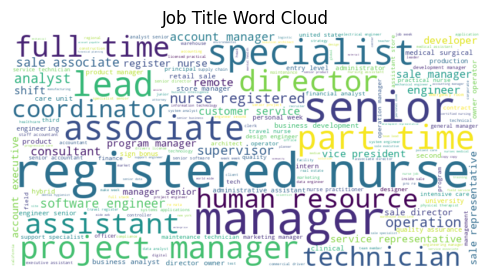

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

job_titles_text = ' '.join(dataset_final['job title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_text)

# Display the word cloud
plt.figure(figsize=(5, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Job Title Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()

### Job Type Breakdown

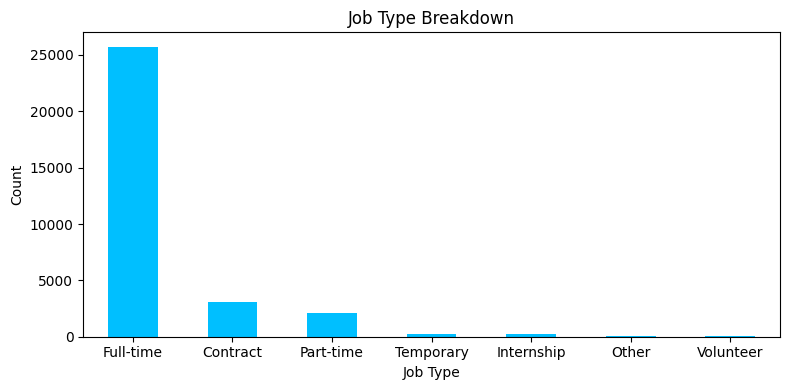

In [ ]:
job_type_counts = dataset_final['jenis_pekerjaan'].value_counts()
plt.figure(figsize=(8, 4))
job_type_counts.plot(kind='bar', color='deepskyblue')
plt.title('Job Type Breakdown')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Sponsored vs. Non-Sponsored Listings

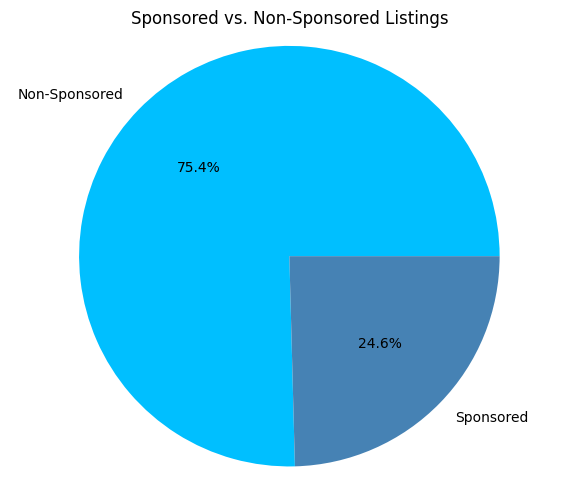

In [ ]:
sponsored_counts = dataset_final['category sponsor'].value_counts()
plt.figure(figsize=(6, 5))
plt.pie(sponsored_counts, labels=['Non-Sponsored', 'Sponsored'], autopct='%1.1f%%', colors=['deepskyblue', 'steelblue'])
plt.title('Sponsored vs. Non-Sponsored Listings')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Distribution of Jobs by Application Type

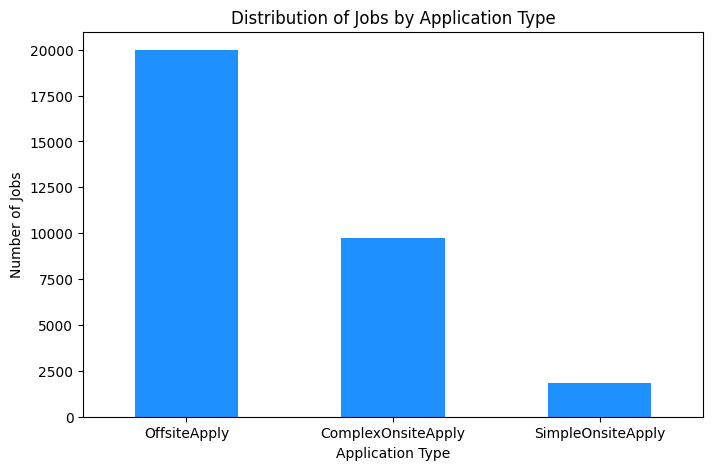

In [ ]:
work_type_distribution = dataset_final['registration_type'].value_counts()
plt.figure(figsize=(8, 5))
work_type_distribution.plot(kind='bar', color='dodgerblue')
plt.title('Distribution of Jobs by Application Type')
plt.xlabel('Application Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=360)
plt.show()

### Top 10 States with Job Openings

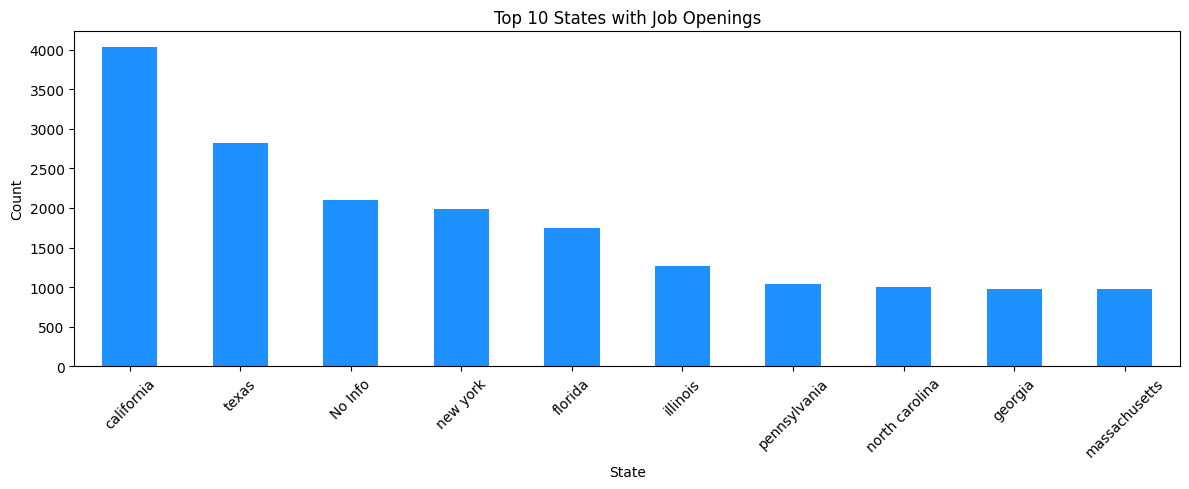

In [ ]:
state_counts = dataset_final['state'].value_counts().head(10)
plt.figure(figsize=(12, 5))
state_counts.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 States with Job Openings')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Required Skills

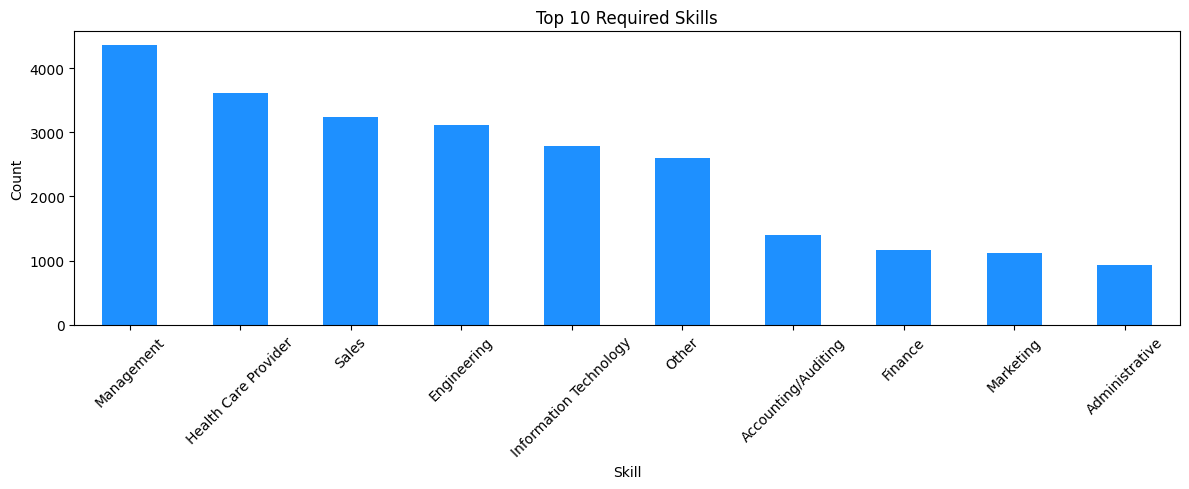

In [ ]:
skill_counts = dataset_final['skill'].value_counts().head(10)
plt.figure(figsize=(12, 5))
skill_counts.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 Required Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()